# RED WINE QUALITY

Elaborato Machine Learning & Data Mining

*Daniele Goffi, Giacomo Golino, Diego Rossi*

L'obiettivo principale di questo progetto è sviluppare modelli di machine learning in grado di classificare i vini rossi basandosi su diverse caratteristiche chimiche e sensoriali. La classificazione accurata dei vini è cruciale per diverse ragioni: aiuta i produttori a garantire la qualità dei loro vini, supporta i sommelier e gli enologi nella selezione e nella valutazione dei prodotti e fornisce ai consumatori informazioni più precise per le loro scelte di acquisto.

Per raggiungere questo obiettivo, utilizzeremo un set di dati contenente informazioni dettagliate sulle proprietà dei vini rossi, come il contenuto di alcol, l'acidità, il livello di zuccheri residui e altre caratteristiche fisiche e chimiche.

L'elaborato, dopo un primo capitolo riguardante il dataset, esplora diverse tecniche di apprendimento supervisionato per la classificazione dei vini in base alla qualità, utilizzando metodi d'insieme, macchine a vettori di supporto (SVM) e reti neurali artificiali.

In una seconda parte, si esplorano tecniche di clustering, ossia apprendimento non supervisionato, per classificare e dividere i vini rossi.

Infine, vengono paragonati i risultati ottenuti da lavori simili, sullo stesso dataset, trovati online e in letteratura.






#Dataset

Il codice iniziale di questo capitolo prepara l'ambiente di lavoro per il progetto, montando Google Drive, cambiando la directory, estraendo il file zip relativo ai dati, e caricando i dati in un DataFrame. Ogni passaggio è necessario per assicurare che i dati siano accessibili e pronti per essere analizzati e utilizzati in modelli di machine learning.

In questo blocco, vengono importate diverse librerie essenziali per l'analisi dei dati, la visualizzazione e il machine learning. Le librerie principali sono:



*   os e sys: per operazioni di sistema.
*   sklearn: per metodi di machine learning.
*   pandas e numpy: per la manipolazione dei dati.
*   zipfile: per la gestione di file zip.
*   matplotlib: per la visualizzazione dei dati.

In [ ]:
# Questo comando sopprime l'output di codice seguente, mantenendo l'area di output più pulita.
%%capture
import os
import sys
import sklearn
import pandas as pd
import numpy as np
import zipfile
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


!pip install tabulate


# Qui si definisce un random seed per garantire la riproducibilità dei risultati.
RS = 42
np.random.seed(RS)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

folder_path = '/content/drive/MyDrive/[Project]MachineLearning' ## Your folder


os.chdir(folder_path)

print(os.getcwd())

file_path = folder_path + "/archive.zip"


extracted_folder_path = '/content/dataset'

os.makedirs(extracted_folder_path, exist_ok=True)

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

csv_files = '/content/dataset/winequality-red.csv' ## path to dataset

df = pd.read_csv(file_path)


Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1hb00zWEXOsCzctvDP9gTNSPwSHTl-5Tn/[Project]MachineLearning



**Stampa** a video dei **primi elementi** del dataset e della sua **dimensione**.

In [ ]:
print('Head del dataset\n' + df.head().to_string())

print('\nDimensione del dataset')
print(df.shape)

Head del dataset
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5

Dimensione

**Controllo valori mancanti**: viene stampato il numero dei valori mancanti per colonna

In [ ]:
def count_missing(ds: pd.DataFrame):
    return ds.shape[0] - ds.count()

print('\nConteggio dei valori mancanti:\n' + str(count_missing(df)) + str('\n'))


Conteggio dei valori mancanti:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



Come possiamo vedere dalla stampa effettuata nel nostro dataset non sono presenti delle righe contenenti dei valori nulli. Questo ci permette di cominciare a lavorare senza effettuare operazioni di data cleaning su valori mancanti.

Stampa dell'andamento dei valori delle colonne del dataset:

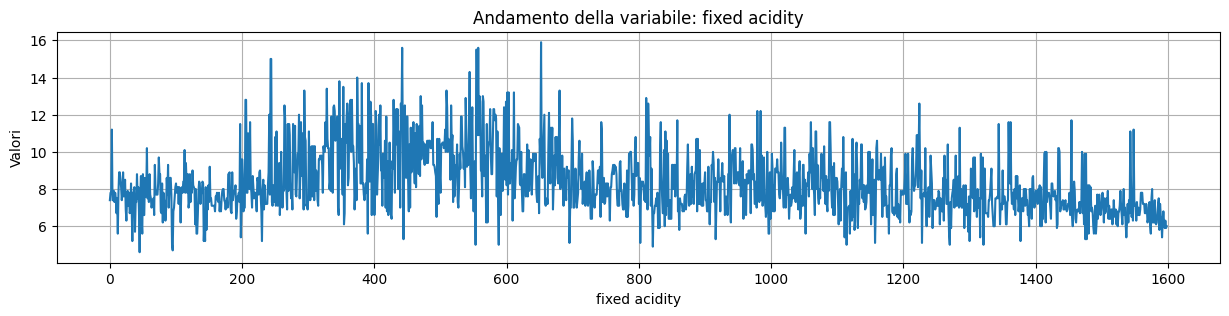

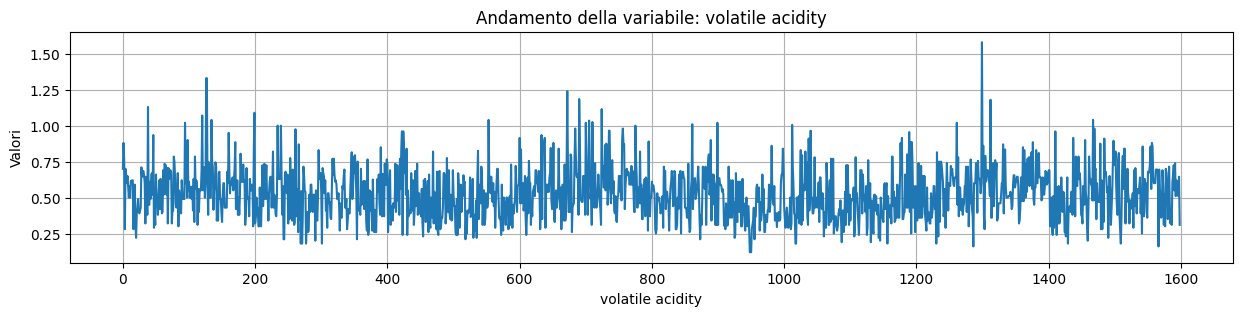

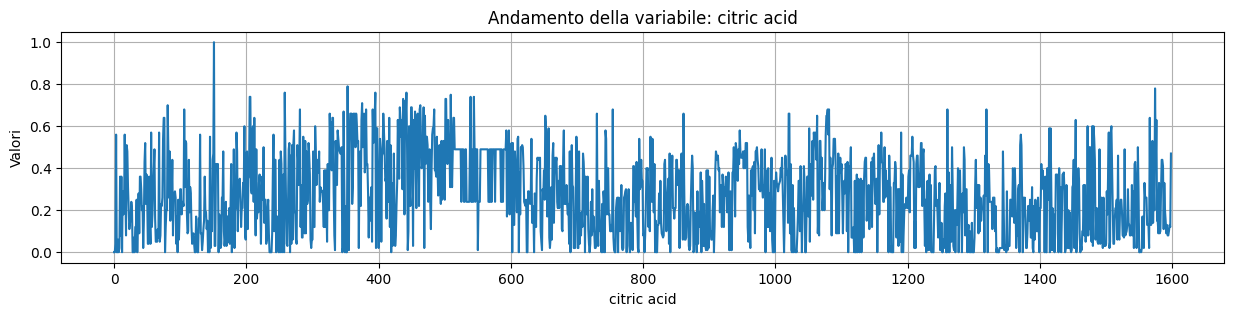

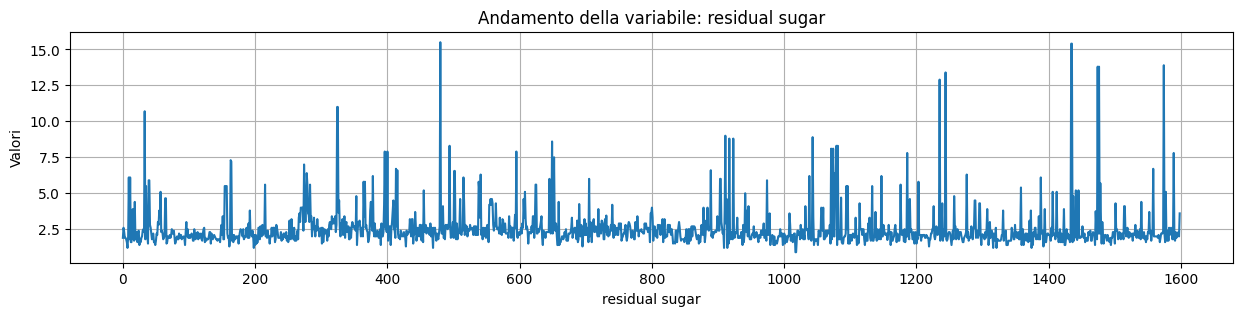

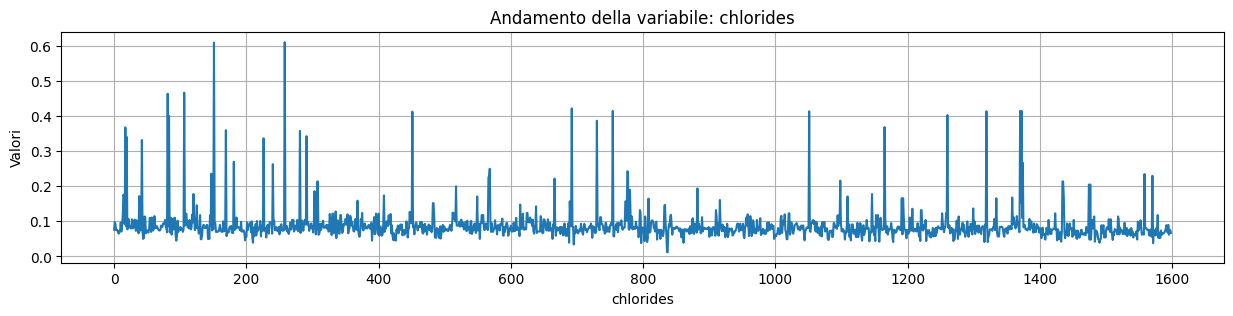

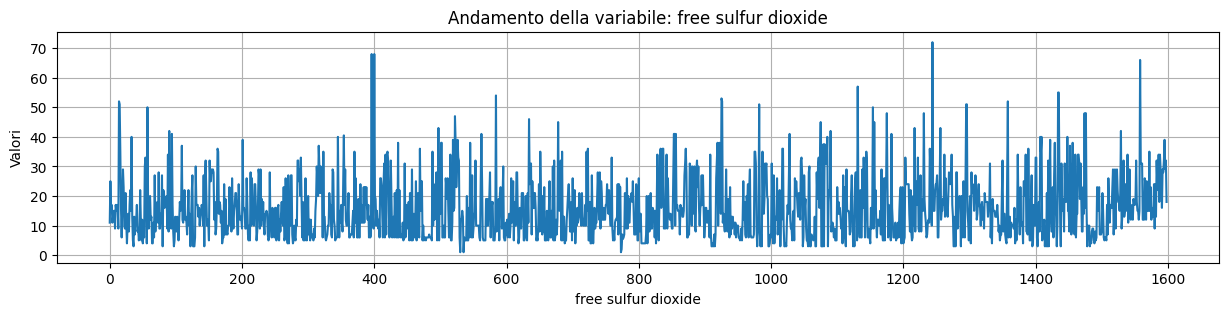

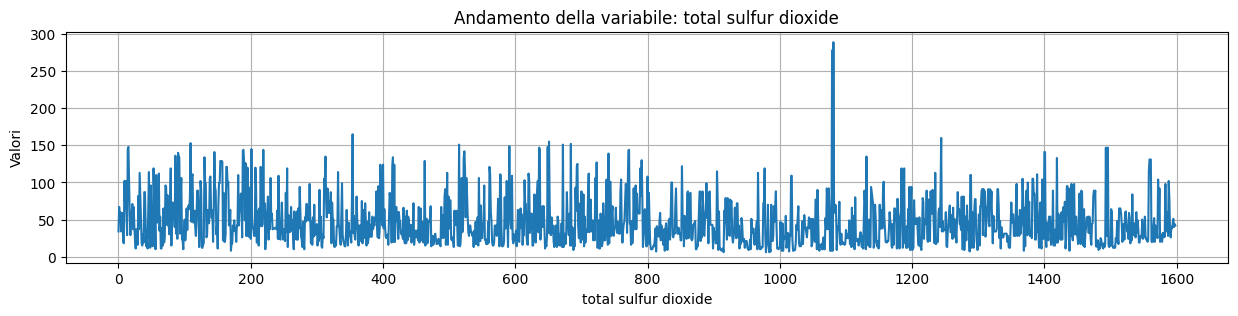

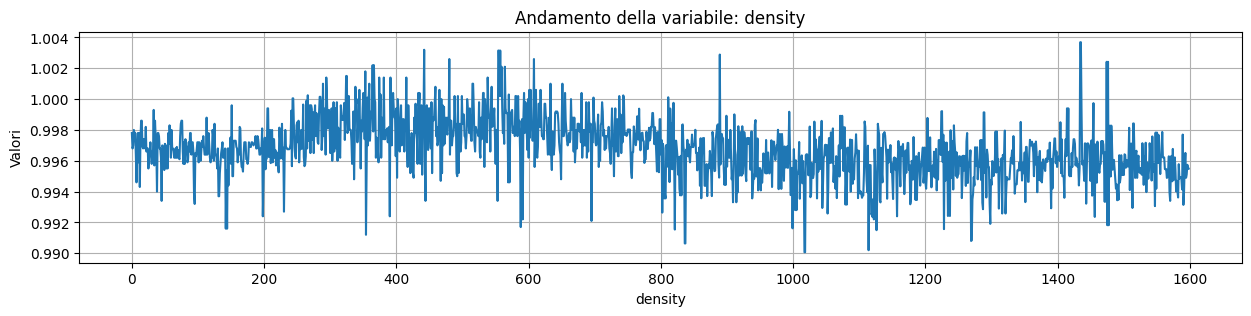

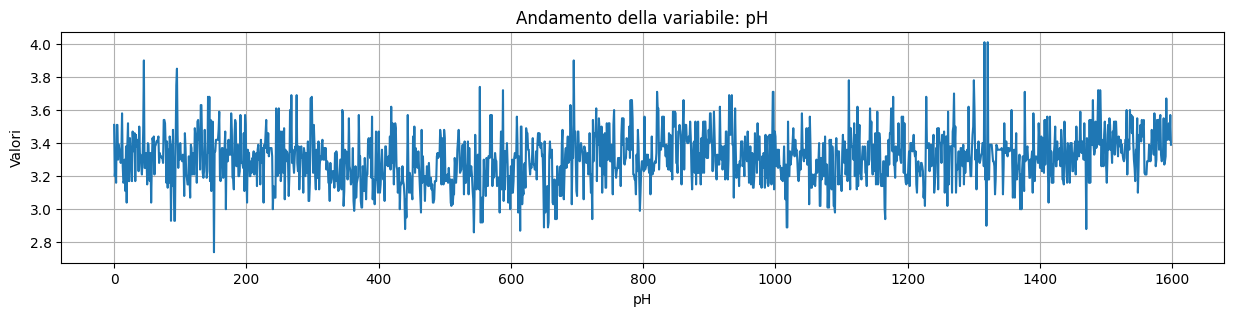

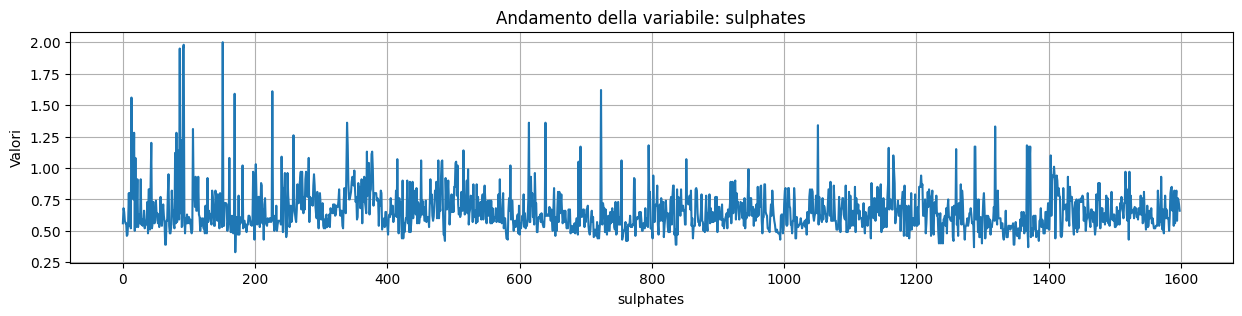

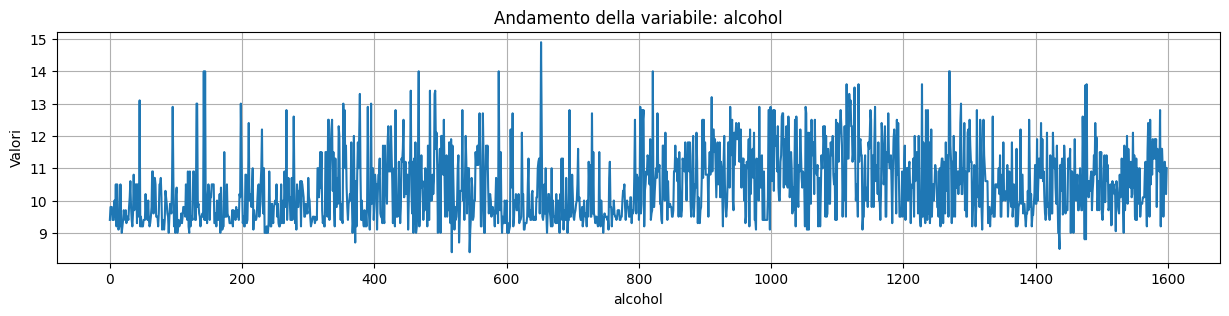

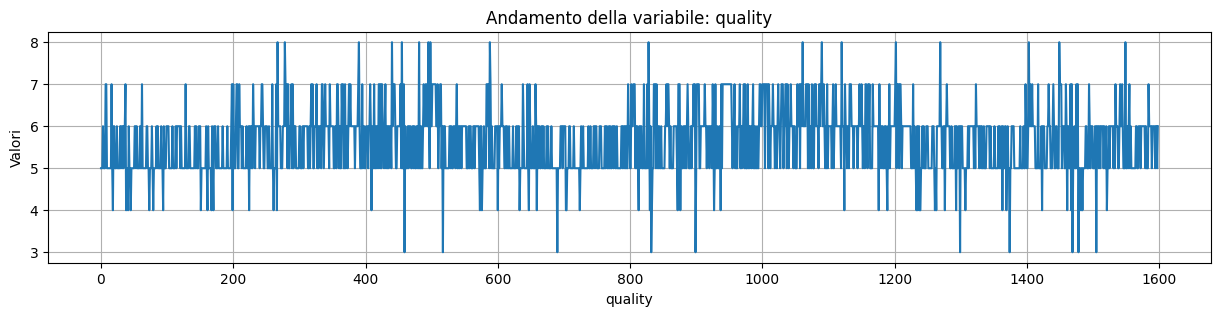

In [ ]:
for col in df.columns:
    plt.figure(figsize=(15, 3))

    plt.plot(df[col])

    plt.title(f'Andamento della variabile: {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Valori')
    plt.grid(True)
    plt.show()

Si può notare che alcuni valori sembrerebbero outliers, tuttavia, essendo valori fisicamente possibili, la scelta è stata quella di non rimuovere questi punti per permettere una maggiore generalizzazione da parte dei modelli.

Di seguito avviene la divisione delle colonne tra features e label (quality).

In [ ]:
X = df.drop("quality", axis=1)

y = df['quality']

y_bin = df['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)

In [ ]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Si può notare che i valori della qualità sono fortemente sbilanciati verso valori intermedi, questo potrebbe essere un problema in fase di addestramento dei modelli.
Per questo motivo abbiamo scelto di affiancare ad una classificazione multiclasse una classificazione binaria, definendo una seconda label di qualità come 0 per valori inferiori a 6, e 1 per valori maggiori e uguali a 6: questa classificazione sarà di fatto quella che sarà in grado di fornire risultati più solidi.

In [ ]:
y_bin.value_counts()

quality
1    855
0    744
Name: count, dtype: int64

Il seguente codice serve per codificare i valori della label y in valori da 0 a 5 anziché da 3 a 8.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

y.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

#Ensemble Methods

In questo capitolo verranno adottati per la classificazione dei vini i seguenti metodi di insieme:


*   Bagging & Pasting

*   Boosting

*   Random Forest
*   Extra Trees


*   Stacking



 Il workflow per tutti, tranne che per lo stacking è il seguente:
 come prima cosa si imposta una **grid search** (la grid search è una tecnica utilizzata nel machine learning per trovare i migliori valori degli iperparametri di un modello e consiste nel definire una griglia di valori per ogni iperparametro e testare tutte le possibili combinazioni di valori), poi avviene la ricerca dei valori ideali separatamente per la classificazione multiclass e per la classificazione binaria, per entrambe viene poi ricreato il modello risultante e viene mostrata l'accuracy di training, l'**accuracy** di test e la **confusion matrix**.

 Lo stacking differisce unicamente poichè vengono utilizzati tutti i modelli risultanti dalle grid search eseguite in precedenza.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import plot_tree
from IPython.display import Image
import graphviz


Il dataset viene diviso in un set di **training** (80%) e set di **test** (20%), viene poi eseguito uno scaling delle feature.
Questo sia per il dataset con label multiclasse che per il dataset con label binaria.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=RS)
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

## Bagging & Pasting

Un classificatore **Bagging** utilizza diversi classificatori base, a ciascuno dei quali viene fornito un sotto insieme dei dati di training, le previsioni di ciascun classificatore vengono poi aggregate per ottenere una previsione finale.

Gli iperparametri oggetti della grid search sono i seguenti:


*   **Bootstrap**: se "True" (campionamento con sostituzione) si parla di Bagging, altrimenti di Pasting;
*   **Max samples**: indica il numero di campioni da estrarre per addestrare ogni stimatore base;
*   **Max_features**: indica il numero di features da usare per addestrare ciascun stimatore base.

Si noti che viene utilizzato un numero fisso alberi di decisione (stimatore base di default).



In [ ]:
bc = BaggingClassifier(n_estimators=50, random_state=RS)


parameter_grid = {
    "bootstrap": [False, True],
    "max_samples": [0.2, 0.3],
    "max_features": [0.3, 0.7, 1.0]
}

grid_search = GridSearchCV(
    estimator=bc,
    param_grid=parameter_grid,
    cv=5,
    verbose=1,
    return_train_score=True,
    refit="accuracy",
)

### Multiclass

Fit della grid search:

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
bag_best_params = grid_search.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.649748774509804
Best parameters: {'bootstrap': True, 'max_features': 0.7, 'max_samples': 0.3}


Replica del modello risultante:

In [ ]:
bag = BaggingClassifier(n_estimators=50, max_samples=0.3, bootstrap=True, max_features=0.7, random_state=RS)

bag.fit(X_train, y_train.values.ravel())

BaggingClassifier(max_features=0.7, max_samples=0.3, n_estimators=50,
                  random_state=42)

Stampa dei risultati:

Bagging classifier training Accuracy: 0.8858483189992181 

Bagging classifier test Accuracy: 0.628125 



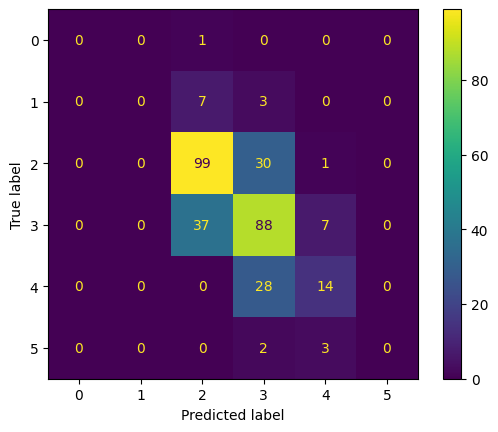

In [ ]:
y_pred = bag.predict(X_train)
print(f"Bagging classifier training Accuracy: {accuracy_score(y_train, y_pred)} \n")

y_pred = bag.predict(X_test)
print(f"Bagging classifier test Accuracy: {accuracy_score(y_test, y_pred)} \n")

acc_bag =  "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Dalla Confusion Matrix si evince come il modelllo non predica mai i valori più estremi di qualità, a causa dello sbilanciamento dei dati discusso in precedenze, questo è un comportamento che si verificherà anche nei modelli successivi.

### Binary


In [ ]:
grid_search.fit(X_train_bin, y_train_bin)
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.7865778186274509
Best parameters: {'bootstrap': False, 'max_features': 1.0, 'max_samples': 0.3}


In [ ]:
bag = BaggingClassifier(n_estimators=50, max_samples=0.3, bootstrap=False, max_features=1.0, random_state=RS)

bag.fit(X_train_bin, y_train_bin)

BaggingClassifier(bootstrap=False, max_samples=0.3, n_estimators=50,
                  random_state=42)

Bagging classifier training Accuracy: 0.9210320562939797

Bagging classifier test Accuracy: 0.778125



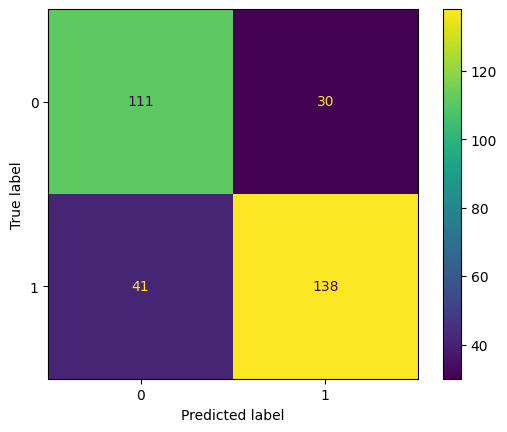

In [ ]:
y_pred = bag.predict(X_train_bin)
print(f"Bagging classifier training Accuracy: {accuracy_score(y_train_bin, y_pred)}\n")

y_pred = bag.predict(X_test_bin)
print(f"Bagging classifier test Accuracy: {accuracy_score(y_test_bin, y_pred)}\n")

acc_bag_bin = "{:.3f}".format(accuracy_score(y_test_bin, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test_bin,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

La classificazione binaria risulta più accurata e le predizioni non riportano uno sbianciamento importante verso una classe.

##Boosting

In questo capitolo si è fatto uso del classificatore AdaBoost: diverse copie dello stesso classificatore base vengono poste a cascata, duranta la fase di fitting i pesi di un classificatore successore vengono modificati per focalizzarsi sugli errori dei classificatori precedenti.

Gli iperparametri di cui si cercano i valori ottimali sono i seguenti:

* **n_estimators**: indica il numero massimo di stimatori;
* **Learning_rate**: indica il peso applicato ad ogni classificatore ad ogni iterazione;
* **Algorithm**: SAMME è un algoritmo di boosting discreto, SAMME.R è un algoritmo di boosting reale.

Lo stimatore base di default è un albero di decisione.

In [ ]:
ada = AdaBoostClassifier(random_state=RS)

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.5, 0.7, 1.0],
    'algorithm': ['SAMME.R', 'SAMME'],
}

grid_search = GridSearchCV( estimator=ada, param_grid=param_grid, cv=5,
    verbose=1, return_train_score=True, refit="accuracy",
)

### Multiclass

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score: 0.5778462009803922
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}


In [ ]:
ada = AdaBoostClassifier(n_estimators=200, algorithm='SAMME', learning_rate=0.5, random_state=RS)

ada.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=200,
                   random_state=42)

AdaBoost classifier training Accuracy: 0.5949960906958561

AdaBoost classifier test Accuracy: 0.5375



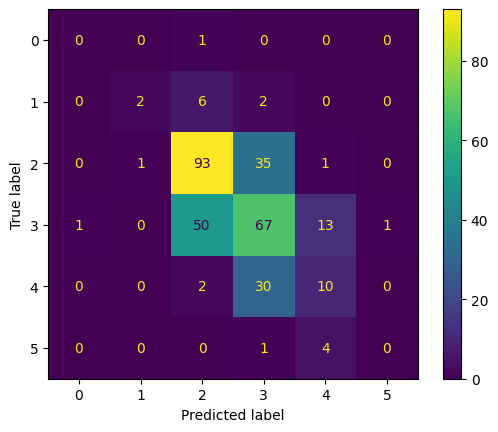

In [ ]:
y_pred = ada.predict(X_train)
print(f"AdaBoost classifier training Accuracy: {accuracy_score(y_train, y_pred)}\n")

y_pred = ada.predict(X_test)
print(f"AdaBoost classifier test Accuracy: {accuracy_score(y_test, y_pred)}\n")

acc_ada = "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

###Binary

In [ ]:
grid_search.fit(X_train_bin, y_train_bin)
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score: 0.7592126225490196
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 500}


In [ ]:
ada = AdaBoostClassifier(n_estimators=500, algorithm='SAMME.R', learning_rate=0.5, random_state=RS)

ada.fit(X_train_bin, y_train_bin)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=42)

AdaBoost classifier training Accuracy: 0.8451915559030493

AdaBoost classifier test Accuracy: 0.76875



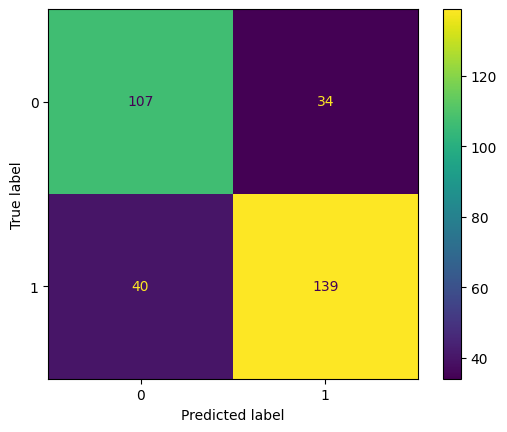

In [ ]:
y_pred = ada.predict(X_train_bin)
print(f"AdaBoost classifier training Accuracy: {accuracy_score(y_train_bin, y_pred)}\n")

y_pred = ada.predict(X_test_bin)
print(f"AdaBoost classifier test Accuracy: {accuracy_score(y_test_bin, y_pred)}\n")

acc_ada_bin = "{:.3f}".format(accuracy_score(y_test_bin, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test_bin,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

##Random Forest

Una Random Forest è un insieme di alberi di decisione (forest) costruiti durante il training su diversi sottoinsiemi dei dati di training, nella costruzione di un albero viene scelto lo split ottimo ad ogni nodo.

La gridsearch cerca i valori per i seguenti iperparametri:

*  **Max_feature**: indica il numero di feature da considerare per decidere il miglior split quando si costruisce un albero;
* **Criterion**: specifica la funzione da usare per misurare la qualità di uno split nella costruzione di un albero.

Rimangono fissi il numero di alberi nella foresta e il **Min_samples_split**, ossia il numero minimo di campioni necessari per dividere un nodo, questo per evitare che il modello vada in overfitting (senza la train accuracy sarebbe del 100%, contro un miglioramento dell'acuracy di test di pochi punti percentuali).

In [ ]:
rfc=RandomForestClassifier(n_estimators=100, min_samples_split= 20, random_state=RS)

param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
}

grid_search = GridSearchCV( estimator=rfc, param_grid=param_grid, cv=5,
    verbose=1, return_train_score=True, refit="accuracy",
)

### Multiclass


In [ ]:
grid_search.fit(X_train, y_train.values.ravel())
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.6661764705882354
Best parameters: {'criterion': 'gini', 'max_features': 'sqrt'}


In [ ]:
rf = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=100, min_samples_split= 20, random_state=RS)

rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(min_samples_split=20, random_state=42)

Random Forest classifier training Accuracy: 0.8232994526974199

Random Forest classifier test Accuracy: 0.615625



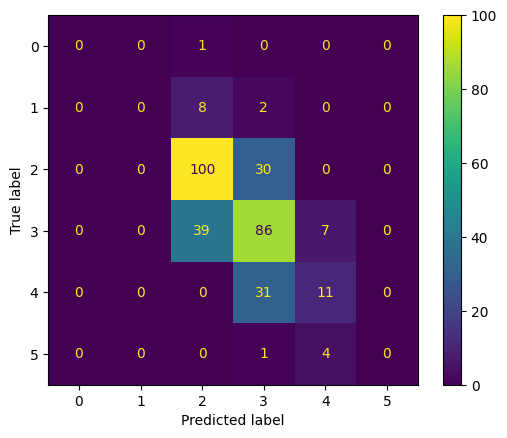

In [ ]:
y_pred = rf.predict(X_train)
print(f"Random Forest classifier training Accuracy: {accuracy_score(y_train, y_pred)}\n")

y_pred = rf.predict(X_test)
print(f"Random Forest classifier test Accuracy: {accuracy_score(y_test, y_pred)}\n")

acc_rf = "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Binary

In [ ]:
grid_search.fit(X_train_bin, y_train_bin)
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.7912806372549019
Best parameters: {'criterion': 'gini', 'max_features': 'sqrt'}


In [ ]:
rf = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=100, min_samples_split= 20, random_state=RS)

rf.fit(X_train_bin, y_train_bin)

RandomForestClassifier(min_samples_split=20, random_state=42)

Random Forest classifier training Accuracy: 0.9061767005473026

Random Forest classifier test Accuracy: 0.775



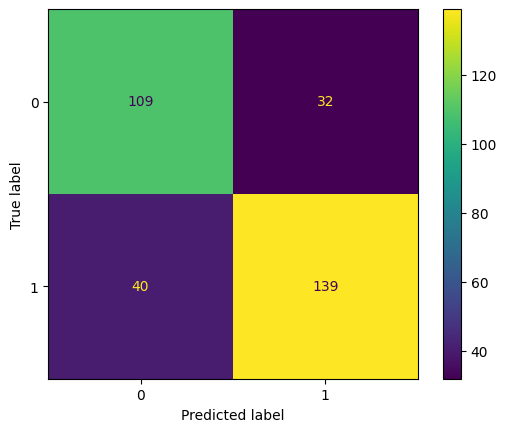

In [ ]:
y_pred = rf.predict(X_train_bin)
print(f"Random Forest classifier training Accuracy: {accuracy_score(y_train_bin, y_pred)}\n")

y_pred = rf.predict(X_test_bin)
print(f"Random Forest classifier test Accuracy: {accuracy_score(y_test_bin, y_pred)}\n")

acc_rf_bin = "{:.3f}".format(accuracy_score(y_test_bin, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test_bin,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

##Extra Trees

Extra Trees sta per Extremely Randomized Trees: analogalmente a Random Forest con questo metodo vengono costruite "foreste" di alberi di decisione, ma a differenza delle Random Forests viene effettuato un **sampling senza sostituzione** (boostrap = False), e nella costruzione degli alberi i nodi vengono divisi tramite un **sottoinsieme casuale di features**, questo permette di effettuare un minor numero di calcoli a favore della velocità.

Vista la somiglianza con Random Forest la grid search è stata settata in maniera analoga al caso precedente.

In [ ]:
etc=ExtraTreesClassifier(n_estimators=100, min_samples_split= 20, random_state=RS)

param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy', 'log_loss'],
}

grid_search = GridSearchCV( estimator=etc, param_grid=param_grid, cv=5,
    verbose=1, return_train_score=True, refit="accuracy",
)

### Multiclass

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.6685355392156863
Best parameters: {'criterion': 'entropy', 'max_features': None}


In [ ]:
et = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features=None, min_samples_split= 20, random_state=RS)

et.fit(X_train, y_train.values.ravel())

ExtraTreesClassifier(criterion='entropy', max_features=None,
                     min_samples_split=20, random_state=42)

ExtraTrees classifier training Accuracy: 0.8600469116497264

ExtraTrees classifier test Accuracy: 0.634375



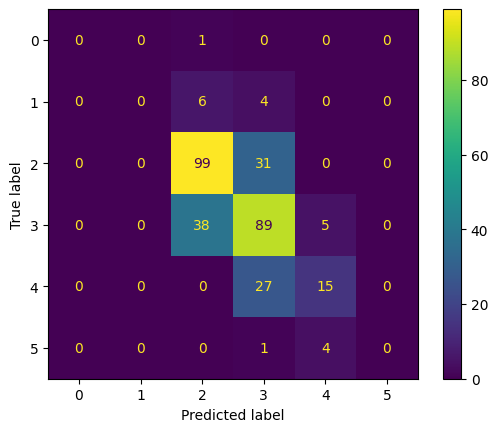

In [ ]:
y_pred = et.predict(X_train)
acc = accuracy_score(y_train, y_pred)
print(f"ExtraTrees classifier training Accuracy: {accuracy_score(y_train, y_pred)}\n")

y_pred = et.predict(X_test)
print(f"ExtraTrees classifier test Accuracy: {accuracy_score(y_test, y_pred)}\n")

acc_et = "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


Di seguito si riporta la feature importance di ogni variablie, ossia la misura che quantifica l'importanza relativa di ciascuna caratteristica (o variabile) nel modello predittivo. Questa importanza viene calcolata durante il processo di costruzione degli alberi decisionali.

fixed acidity -- 0.04972084359849727
volatile acidity -- 0.10897735587726948
citric acid -- 0.056304787201077115
residual sugar -- 0.05441458591327896
chlorides -- 0.04252846652229987
free sulfur dioxide -- 0.05153965113857472
total sulfur dioxide -- 0.1030013155261389
density -- 0.0432160615210175
pH -- 0.04903420585790109
sulphates -- 0.13976915691247757
alcohol -- 0.3014935699314676


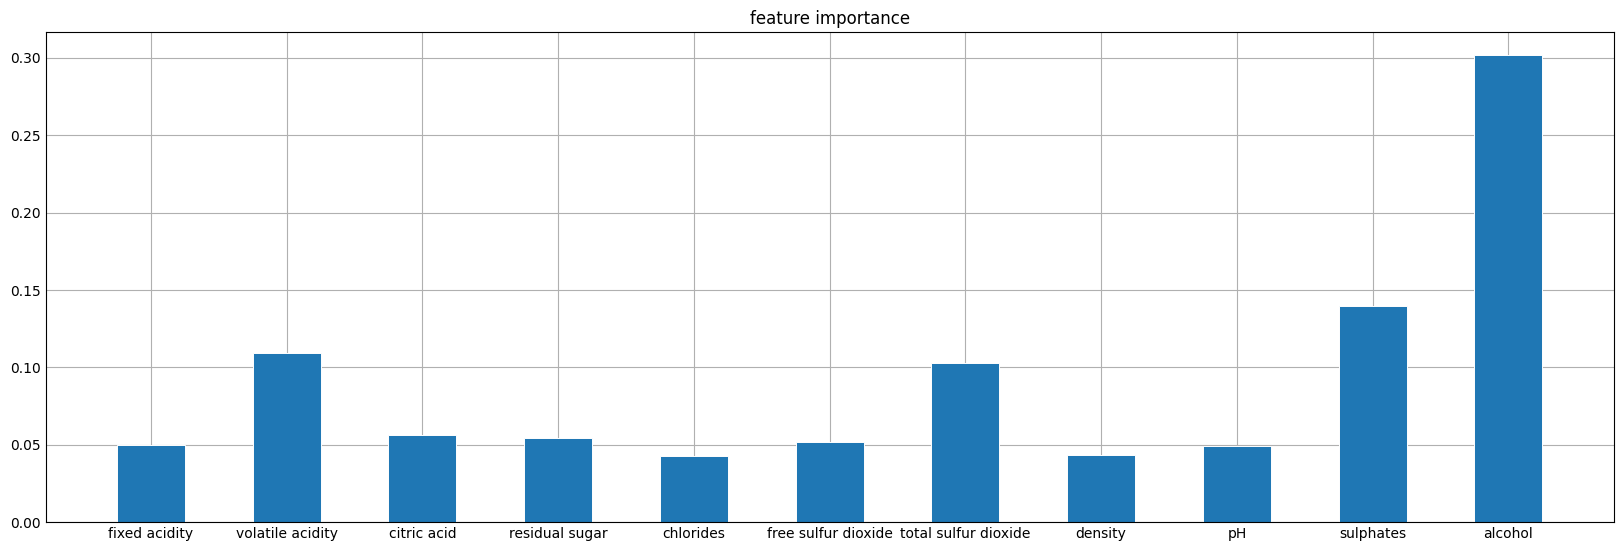

In [ ]:
names=[]
scores=[]
for name, score in zip(df, et.feature_importances_):
    print(name,"--" ,score)
    names.append(name)
    scores.append(score)

plt.style.use('_mpl-gallery')

plt.figure(figsize=(16, 5))
plt.title('feature importance')

plt.bar(names, scores, width=0.5, edgecolor="white", linewidth=0.7)

plt.grid(True)
plt.show()
#plt.clf()
#plt.close()

Stampa di un albero facente parte della foresta:

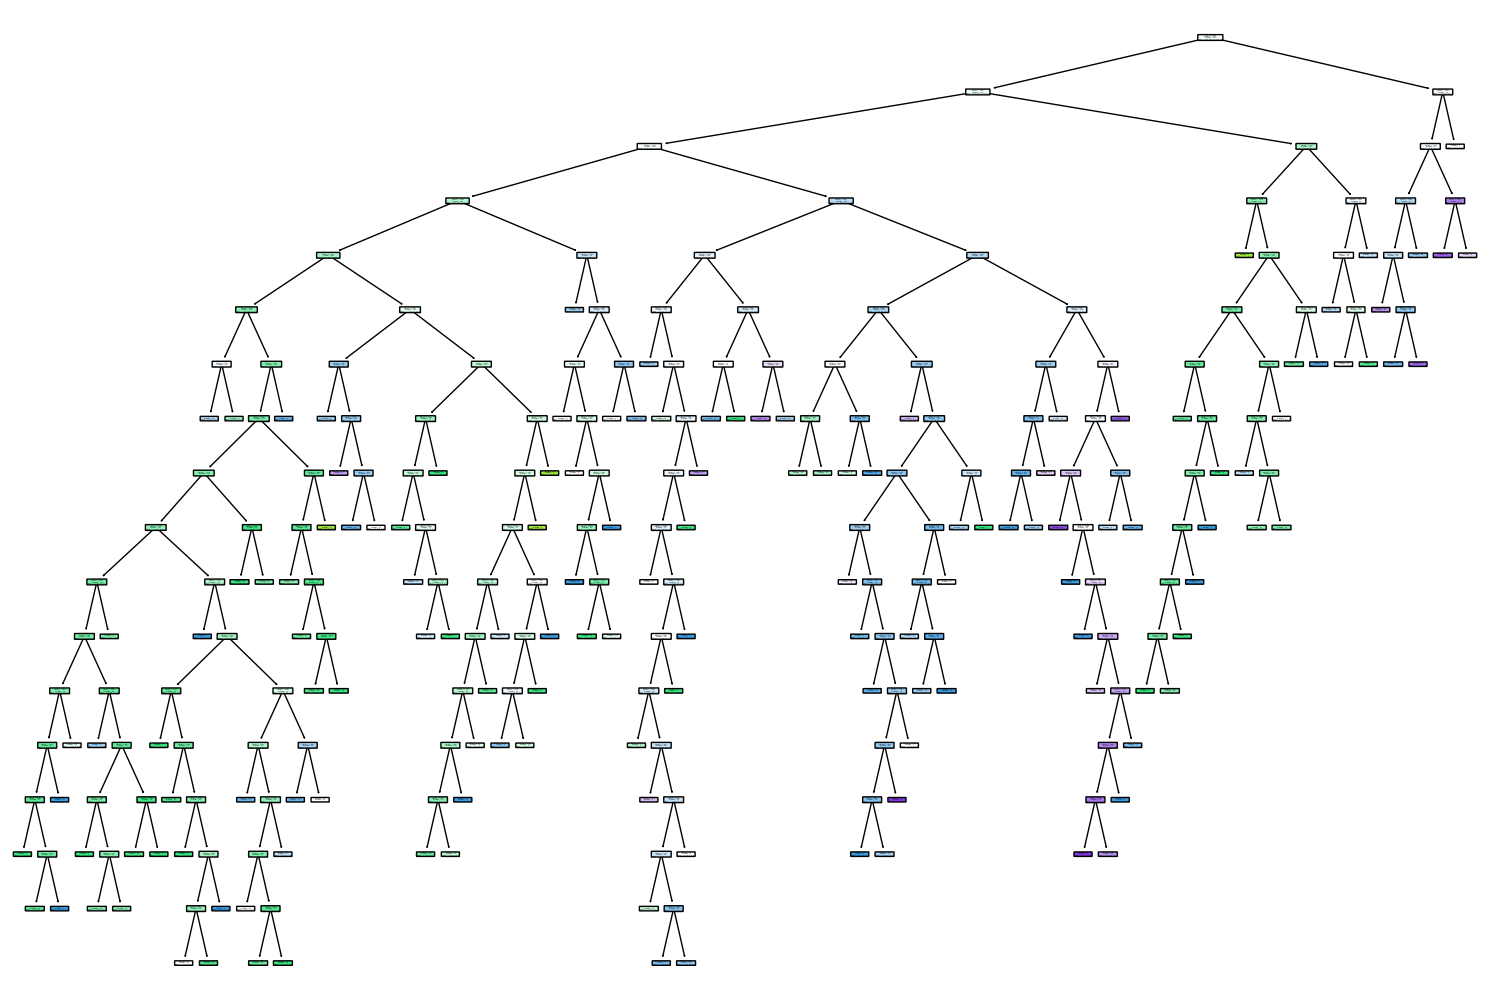

In [ ]:
tree = et.estimators_[1]

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=df.drop("quality", axis=1).loc[0], filled=True, rounded=True)
plt.show()

Il seguente codice serve per leggere meglio i dettagli di uno o più alberi facenti parti della foresta, fino ad una profondità scelta.

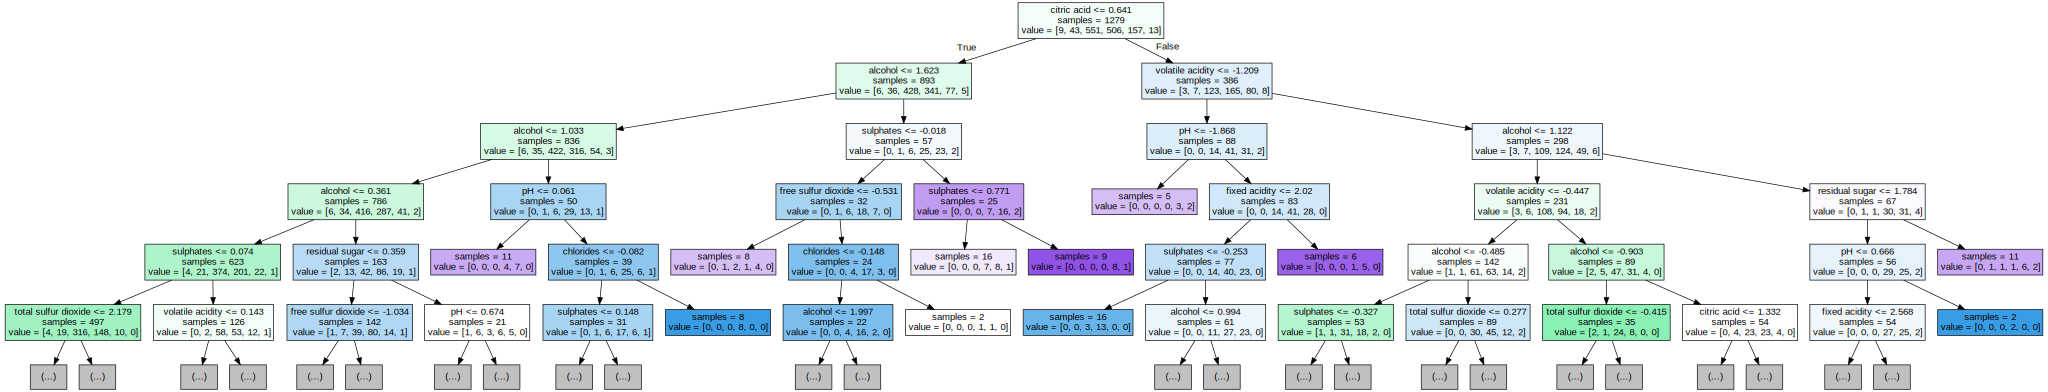

In [ ]:
for i in range(1):
    tree = et.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               filled=True,
                               max_depth=5,
                               impurity=False,
                               proportion=False)
    graph = graphviz.Source(dot_data)
    display(graph)

### Binary


In [ ]:
grid_search.fit(X_train_bin, y_train_bin)
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.7998805147058824
Best parameters: {'criterion': 'entropy', 'max_features': None}


In [ ]:
et = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features=None, min_samples_split= 20, random_state=RS)

et.fit(X_train_bin, y_train_bin)

ExtraTreesClassifier(criterion='entropy', max_features=None,
                     min_samples_split=20, random_state=42)

ExtraTrees classifier training Accuracy: 0.9351055512118843

ExtraTrees classifier test Accuracy:  0.790625



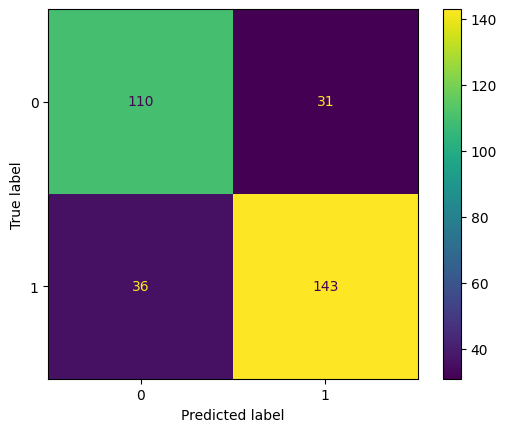

In [ ]:
y_pred = et.predict(X_train_bin)
print(f"ExtraTrees classifier training Accuracy: {accuracy_score(y_train_bin, y_pred)}\n")

y_pred = et.predict(X_test_bin)
print(f"ExtraTrees classifier test Accuracy:  {accuracy_score(y_test_bin, y_pred)}\n")

acc_et_bin = "{:.3f}".format(accuracy_score(y_test_bin, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test_bin,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

fixed acidity -- 0.045444577529837986
volatile acidity -- 0.10534395838832136
citric acid -- 0.04529078876185689
residual sugar -- 0.043519984067192034
chlorides -- 0.04698400539837299
free sulfur dioxide -- 0.04516606963602861
total sulfur dioxide -- 0.12162071293360643
density -- 0.05478064834362249
pH -- 0.044771686015620545
sulphates -- 0.14287194914620818
alcohol -- 0.3042056197793325


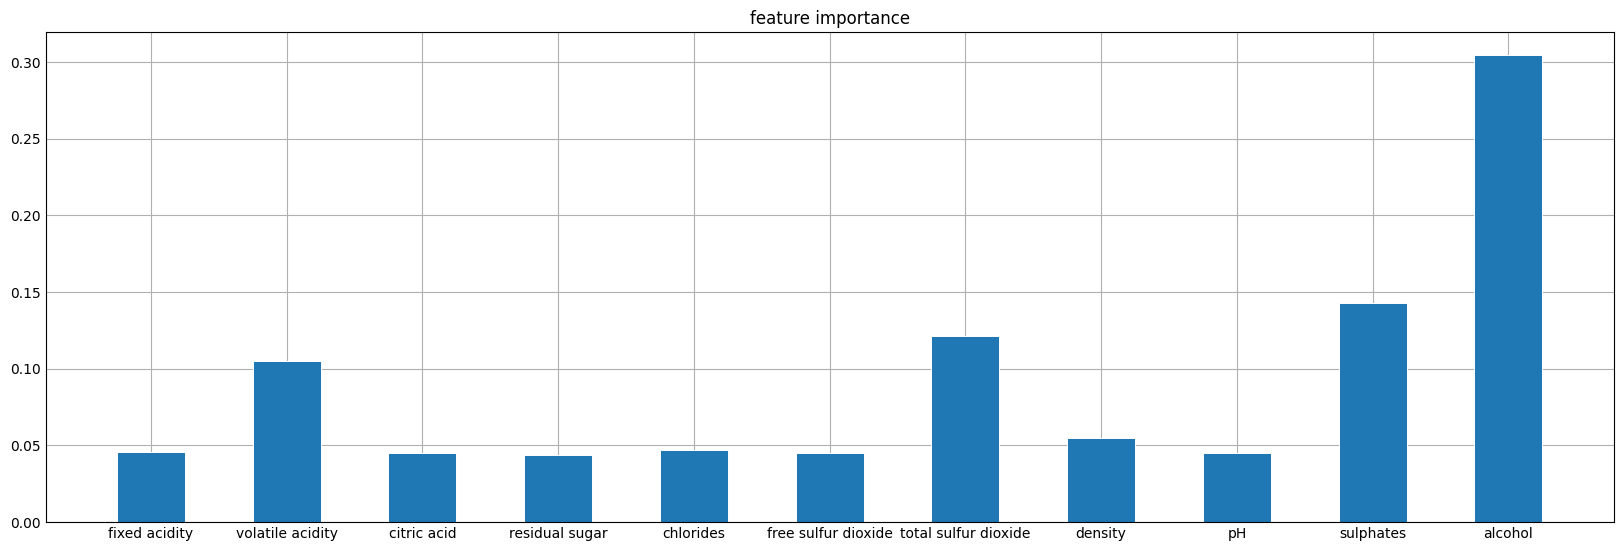

In [ ]:
names=[]
scores=[]
for name, score in zip(df, et.feature_importances_):
    print(name,"--" ,score)
    names.append(name)
    scores.append(score)

plt.style.use('_mpl-gallery')

plt.figure(figsize=(16, 5))
plt.title('feature importance')
plt.bar(names, scores, width=0.5, edgecolor="white", linewidth=0.7)

plt.grid(True)
plt.show()


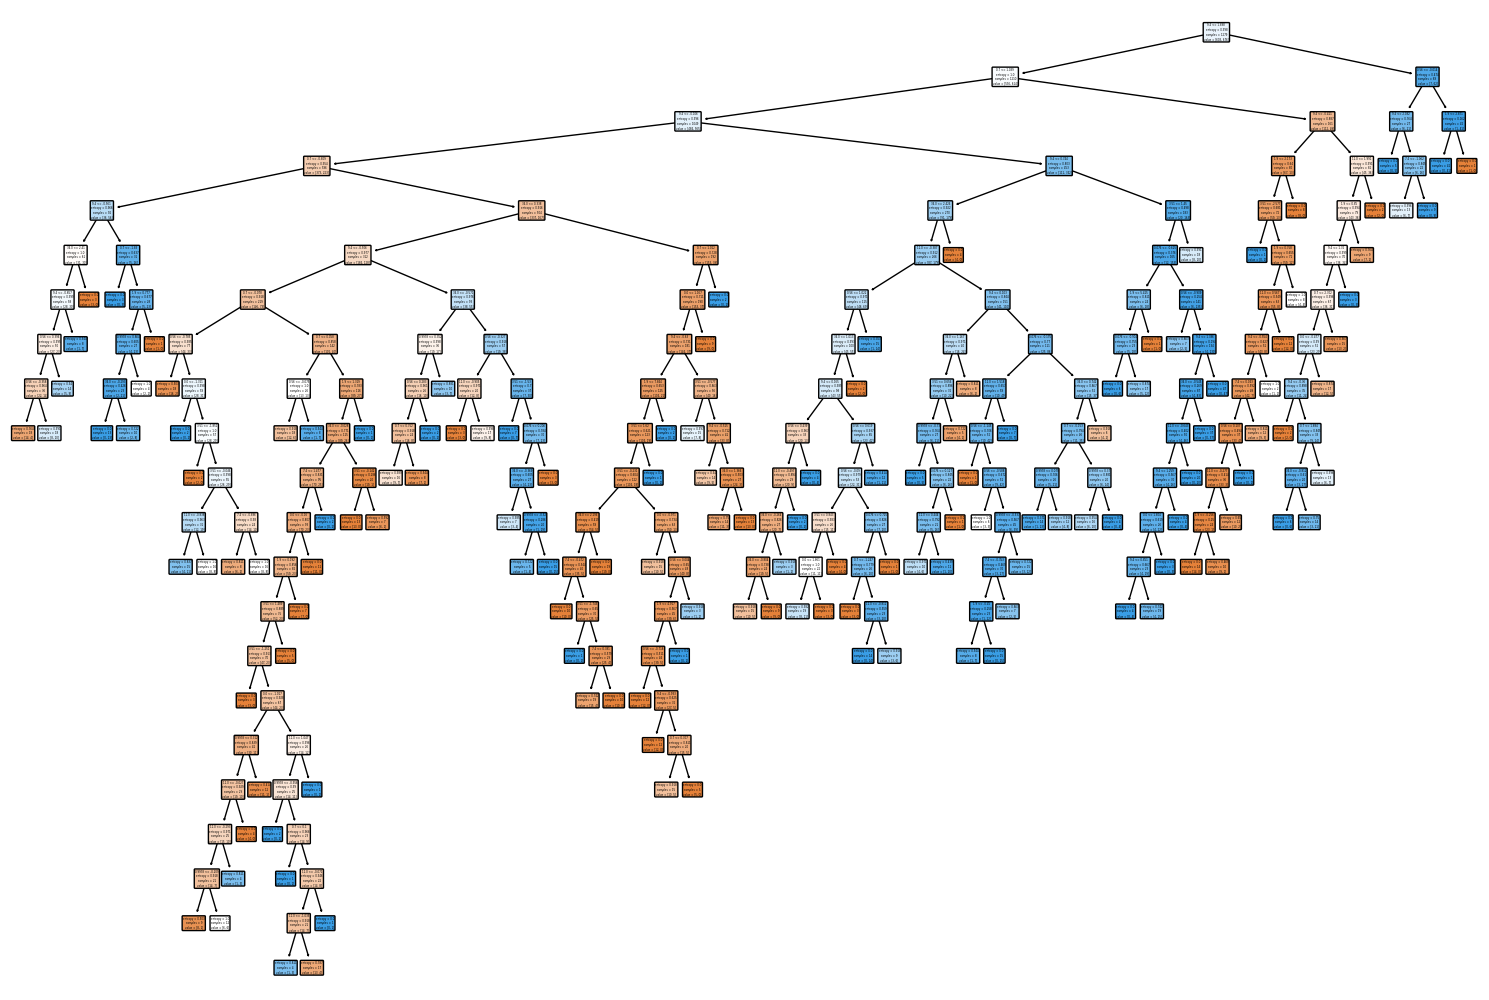

In [ ]:
tree = et.estimators_[1]

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=df.drop("quality", axis=1).loc[0], filled=True, rounded=True)
plt.show()

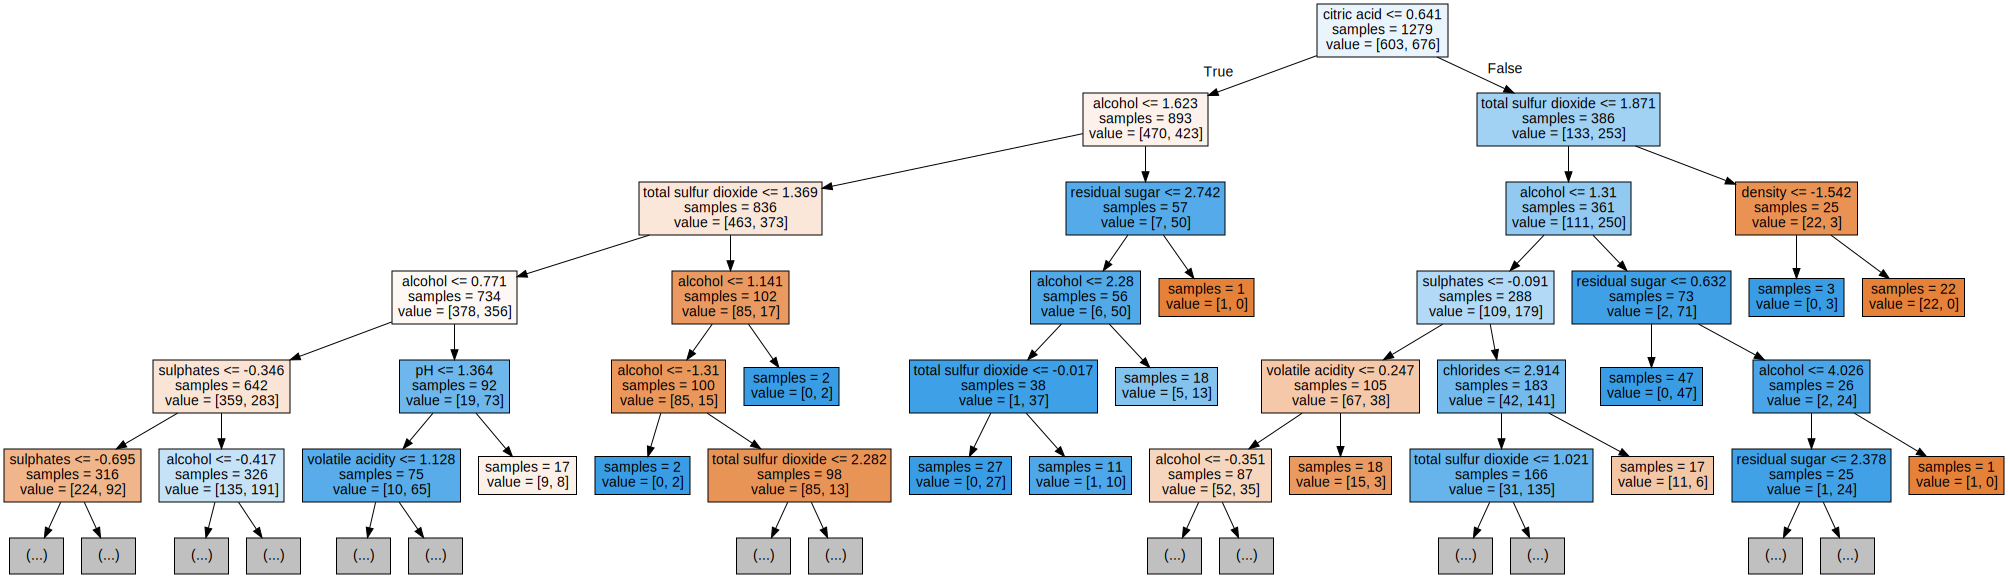

In [ ]:
for i in range(1):
    tree = et.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               filled=True,
                               max_depth=5,
                               impurity=False,
                               proportion=False)
    graph = graphviz.Source(dot_data)
    display(graph)

##Stacking

 Uno Stacking classifier usa gli output di diversi classificatori come input di un meta-classificatore (logistic regressor di default),
il quale fornisce la predizione finale.

Come classificatori abbiamo usato quelli precedentemente trovati eseguendo le singole grid search, sia per la classificazione multiclasse che per la classificazione binaria.

### Multiclass

Definizione dell'insieme dei classificatori:

In [ ]:
estimators = []
estimators.append(('Bagging Classifier', BaggingClassifier(n_estimators=50, max_samples=0.3, bootstrap=True, max_features=0.7, random_state=RS) ))
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(n_estimators=200, algorithm='SAMME', learning_rate=0.5, random_state=RS) ))
estimators.append(('RandomForest', RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=100, min_samples_split= 20, random_state=RS) ))
estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features=None, min_samples_split= 20, random_state=RS)))


Creazione e fit del modello:

In [ ]:
SC = StackingClassifier(estimators=estimators, cv=6)

SC.fit(X_train, y_train.values.ravel())

StackingClassifier(cv=6,
                   estimators=[('Bagging Classifier',
                                BaggingClassifier(max_features=0.7,
                                                  max_samples=0.3,
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('AdaBoostClassifier',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   learning_rate=0.5,
                                                   n_estimators=200,
                                                   random_state=42)),
                               ('RandomForest',
                                RandomForestClassifier(min_samples_split=20,
                                                       random_state=42)),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier(criterion='entropy',
                                                     max_features=None,
                                                     min_samples_split=20,
                                                     random_state=42))])

Stacking training Accuracy: 0.8553557466770915

Stacking test Accuracy: 0.63125



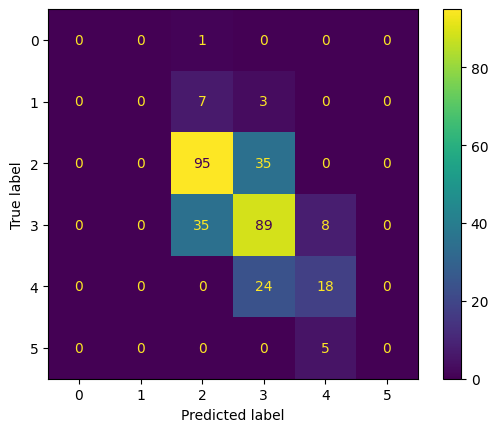

In [ ]:
y_pred = SC.predict(X_train)
print(f"Stacking training Accuracy: {accuracy_score(y_train, y_pred)}\n")

y_pred = SC.predict(X_test)
print(f"Stacking test Accuracy: {accuracy_score(y_test, y_pred)}\n")

acc_sc = "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Binary

In [ ]:
estimators_bin = []
estimators_bin.append(('Bagging Classifier', BaggingClassifier(n_estimators=50, max_samples=0.3, bootstrap=False, max_features=1.0, random_state=RS) ))
estimators_bin.append(('AdaBoost Classifier', AdaBoostClassifier(n_estimators=500, algorithm='SAMME.R', learning_rate=0.5, random_state=RS) ))
estimators_bin.append(('Random Forest', RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=100, min_samples_split= 20, random_state=RS) ))
estimators_bin.append(('Extra Trees Classifier', ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features=None, min_samples_split= 20, random_state=RS) ))


In [ ]:
SC = StackingClassifier(estimators=estimators_bin, cv=6)

SC.fit(X_train_bin, y_train_bin)

StackingClassifier(cv=6,
                   estimators=[('Bagging Classifier',
                                BaggingClassifier(bootstrap=False,
                                                  max_samples=0.3,
                                                  n_estimators=50,
                                                  random_state=42)),
                               ('AdaBoost Classifier',
                                AdaBoostClassifier(learning_rate=0.5,
                                                   n_estimators=500,
                                                   random_state=42)),
                               ('Random Forest',
                                RandomForestClassifier(min_samples_split=20,
                                                       random_state=42)),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier(criterion='entropy',
                                                     max_features=None,
                                                     min_samples_split=20,
                                                     random_state=42))])

Stacking training Accuracy: 0.9366692728694292

Stacking test Accuracy: 0.778125



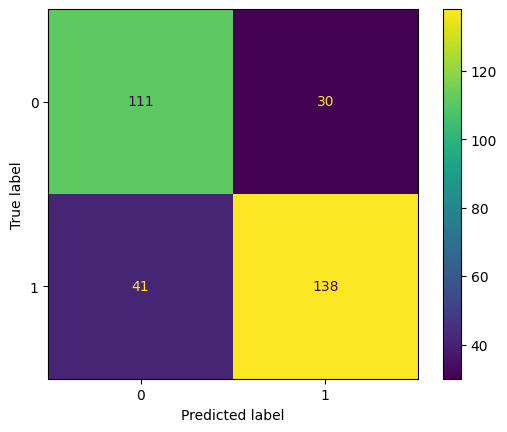

In [ ]:
y_pred = SC.predict(X_train_bin)
print(f"Stacking training Accuracy: {accuracy_score(y_train_bin, y_pred)}\n")

y_pred = SC.predict(X_test_bin)
print(f"Stacking test Accuracy: {accuracy_score(y_test_bin, y_pred)}\n")

acc_sc_bin = "{:.3f}".format(accuracy_score(y_test_bin, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test_bin,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Results

In [ ]:
%%capture
!pip install tabulate


In [ ]:
from tabulate import tabulate
table = [['Classifier', 'Accuracy Multiclass', 'Accuracy Binary'],
         ['Bagging', acc_bag, acc_bag_bin],
         ['AdaBoost', acc_ada, acc_ada_bin],
         ['Random Forest', acc_rf, acc_rf_bin],
         ['Extra Trees', acc_et, acc_et_bin],
         ['Stackig', acc_sc, acc_sc_bin]]
print(tabulate(table))

-------------  -------------------  ---------------
Classifier     Accuracy Multiclass  Accuracy Binary
Bagging        0.628                0.778
AdaBoost       0.537                0.769
Random Forest  0.616                0.775
Extra Trees    0.634                0.791
Stackig        0.631                0.778
-------------  -------------------  ---------------


Come si può vedere dalla tabella sopra riportata **Extra Trees** è il metodo che ci ha restituito il modello miglione in termini di Accuracy, sia per quanto riguarda la classificazione binaria che per la classificazione multiclasse.

#Support vector machine



In questo capitolo abbiamo utilizzato algoritmi di **Support Vector Machines** per la classificazione: nella prima parte abbiamo utilizzato una SVM lineare e una SVM non lineare sul dataset limitato a due features per poter mostrare con facilità i risultati, siamo poi passati ad una grid search per una classificazione efficace utilizzando tutte le features disponibili.

Le SVM sono utilizzabili solo per una classificazione binaria, nella seconda parte abbiamo utilizzato due tecniche (**one-vs-all** e **one-vs-one**) per poterle sfruttare ai fini di una classificazione multiclasse.

## Binary

Import e definizioni di funzioni per poter visualizzare superfici di decisione e svm lineari.

Nello specifico le funzioni scritte sono:

**print_linear_svm**:


*   Disegna la superficie di decisione di un modello SVM lineare.
*   Calcola la retta di decisione e i margini del modello.
*   Visualizza la retta di decisione, i margini e i vettori di supporto.
*   Aggiunge titolo, etichette e griglia al grafico.


**make_meshgrid**

*  Crea una griglia di punti per il grafico.
*  Serve per creare una matrice di punti utilizzata per visualizzare la superficie di decisione.

**plot_contours**

*  Disegna i contorni della superficie di decisione.
*  Prevede la classe di ogni punto nella griglia e disegna i contorni corrispondenti.


**print_decision_surface**
* Disegna la superficie di decisione di un modello SVM.
* Usa la griglia di punti creata da make_meshgrid.
* Chiama plot_contours per disegnare i contorni della superficie di decisione.
* Aggiunge punti di dati, titolo, etichette e mostra il grafico.

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Questa funzione stampa la superficie di decisione di un modello SVM lineare
def print_linear_svm (model, x, y, title="", x_label="", y_label="" ):

    # Calcolo del coefficiente angolare della retta di decisione
    w = model.coef_[0]
    a = -w[0] / w[1]

    # Calcolo del coefficiente angolare della retta di decisione
    x0 = np.linspace(0, 5.5, 200)

    #decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    # Calcolo delle coordinate della retta di decisione
    xx = np.linspace(-4, 4)
    yy = a * xx - (model.intercept_[0]) / w[1]


    # Calcolo del margine
    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    plt.figure(1, figsize=(7, 5))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    # Disegna i vettori di supporto
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80,
    facecolors="none", zorder=10, edgecolors="k")

    #plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
    # edgecolors="k")

    plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
    edgecolors="k")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    plt.show()



# Questa funzione crea una griglia di punti per il grafico
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


# Questa funzione disegna i contorni della superficie di decisione
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Questa funzione stampa la superficie di decisione di un modello SVM
def print_decision_surface (model, x, y, title="", x_label="", y_label="" ):

    #plt.figure( figsize=(7, 5))
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.
    #X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
    X0, X1 = x[:, 0], x[:, 1]

    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('alcohol')
    ax.set_xlabel('sulphates')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    #ax.legend()
    plt.show()

###Sulphates e Alchool


Per ottere risultati facilmente mostrabili abbiamo usato solo due features: la scelta è ricaduta su "*Sulphates*" e "*Alchool*", poichè sono le due variabili in testa nell'analisi della feature importance nell'ambito di Extra Trees (il metodo che al momento ha fornito i risultati migliori).

Le SVM richiedono dati standardizzati: StandardScaler è una classe di scikit-learn che standardizza le caratteristiche rimuovendo la media e scalando alla varianza unitaria.

In [ ]:
X_svm = df[['sulphates',  'alcohol']]

scaler = StandardScaler()

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_bin, test_size=0.2, random_state=RS)

X_svm_train = scaler.fit_transform(X_svm_train)
X_svm_test = scaler.transform( X_svm_test)

La nostra prima SVM è di tipo **lineare**: l'algoritmo cerca di trovare un iperpiano lineare che separa le classi con il margine massimo

In [ ]:
svm_clf = SVC(kernel="linear", C=1, random_state=RS)

svm_clf.fit(X_svm_train, y_svm_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
print(svm_clf.coef_)
print(svm_clf.intercept_)

[[0.45057556 1.01828569]]
[0.13386212]


I seguenti grafici mostrano l'iperpiano (retta), la distribizione dei punti e le superfici di decisione.

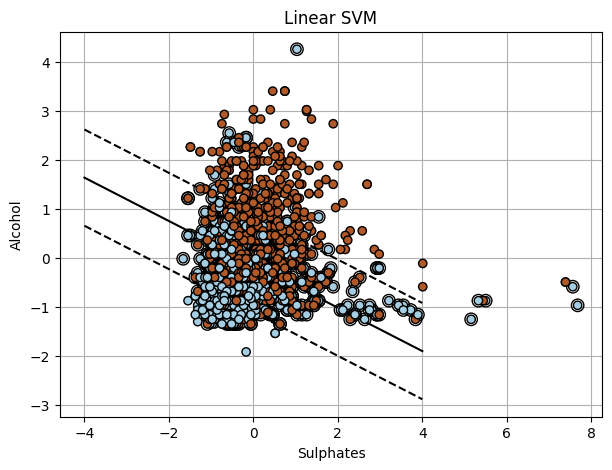

In [ ]:
print_linear_svm (svm_clf, X_svm_train, y_svm_train, "Linear SVM", "Sulphates", "Alcohol")

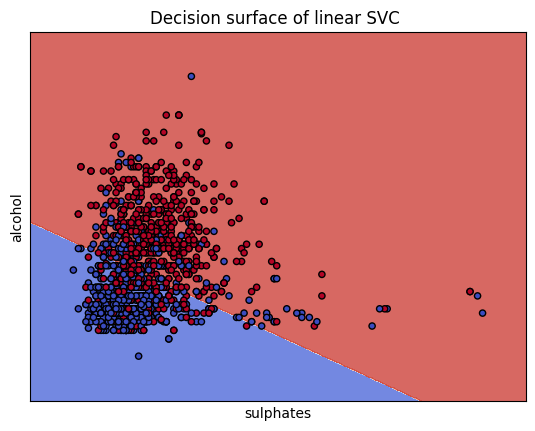

In [ ]:
print_decision_surface(svm_clf, X_svm_train, y_svm_train, "Decision surface of linear SVC" , "Sulphates", "Alcohol")

Come fatto nel capitolo precedente, i risultati riportati sono accuracy di training, accuracy di test e confusion matrix.

Linear training Accuracy: 0.7005473025801408

Linear test Accuracy: 0.7125



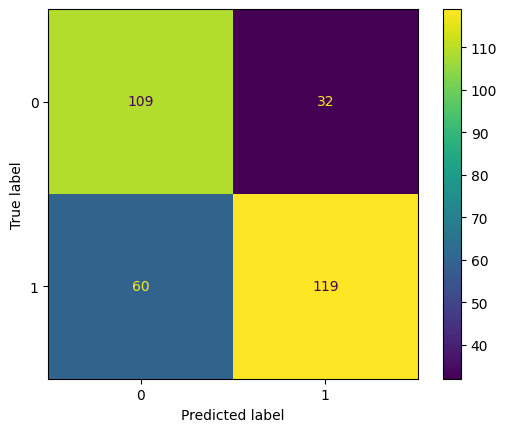

In [ ]:
y_pred = svm_clf.predict(X_svm_train)
print(f"Linear training Accuracy: {accuracy_score(y_svm_train, y_pred)}\n")

y_pred = svm_clf.predict(X_svm_test)
print(f"Linear test Accuracy: {accuracy_score(y_svm_test, y_pred)}\n")

mpl.rcdefaults()
cm = confusion_matrix(y_svm_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();



---





Per la seconda SVM abbiamo usato un kernel a base radiale (RBF, Radial Basis Function), utilizzato per gestire dati che non sono linearmente separabili nello spazio delle features originale.

In [ ]:
svm_clf = SVC(kernel="rbf", C=1, gamma = "scale", random_state=RS)
svm_clf.fit(X_svm_train, y_svm_train)

SVC(C=1, random_state=42)

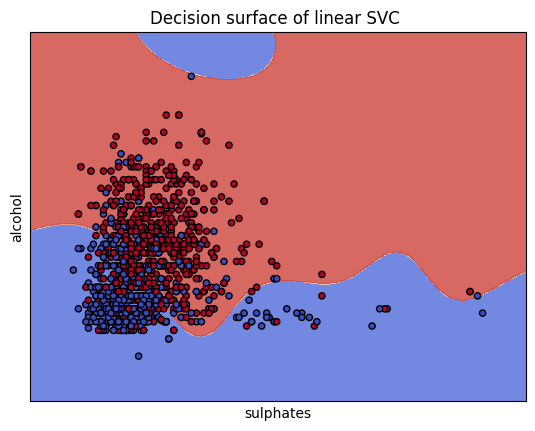

In [ ]:
print_decision_surface(svm_clf, X_svm_train, y_svm_train, "Decision surface of RBF SVC" , "Sulphates", "Alcohol")

RBF training Accuracy: 0.72869429241595

RBF test Accuracy: 0.690625



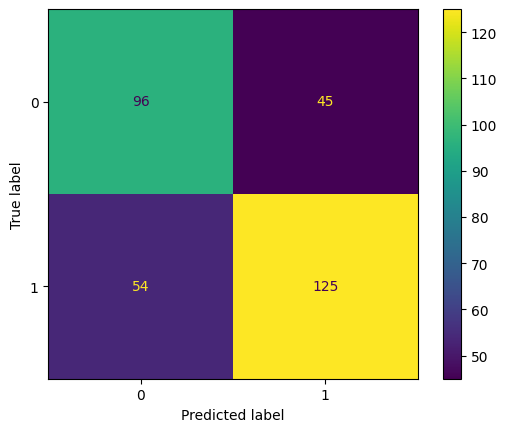

In [ ]:
y_pred = svm_clf.predict(X_svm_train)
print(f"RBF training Accuracy: {accuracy_score(y_svm_train, y_pred)}\n")

y_pred = svm_clf.predict(X_svm_test)
print(f"RBF test Accuracy: {accuracy_score(y_svm_test, y_pred)}\n")

mpl.rcdefaults()
cm = confusion_matrix(y_svm_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### All features

Avendo a disposizione ben più di due features è bene utilizzarle tutte per ottenere risultati più interessanti.

In [ ]:
scaler = StandardScaler()

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=RS)
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

La grid search viene eseguita cercando valori ottimali per i seguenti Iperparametri:
* **Kernel**: indica il tipo di kernel da utilizzare nella SVM;
* **Degree**: indica il grado del polinomio da utilizzare per kernel polinomiali (viene ignorato dagli altri kernel);
* **Gamma**: indica il coefficiente del kernel se di tipo RBF, polinomiale o sigmoide;
* **C**: indica il valore del parametro di regolarizzazione, più è elevato più si cerca di classificare tutti i punti correttamente, un valore basso consente un margine di "errore" più ampio.

Nello specifico, il kernel può essere:


*   **Linear Kernel**: Questo kernel utilizza una funzione lineare per separare i dati. Viene utilizzato quando i dati sono linearmente separabili, ossia quando è possibile tracciare una linea retta (o un iperpiano) che separa le classi;
*   **Polynomial Kernel** ("poly"): utilizza una funzione polinomiale per creare un'iperpiano che separa i dati. È utile quando i dati non sono linearmente separabili ma possono essere separati da una curva polinomiale. Ha un parametro degree che determina il grado del polinomio;
*   **Radial Basis Function (RBF) Kernel**: è un kernel gaussiano che può mappare i punti in uno spazio ad alta dimensione, permettendo di separare dati molto complessi. È uno dei kernel più comunemente usati per la sua capacità di gestire casi in cui la separazione lineare non è possibile;
*  **Sigmoid Kernel ("sigmoid")**: utilizza la funzione sigmoide per creare un'iperpiano di separazione. È simile a un neurone in una rete neurale.


Il codice esegue una ricerca esaustiva su una griglia di parametri per trovare la migliore combinazione per un modello SVM utilizzando diversi tipi di kernel. Ogni kernel ha le sue peculiarità e viene scelto in base alla natura del dataset e al tipo di separazione richiesto. La grid search con cross-validation garantisce che il modello selezionato sia il migliore possibile in termini di accuratezza su dati di test non visti.



In [ ]:
svm = SVC(random_state=RS)


parameter_grid = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "degree" : [2, 3, 4],
    "gamma" : ["scale", "auto"],
    "C" : [1, 5, 10]

}

grid_search = GridSearchCV(
    estimator= svm,
    param_grid=parameter_grid,
    cv=5,
    verbose=1,
    return_train_score=True,
    refit="accuracy",
)

grid_search.fit(X_train_bin, y_train_bin)
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score: 0.7725091911764705
Best parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


**Commento del risultato**

La grid search ha valutato 72 combinazioni di parametri su 5 fold di cross-validation (360 modelli in totale). Il miglior modello ha ottenuto un'accuratezza del 77.25% con i seguenti parametri ottimali: kernel RBF, C=10, gamma='auto', e degree=2 (rilevante solo per kernel polinomiale). Il kernel RBF è adatto per dati non linearmente separabili e C alto permette di penalizzare più severamente gli errori di classificazione.

Viene quindi utilizzata questa configurazione anche per il codice successivo.

In [ ]:
# Creazione e addestramento del modello SVM con i parametri ottimali

svm_clf = SVC(kernel="rbf", C=10, gamma = "auto", random_state=RS)
svm_clf.fit(X_train_bin, y_train_bin)

SVC(C=10, gamma='auto', random_state=42)

training Accuracy: 0.8498827208756842

test Accuracy: 0.7625



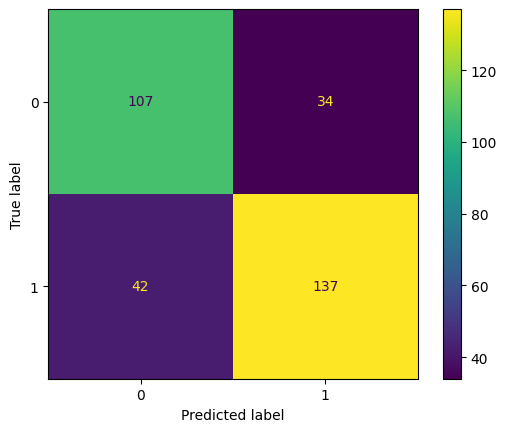

In [ ]:
# Calcolo e stampa dell'accuratezza sul set di training
y_pred = svm_clf.predict(X_train_bin)
print(f"training Accuracy: {accuracy_score(y_train_bin, y_pred)}\n")


# Calcolo e stampa dell'accuratezza sul set di test
y_pred = svm_clf.predict(X_test_bin)
print(f"test Accuracy: {accuracy_score(y_test_bin, y_pred)}\n")

# Formattazione dell'accuratezza del modello sui dati di test
acc_svm = "{:.3f}".format(accuracy_score(y_test_bin, y_pred))

mpl.rcdefaults()

# Calcolo e visualizzazione della matrice di confusione
cm = confusion_matrix(y_test_bin,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

 **La matrice di confusione** visualizza le prestazioni del modello SVM con kernel RBF sui dati di test.
Le etichette sull'asse y rappresentano le etichette vere, mentre le etichette sull'asse x rappresentano le etichette predette.

 La matrice è così strutturata:
* 107 veri negativi (classe 0 correttamente classificata);
* 34 falsi positivi (classe 0 classificata come classe 1);
* 42 falsi negativi (classe 1 classificata come classe 0);
* 137 veri positivi (classe 1 correttamente classificata).

**Analisi delle prestazioni**: il modello ha una buona capacità di classificare correttamente entrambe le classi, con 107 veri negativi e 137 veri positivi.
 Tuttavia, ci sono 34 falsi positivi e 42 falsi negativi, indicando che c'è ancora un margine di errore.


## Multiclass

Di seguito abbiamo utilizzato due tecniche per sfruttare Support Vector Machines per una classificazione con un numero di classi maggiore di due.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import GridSearchCV

X_svm = X

scaler = StandardScaler()
X_svm = scaler.fit_transform(X_svm)

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y, test_size=0.2, random_state=RS)

In [ ]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### OVA

Con la strategia **One-vs-All** (OvA), si addestrano più classificatori binari, ognuno dei quali distingue tra una classe e le restanti ("Uno-contro-Tutti"). Durante la predizione, si eseguono tutti i classificatori, e la classe scelta dalla previsione è quella con il punteggio di confidenza più alto.

In [ ]:
ovr = OneVsRestClassifier(SVC(random_state=RS))

parameter_grid = [{
                    "estimator__kernel" : ["linear", "poly", "rbf", "sigmoid"],
                    "estimator__degree" : [2, 3, 4],
                    "estimator__gamma" : ["scale", "auto"],
                    "estimator__C" : [1, 5, 10]
                   }]

grid_search = GridSearchCV(
    estimator= ovr,
    param_grid=parameter_grid,
    cv=5,
    verbose=1,
    return_train_score=True,
    refit="accuracy",
)

grid_search.fit(X_train, y_train.values.ravel())
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score: 0.627092524509804
Best parameters: {'estimator__C': 10, 'estimator__degree': 2, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}


In [ ]:
ovr_clf = OneVsRestClassifier(SVC(C=10, gamma="scale", kernel = "rbf", random_state=RS))

ovr_clf.fit(X_train, y_train.values.ravel())

OneVsRestClassifier(estimator=SVC(C=10, random_state=42))

training Accuracy: 0.800625488663018

test Accuracy: 0.625



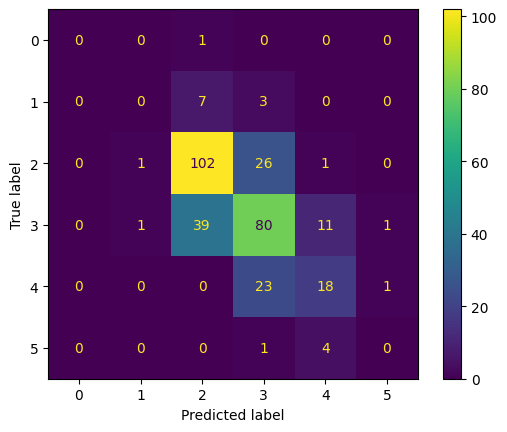

In [ ]:
y_pred = ovr_clf.predict(X_train)
print(f"training Accuracy: {accuracy_score(y_train, y_pred)}\n")

y_pred = ovr_clf.predict(X_test)
print(f"test Accuracy: {accuracy_score(y_test, y_pred)}\n")

acc_ovr = "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### OVO

Con la strategia One-vs-One (OvO), invece di addestrare un classificatore per distinguere una classe dal resto, si addestrano classificatori binari per distinguere ogni possibile coppia di classi. Quindi, se ci sono
N classi, si addestrano `N×(N−1)/2 ` classificatori (nel nostro caso 15, con N=6). Durante la fase di previsione, ciascun classificatore "vota" per una classe, e la classe con il maggior numero di voti è considerata la classe predetta.

In [ ]:
ovo = OneVsOneClassifier(SVC(random_state=RS))

parameter_grid = [{
                    "estimator__kernel" : ["linear", "poly", "rbf", "sigmoid"],
                    "estimator__degree" : [2, 3, 4],
                    "estimator__gamma" : ["scale", "auto"],
                    "estimator__C" : [1, 5, 10]
                   }]

grid_search = GridSearchCV(
    estimator= ovo,
    param_grid=parameter_grid,
    cv=5,
    verbose=1,
    return_train_score=True,
    refit="accuracy",
)

grid_search.fit(X_train, y_train.values.ravel())
print("Best score: {}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score: 0.6427297794117648
Best parameters: {'estimator__C': 10, 'estimator__degree': 2, 'estimator__gamma': 'auto', 'estimator__kernel': 'rbf'}


In [ ]:
ovo_clf = OneVsOneClassifier(SVC(C=10, gamma="auto", kernel = "rbf", random_state=RS))

ovo_clf.fit(X_train, y_train.values.ravel())

OneVsOneClassifier(estimator=SVC(C=10, gamma='auto', random_state=42))

training Accuracy: 0.7928068803752932

test Accuracy: 0.615625



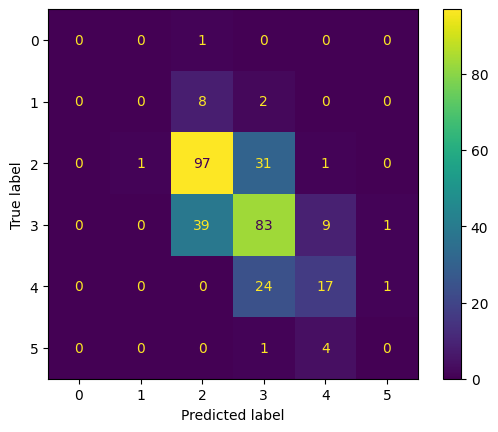

In [ ]:
y_pred = ovo_clf.predict(X_train)
print(f"training Accuracy: {accuracy_score(y_train, y_pred)}\n")

y_pred = ovo_clf.predict(X_test)
print(f"test Accuracy: {accuracy_score(y_test, y_pred)}\n")

acc_ovo = "{:.3f}".format(accuracy_score(y_test, y_pred))

mpl.rcdefaults()
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Results

In [ ]:
from tabulate import tabulate
table = [['Classifier', 'Accuracy '],
         ['SVM', acc_svm],
         ['OVA', acc_ovr],
         ['OVO', acc_ovo],]

table1 = [['Classifier', 'Accuracy '],
         ['Extra Trees (bin)', acc_et_bin],
         ['Extra Trees (multi)', acc_et],]

print(tabulate(table))
print(tabulate(table1))

----------  --------
Classifier  Accuracy
SVM         0.762
OVA         0.625
OVO         0.616
----------  --------
-------------------  --------
Classifier           Accuracy
Extra Trees (bin)    0.791
Extra Trees (multi)  0.634
-------------------  --------


La tabella sopra riportata mostra come sia per la classificazione binaria che per la classificazione multiclasse (più di due) i modelli di **Extra Trees** risultano ancora essere i migliori.


# Artificial Neural Networks



Nel seguente capitolo verrà affrontato il problema della classificazione utilizzando **Reti Neurali Artificiali** (ANN): modelli computazionali ispirati al funzionamento del cervello umano, capaci di apprendere rappresentazioni complesse dai dati.



A differenza dai capitoli precedenti, anzichè usare una grid search, per ottimizzare i valori degli iperparametri è stato utilizzata il framework **Optuna**.
Optuna esplora lo spazio degli iperparametri, sfruttando l'ottimizzaziona bayesiana, attraverso una serie di "trial", ognuno dei quali rappresenta una combinazione specifica di parametri. Durante ogni trial, il modello viene addestrato e valutato.

In [ ]:
%%capture
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D, Embedding
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

!pip install optuna
import optuna

Oltre alla divisione tra test e training set vi è un ultoriore split dei dati per ottenere un set di validazione utile in fase di training del modello.

In [ ]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RS)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=RS)
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_train_bin, y_train_bin, test_size=0.2, random_state=RS)

X_train_bin = scaler.fit_transform(X_train_bin)
X_val_bin = scaler.transform(X_val_bin)
X_test_bin = scaler.transform(X_test_bin)

## Multiclass

In [ ]:
keras.backend.clear_session()
np.random.seed(RS)
tf.random.set_seed(RS)

La seguente funzione di Optuna imposta la ricerca dei valori degli iperparametri, definendo anche il modello da creare in base ad essi.

* **n_hidden**: rappresenta il numero di strati nascosti nella rete neurale;
* **hidden_units**: indica il numero di neuroni del primo strato nascosto della rete neurale, si dimezza ad ogni strato nascosto;
* **learning_rate**: rappresenta la velocità con cui il modello aggiorna i pesi durante l'addestramento. Un learning rate troppo alto può causare instabilità nell'addestramento, mentre uno troppo basso può rallentare la convergenza;
* **dropout**: specifica il numero di unità da disattivare durante l'addestramento, è una tecnica che aiuta a prevenire l'overfitting mantenendo il modello più robusto e generalizzato;
* **hidden_activation**: indica la funzione di attivazione utilizzata negli strati nascosti della rete neurale;
* **batch_norm**: specifica se usare o no la Batch Normalization, una tecnica utilizzata per accelerare l'addestramento e migliorare la stabilità della rete, normalizzando l'output di ogni strato nascosto prima di passarlo alla funzione di attivazione;
* **kernel_regularizer**: indica la tecnica di regolarizzazione applicata ai pesi della rete neurale. Può essere L1 (Lasso) o L2 (Ridge), e aiuta a prevenire l'overfitting controllando la complessità del modello;
* **batch_size**: rappresenta il numero di esempi di addestramento utilizzati in ciascuna iterazione durante l'addestramento della rete neurale. Una dimensione del batch più grande può accelerare l'addestramento.

Si noti che rimangono fisse la loss_function (sparse categorical crossentropy), l'optimizer (Adam) ed il numero di epoche (30).

Inoltre per il modello per la classificazione a 6 classi il layer finale ha un numero di neuroni pari al numero di classi e una funzione di attivazione softmax.

In [ ]:
def objective(trial):
    n_hidden = trial.suggest_int('n_hidden', 1, 5)
    hidden_units = trial.suggest_int('hidden_units', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.1)
    dropout = trial.suggest_float("dropout", 0, 0.6)
    hidden_activation = trial.suggest_categorical("hidden_activation", ["relu", "sigmoid", "tanh"])
    batch_norm = trial.suggest_categorical("batch_norm", [True, False])
    kernel_regularizer = trial.suggest_categorical("kernel_regularizer", ["l1", "l2"])

    batch_size = trial.suggest_categorical("batch_size", [20, 32, 40, 48])




    model = Sequential()

    model.add(Input(shape=X_train.shape[1:] ))

    for i in range(n_hidden):
            model.add(
                Dense(
                    units=hidden_units,
                    activation=hidden_activation,
                    kernel_regularizer=kernel_regularizer
                )
            )
            model.add(
                Dropout(dropout)
            )

            if batch_norm:
                model.add(tf.keras.layers.BatchNormalization())

            hidden_units = int(hidden_units / 2)

    model.add(Dense (6, activation="softmax"))

    model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics='accuracy',
        )

    model.fit(X_train, y_train, epochs=30, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

    score = model.evaluate(X_val, y_val, verbose=0)
    return score[1]





Il codice seguente configura uno studio Optuna per eseguire l'ottimizzazione degli iperparametri con un approccio Tree-structured Parzen Estimator per il campionamento e il criterio di pruning basato su successive halving.

In [ ]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=RS),
    pruner=optuna.pruners.SuccessiveHalvingPruner()
)

Avvio di un numero scelto di trials di Optuna:

In [ ]:
study.optimize(objective, n_trials=150)

Migliori valori ottenuti:

In [ ]:
best_params=study.best_params
best_params

{'n_hidden': 2,
 'hidden_units': 76,
 'learning_rate': 0.005465034237687264,
 'dropout': 0.12811857538420668,
 'hidden_activation': 'relu',
 'batch_norm': True,
 'kernel_regularizer': 'l1',
 'batch_size': 48}

Numero del trial migliore e miglior valore della funzione obiettivo sopra definita (accuracy su set validazione):

In [ ]:
print(study.best_trial.number)
print(study.best_value)

69
0.6796875


Di seguito vengono riportati graficamente i risultati dello studio effettuato da Optuna:

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)



---



In [ ]:
keras.backend.clear_session()
np.random.seed(RS)
tf.random.set_seed(RS)

**Migliori iperparametri**:
'n_hidden': 2,
 'hidden_units': 76,
 'learning_rate': 0.005465034237687264,
 'dropout': 0.12811857538420668,
 'hidden_activation': 'relu',
 'batch_norm': True,
 'kernel_regularizer': 'l1',
 'batch_size': 48

Creazione del modello migliore:

In [ ]:
def create_best_model():
    n_hidden = best_params['n_hidden']
    hidden_units = best_params['hidden_units']
    learning_rate = best_params['learning_rate']
    dropout = best_params['dropout']
    hidden_activation = best_params['hidden_activation']
    batch_norm = best_params['batch_norm']
    kernel_regularizer = best_params['kernel_regularizer']

    batch_size = best_params['batch_size']

    model = Sequential()

    model.add(Input(shape=X_train.shape[1:] ))

    for i in range(n_hidden):
            model.add(
                Dense(
                    units=hidden_units,
                    activation=hidden_activation,
                    kernel_regularizer=kernel_regularizer
                )
            )
            model.add(
                Dropout(dropout)
            )

            if batch_norm:
                model.add(tf.keras.layers.BatchNormalization())

            hidden_units = int(hidden_units / 2)

    model.add(Dense (6, activation="softmax"))

    model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics='accuracy',
        )

    return model

best_model = create_best_model()

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 76)                912       
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 batch_normalization (Batch  (None, 76)                304       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 38)                2926      
                                                                 
 dropout_1 (Dropout)         (None, 38)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 38)                152       
 chNormalization)                                       

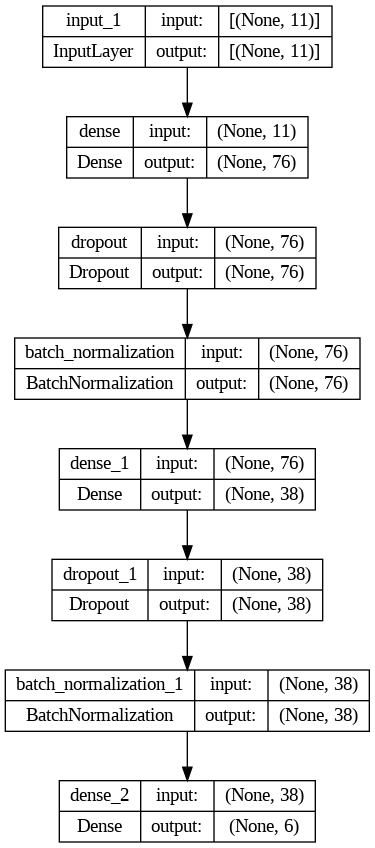

In [ ]:
keras.utils.plot_model(best_model, show_shapes=True)

Fit del modello:

In [ ]:
best_model.fit(X_train, y_train, epochs=30, batch_size=best_params['batch_size'], validation_data=(X_val, y_val))

Epoch 1/30
22/22 [==============================] - 2s 26ms/step - loss: 5.3456 - accuracy: 0.4311 - val_loss: 4.3052 - val_accuracy: 0.6172
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 3.6089 - accuracy: 0.5709 - val_loss: 2.9852 - val_accuracy: 0.6328
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 2.5844 - accuracy: 0.5797 - val_loss: 2.3169 - val_accuracy: 0.3828
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 2.0214 - accuracy: 0.5748 - val_loss: 1.9153 - val_accuracy: 0.4062
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 1.7303 - accuracy: 0.5777 - val_loss: 1.7458 - val_accuracy: 0.4414
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 1.5976 - accuracy: 0.5924 - val_loss: 1.6545 - val_accuracy: 0.3633
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 1.5517 - accuracy: 0.5552 - val_loss: 1.6328 - val_accuracy: 0.3633
Epoch 8/30
22/22 [=

Accuracy sul set di test e stampa della confusion matrix:

In [ ]:
print("Test accuracy:")
acc_nn = best_model.evaluate(X_test, y_test)

Test accuracy:
10/10 [==============================] - 0s 2ms/step - loss: 1.0779 - accuracy: 0.5781


10/10 [==============================] - 0s 2ms/step


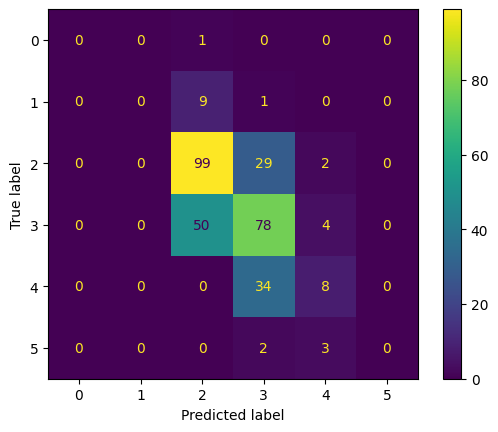

In [ ]:
pred = best_model.predict(X_test)
y_pred = np.argmax(pred, axis=-1)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Binary

In [ ]:
keras.backend.clear_session()
np.random.seed(RS)
tf.random.set_seed(RS)

In [ ]:
y_train_bin.value_counts()

quality
1    555
0    468
Name: count, dtype: int64

L'unica differenza sostanziale con quanto mostrato sopra in questa funzione è che lo strato finale è ora composto da soli 2 neuroni (unità) e la funzione di attivazione è la sigmoidea, più adatta ad una classificazione binaria.

In [ ]:
def objective(trial):
    n_hidden = trial.suggest_int('n_hidden', 1, 5)
    hidden_units = trial.suggest_int('hidden_units', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.1)
    dropout = trial.suggest_float("dropout", 0, 0.6)
    hidden_activation = trial.suggest_categorical("hidden_activation", ["relu", "sigmoid", "tanh"])
    batch_norm = trial.suggest_categorical("batch_norm", [True, False])
    kernel_regularizer = trial.suggest_categorical("kernel_regularizer", ["l1", "l2"])

    batch_size = trial.suggest_categorical("batch_size", [20, 32, 40, 48])




    model = Sequential()

    model.add(Input(shape=X_train_bin.shape[1:] ))

    for i in range(n_hidden):
            model.add(
                Dense(
                    units=hidden_units,
                    activation=hidden_activation,
                    kernel_regularizer=kernel_regularizer
                )
            )
            model.add(
                Dropout(dropout)
            )

            if batch_norm:
                model.add(tf.keras.layers.BatchNormalization())

            hidden_units = int(hidden_units / 2)

    model.add(Dense (2, activation="sigmoid"))

    model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics='accuracy',
        )

    model.fit(X_train_bin, y_train_bin, epochs=30, batch_size=batch_size, validation_data=(X_val_bin, y_val_bin), verbose=0)

    score = model.evaluate(X_val_bin, y_val_bin, verbose=0)
    return score[1]





In [ ]:
study_bin = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=RS),
    pruner=optuna.pruners.SuccessiveHalvingPruner()
)

In [ ]:
study_bin.optimize(objective, n_trials=150)

In [ ]:
best_params=study_bin.best_params
best_params

{'n_hidden': 2,
 'hidden_units': 77,
 'learning_rate': 0.004726945956334916,
 'dropout': 0.05587749786891043,
 'hidden_activation': 'tanh',
 'batch_norm': False,
 'kernel_regularizer': 'l1',
 'batch_size': 40}

In [ ]:
print(study_bin.best_trial.number)
print(study_bin.best_value)

114
0.796875


In [ ]:
optuna.visualization.plot_optimization_history(study_bin)

In [ ]:
optuna.visualization.plot_slice(study_bin)

In [ ]:
optuna.visualization.plot_param_importances(study_bin)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_bin)



---



In [ ]:
keras.backend.clear_session()
np.random.seed(RS)
tf.random.set_seed(RS)

**Migliori iperparametri**:
'n_hidden': 2,
 'hidden_units': 77,
 'learning_rate': 0.004726945956334916,
 'dropout': 0.05587749786891043,
 'hidden_activation': 'tanh',
 'batch_norm': False,
 'kernel_regularizer': 'l1',
 'batch_size': 40

In [ ]:
def create_best_model():
    n_hidden = best_params['n_hidden']
    hidden_units = best_params['hidden_units']
    learning_rate = best_params['learning_rate']
    dropout = best_params['dropout']
    hidden_activation = best_params['hidden_activation']
    batch_norm = best_params['batch_norm']
    kernel_regularizer = best_params['kernel_regularizer']

    batch_size = best_params['batch_size']


    model = Sequential()

    model.add(Input(shape=X_train_bin.shape[1:] ))

    for i in range(n_hidden):
            model.add(
                Dense(
                    units=hidden_units,
                    activation=hidden_activation,
                    kernel_regularizer=kernel_regularizer
                )
            )
            model.add(
                Dropout(dropout)
            )

            if batch_norm:
                model.add(tf.keras.layers.BatchNormalization())

            hidden_units = int(hidden_units / 2)

    model.add(Dense (2, activation="sigmoid"))

    model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            metrics='accuracy',
        )

    return model


best_model_bin = create_best_model()

In [ ]:
best_model_bin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 77)                924       
                                                                 
 dropout (Dropout)           (None, 77)                0         
                                                                 
 dense_1 (Dense)             (None, 38)                2964      
                                                                 
 dropout_1 (Dropout)         (None, 38)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 78        
                                                                 
Total params: 3966 (15.49 KB)
Trainable params: 3966 (15.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


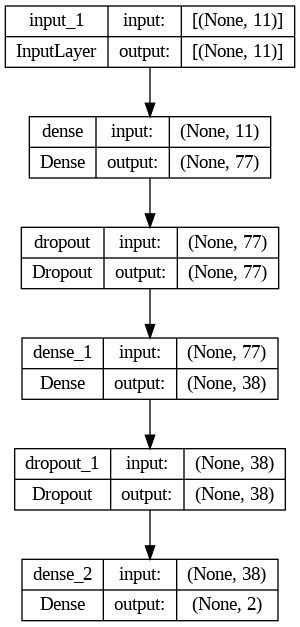

In [ ]:
keras.utils.plot_model(best_model_bin, show_shapes=True)

In [ ]:
best_model_bin.fit(X_train_bin, y_train_bin, epochs=30, batch_size=best_params['batch_size'], validation_data=(X_val_bin, y_val_bin))

Epoch 1/30
26/26 [==============================] - 1s 14ms/step - loss: 3.6458 - accuracy: 0.7116 - val_loss: 2.2477 - val_accuracy: 0.7578
Epoch 2/30
26/26 [==============================] - 0s 4ms/step - loss: 1.5021 - accuracy: 0.7263 - val_loss: 0.9969 - val_accuracy: 0.7773
Epoch 3/30
26/26 [==============================] - 0s 5ms/step - loss: 0.8250 - accuracy: 0.7370 - val_loss: 0.7253 - val_accuracy: 0.7734
Epoch 4/30
26/26 [==============================] - 0s 5ms/step - loss: 0.6770 - accuracy: 0.7253 - val_loss: 0.6611 - val_accuracy: 0.7656
Epoch 5/30
26/26 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.7351 - val_loss: 0.6400 - val_accuracy: 0.7734
Epoch 6/30
26/26 [==============================] - 0s 5ms/step - loss: 0.6166 - accuracy: 0.7380 - val_loss: 0.6265 - val_accuracy: 0.7656
Epoch 7/30
26/26 [==============================] - 0s 4ms/step - loss: 0.6082 - accuracy: 0.7312 - val_loss: 0.6270 - val_accuracy: 0.7578
Epoch 8/30
26/26 [=

In [ ]:
print("Test accuracy:")
acc_nn_bin = best_model_bin.evaluate(X_test_bin, y_test_bin)

Test accuracy:
10/10 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.7437


10/10 [==============================] - 0s 2ms/step


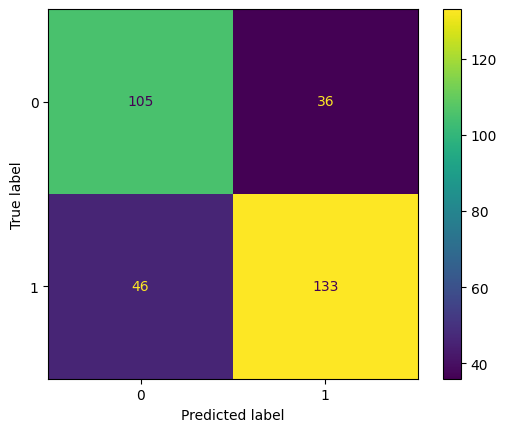

In [ ]:
pred = best_model_bin.predict(X_test_bin)
y_pred = np.argmax(pred, axis=-1)


cm = confusion_matrix(y_test_bin, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

## Results

In [ ]:
%%capture
!pip install tabulate

In [ ]:
from tabulate import tabulate
table = [['Classifier', 'Accuracy Multiclass', 'Accuracy Binary'],
         ['Neural Networks', "{:.3f}".format(acc_nn[1]), "{:.3f}".format(acc_nn_bin[1])],
         ['Extra Trees', acc_et, acc_et_bin]]
print(tabulate(table))

---------------  -------------------  ---------------
Classifier       Accuracy Multiclass  Accuracy Binary
Neural Networks  0.578                0.744
Extra Trees      0.634                0.791
---------------  -------------------  ---------------


Anche contro le Reti Neurali artificiali l'Extra Trees risulta essere il metodo migliore tra quelli usati in questa ricerca, per entrambi i tipi di classificazione svolti.

# Conclusione Learning Supervisionato

In conclusione, i modelli di apprendimento supervisionato che hanno permesso di ottenere l'accuracy più alta sono entrambi modelli di **Extra Trees**:

Per quanto riguarda la classificazione **binaria** il miglior risultato è un accuracy di **0.791**.

Per la classificazione a **6 classi** la miglior accuracy ottenuta è di **0.634**.

Di seguito si riporta una tabella riassuntiva dei risultati ottenuti:



| **Classificatore** | **6 classi** | **Binaria** |
|--------------------|--------------|-------------|
| Bagging / Pasting  | 0.628125     | 0.778125    |
| Boosting           | 0.5375       | 0.76875     |
| Random Forest      | 0.615625     | 0.775       |
| Extra Trees        | 0.634375     | 0.790625    |
| Stacking           | 0.63125      | 0.778125    |
| SVM                | -            | 0.7625      |
| SVM OvA            | 0.625        | -           |
| SVM OvO            | 0.615625     | -           |
| ANN                | 0.5781       | 0.7437      |

#Clustering

*Clustering* si riferisce a un insieme di tecniche per individuare sottogruppi, o cluster, in un set di dati.

Quando raggruppiamo dei dati, cerchiamo di suddividerli in gruppi distinti in modo che ogni gruppo sia composto da elementi simili fra loro.

##K-Means

*K-means* è un metodo che va a dividere il dataset in K set diversi. La peculiarità di **questi insiemi è che non si sovrappongono**.

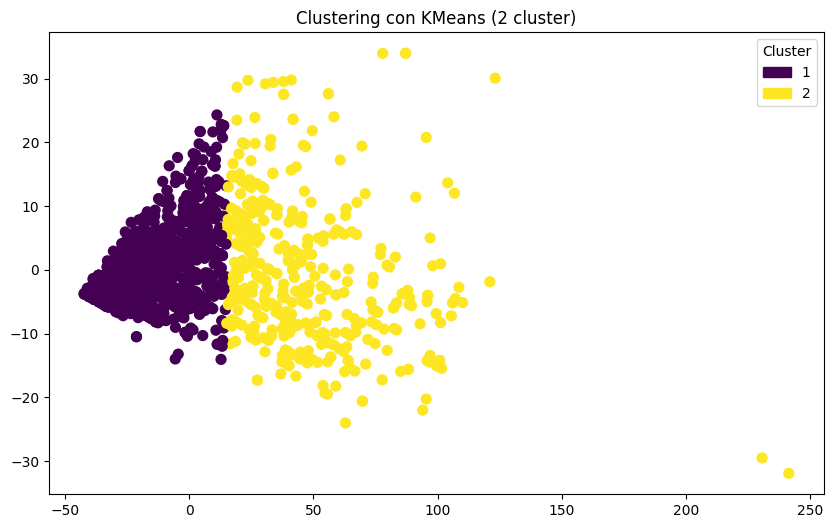

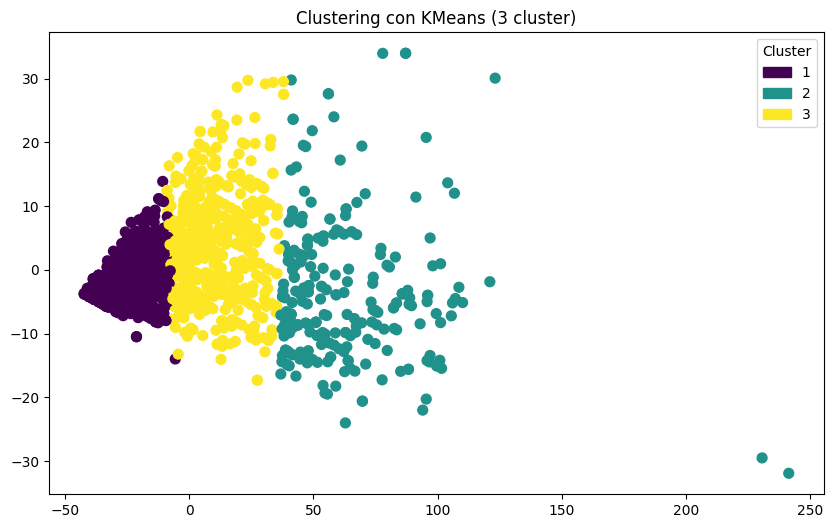

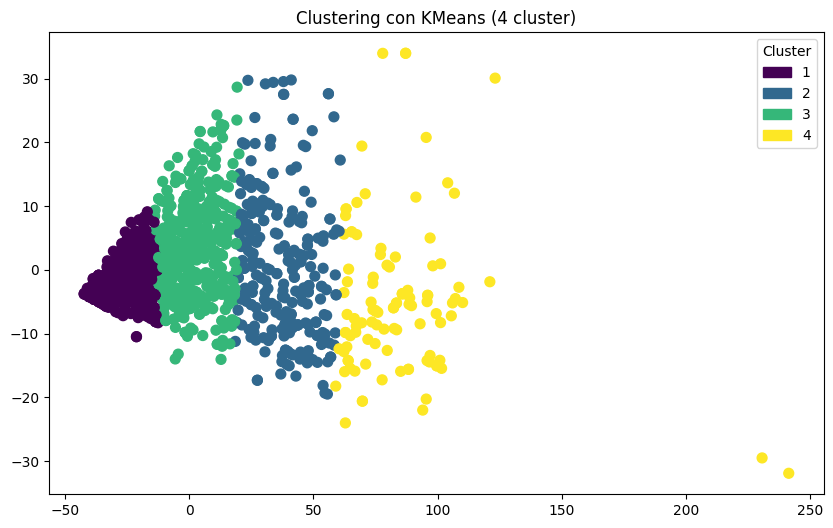

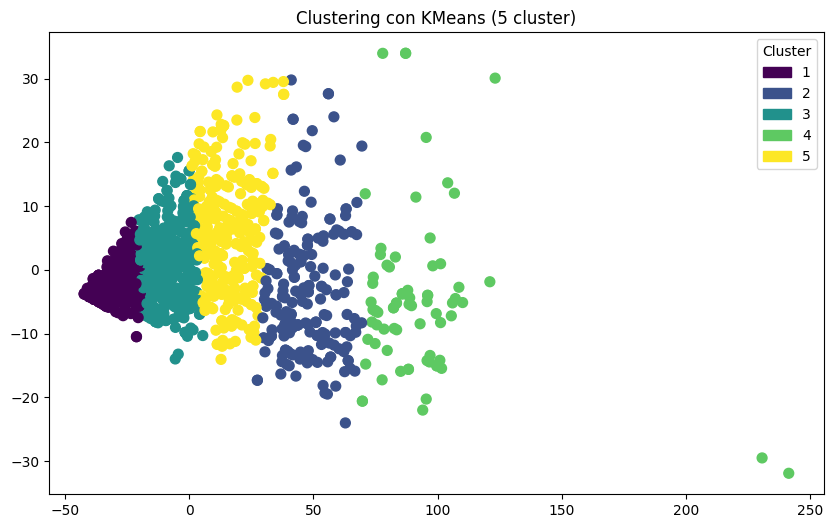

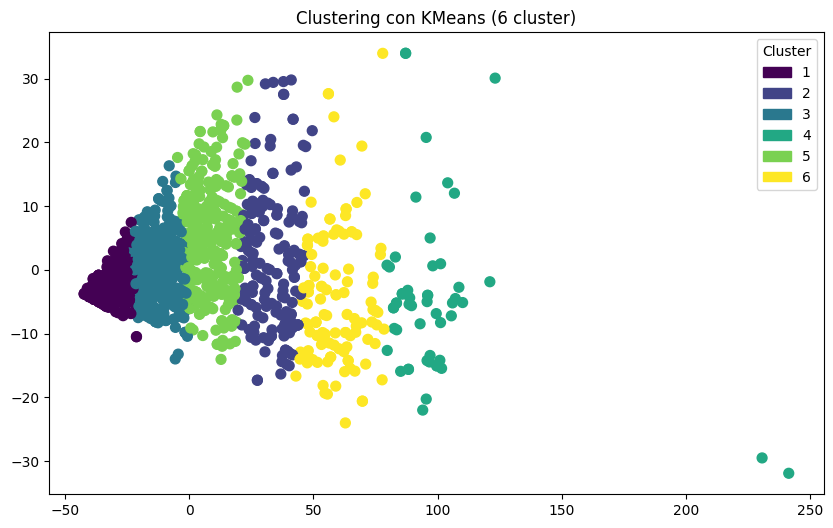

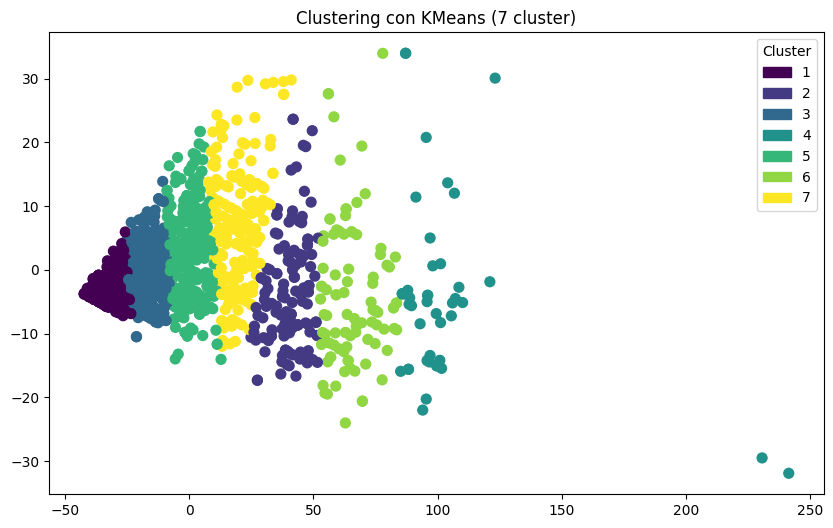

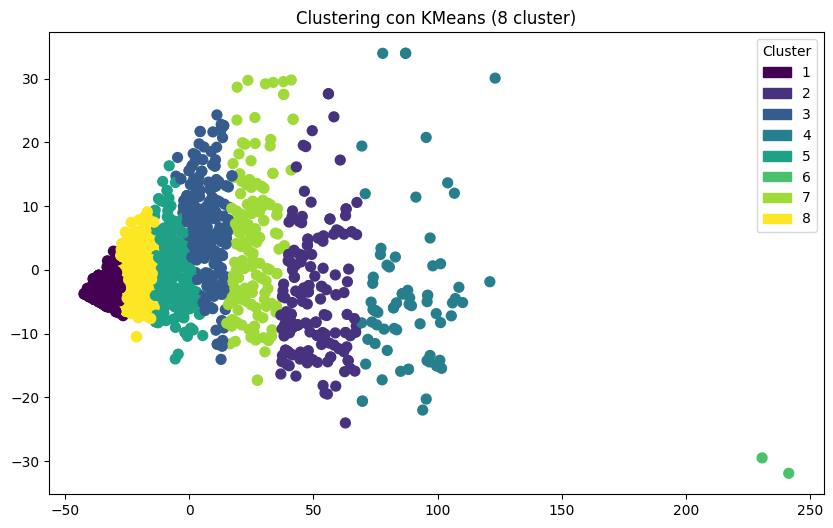

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import patches, colors

for k in range(2, 9):
    # Crea un oggetto KMeans con il numero desiderato di cluster
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=RS).fit(X, y)

    pca = PCA(n_components=2)
    labels = kmeans.labels_
    X_with_labels = PCA(n_components=2).fit_transform(X)

    # features
    feature_names = X.all

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x=X_with_labels[:, 0], y=X_with_labels[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"Clustering con KMeans ({k} cluster)")

    norm = colors.Normalize(vmin=0, vmax=k-1)
    handles = [patches.Patch(color=scatter.cmap(norm(i)), label=str(i+1)) for i in range(k)]
    plt.legend(handles=handles, title="Cluster")

    plt.colorbar().remove()

    plt.show()


Quando si applica k-means, un buon approccio per decidere la quantità di cluster da considerare è la _elbow rule_. Si tratta di un metodo euristico, che valuta l'SSE delle distanze tra ogni datapoint dal centroide del cluster assegnato.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

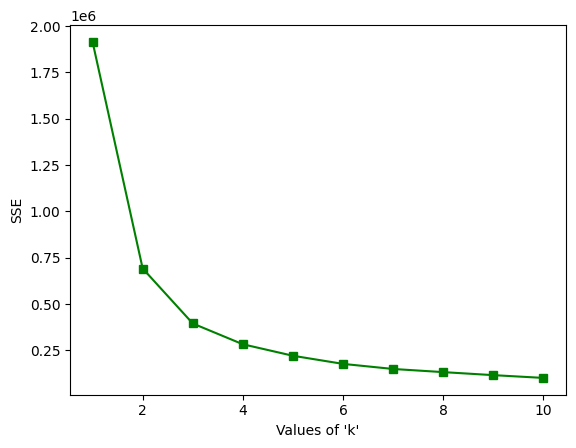

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import patches, colors

sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RS)
    kmeans.fit(X)
    sse[i] = kmeans.inertia_

plt.plot(sse.keys(), sse.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('SSE')
plt.show()

Come si vede dal plot risultante, un buon numero di cluster da considerare potrebbe essere k=3.
Inoltre, osservando le computazioni seguite sopra, si nota che con tale valore è stato eseguito un clustering appropriato.

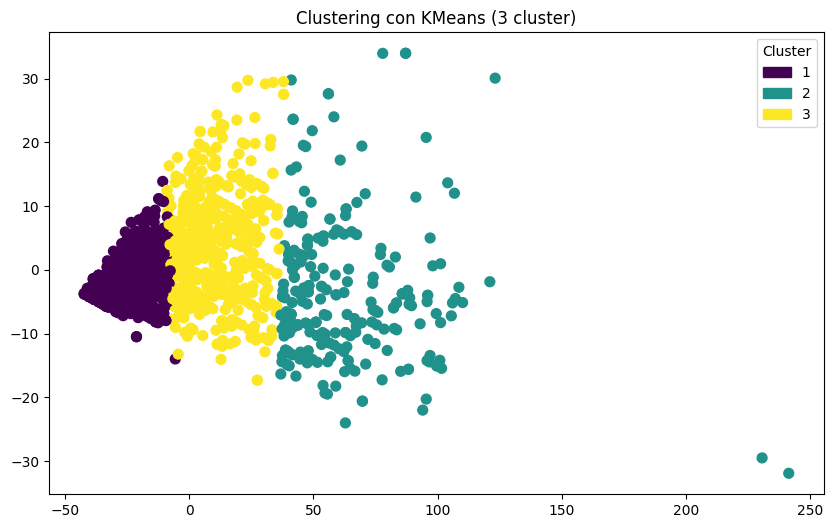

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=RS).fit(X, y)

pca = PCA(n_components=2)
labels = kmeans.labels_
X_with_labels = PCA(n_components=2).fit_transform(X)

# features
feature_names = X.all

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=X_with_labels[:, 0], y=X_with_labels[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f"Clustering con KMeans ({k} cluster)")

# legenda e normalizzazione
handles = [patches.Patch(color=scatter.cmap(norm(i)), label=str(i+1)) for i in range(k)]
plt.legend(handles=handles, title="Cluster")

# Rimuovi la barra dei colori predefinita
plt.colorbar().remove()

plt.show()

##DB-Scan

DBScan è un algoritmo di clustering. Le lettere _DB_ nel nome significano Density Based.  
A differenza di k-means, che invece considera i cluster come regioni dalla forma sferica e ne richiede la definizione del numero prima dell'esecuzione, DBScan è in grado di individuare cluster dalla forma e dimensioni arbitrarie, senza richiederne in input il numero come parametro.  
Nel frammento di codice che segue è stato impiegato DBScan dalla libreria `sklearn`. Di seguito si spiegano gli argomenti dati alla funzione.  

`sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', p=None, n_jobs=None)`

*  **eps: float, default = 0.5**

indica la massima distanza tra due data-point affinché questi siano considerati l'uno all'interno del neighborhood dell'altro.  
Si noti che questo non è il valore massimo della distanza dei punti in uno stesso cluster

* **min_samples: int, default = 5**

è il numero di elementi in un vicinato di un punto, affinché questo sia considerato un punto core

* **metric: str, default=’euclidean’**

The metric to use when calculating distance between instances in a feature array.

* **algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’**

è l'algoritmo impiegato per valutare la distanza tra i punti

* **p: float, default=None**

è la potenza della distanza di Minkowski da adottare per il calcolo della distanza tra punti (se è `none`, allora si ha `p=2`, equivalente alla metrica euclidea)

* **n_jobs: int, default=None**

numero di job paralleli da eseguire (con `none` si ha 1 job, `-1` impiega tutti i processori)

La scelta dei valori eps e min_samples non è triviale: DBSCAN ha una variazione (OPTICS), che però non è stata qui implementata. Per selezionare opportunamente i valori dei parametri, sono state create delle sequenze con potenziali valori ed è stato eseguito DBSCAN con ogni coppia possibile.


eps=4.500000
min=5.000000
Estimated number of clusters: 6
Estimated number of noise points: 115


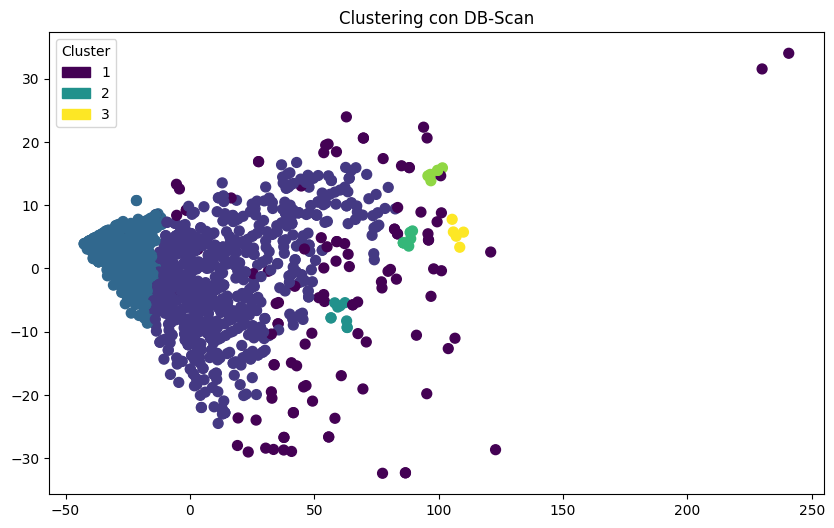

eps=4.500000
min=6.000000
Estimated number of clusters: 6
Estimated number of noise points: 127


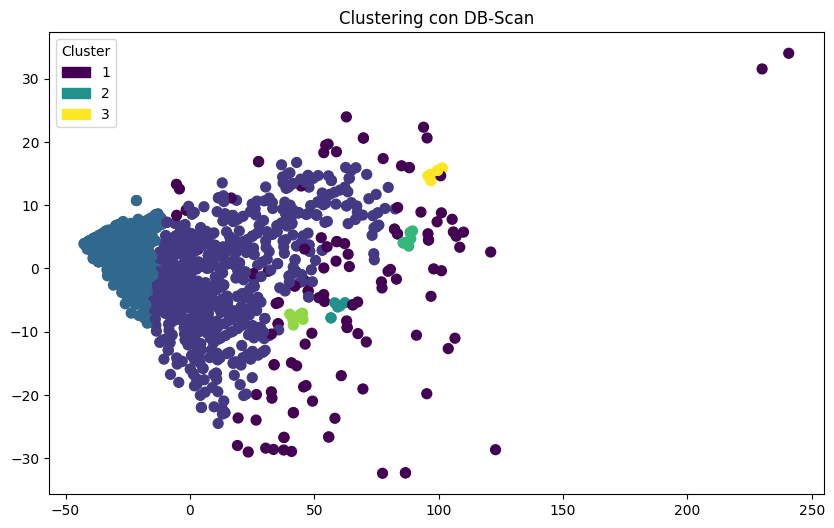

eps=4.500000
min=7.000000
Estimated number of clusters: 6
Estimated number of noise points: 151


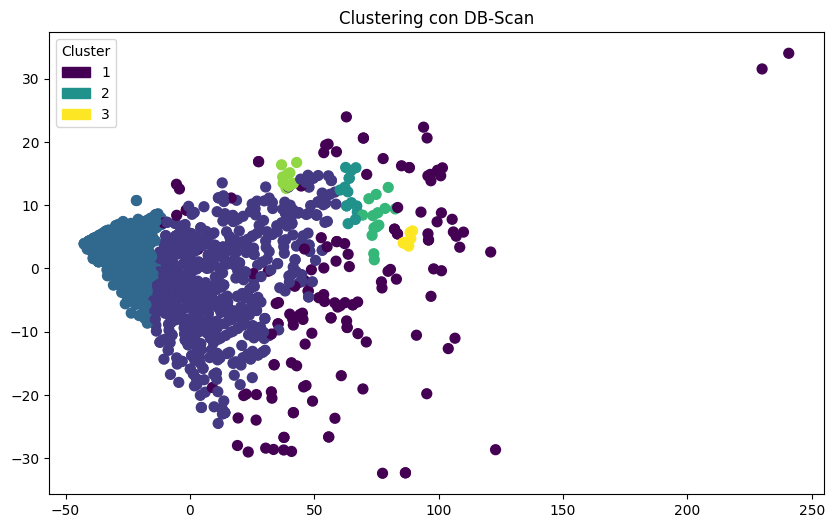

eps=5.000000
min=5.000000
Estimated number of clusters: 7
Estimated number of noise points: 71


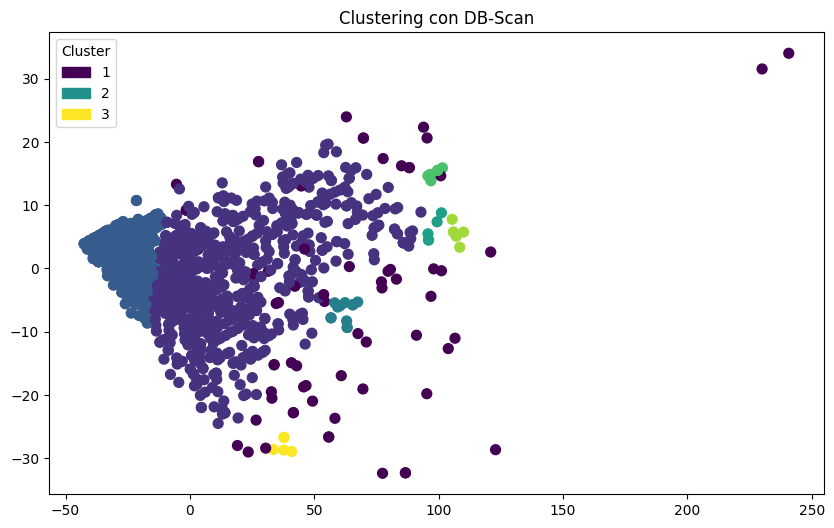

eps=5.000000
min=6.000000
Estimated number of clusters: 5
Estimated number of noise points: 92


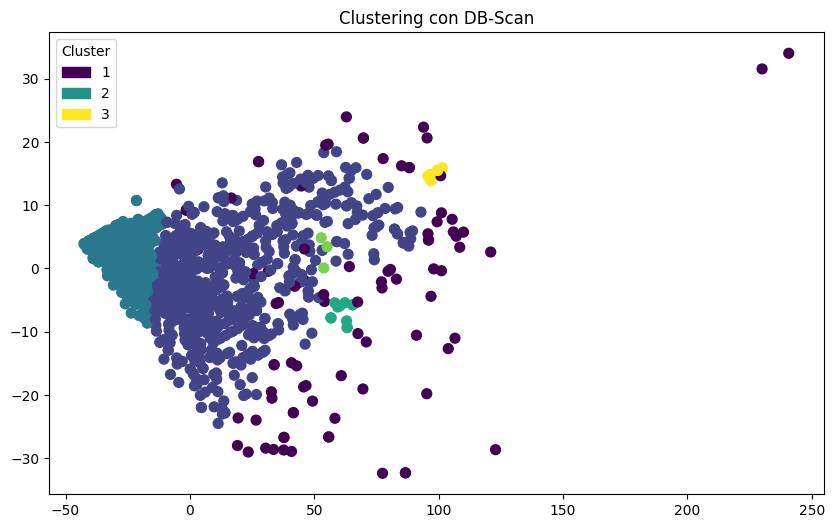

eps=5.000000
min=7.000000
Estimated number of clusters: 5
Estimated number of noise points: 108


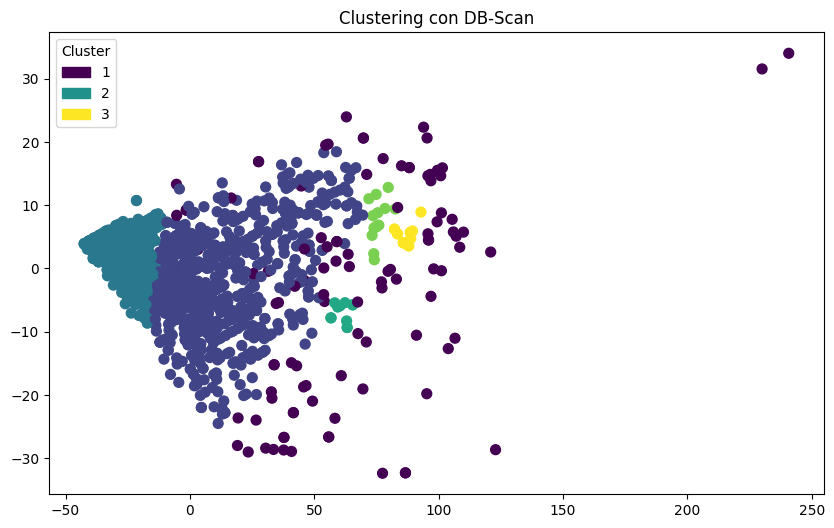

eps=5.000000
min=8.000000
Estimated number of clusters: 6
Estimated number of noise points: 116


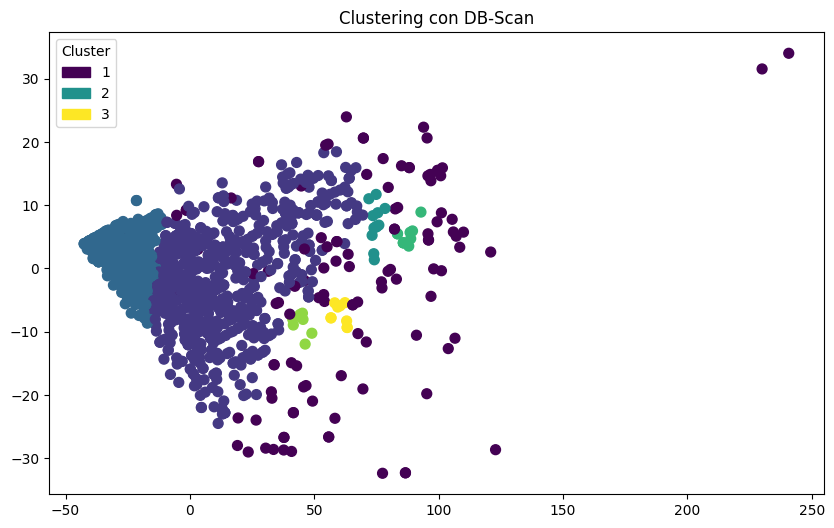

eps=5.000000
min=9.000000
Estimated number of clusters: 5
Estimated number of noise points: 133


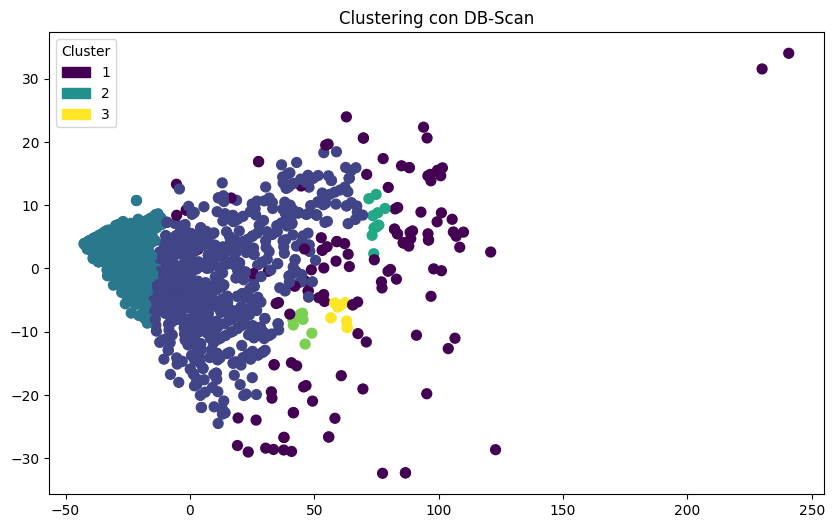

eps=5.000000
min=10.000000
Estimated number of clusters: 3
Estimated number of noise points: 157


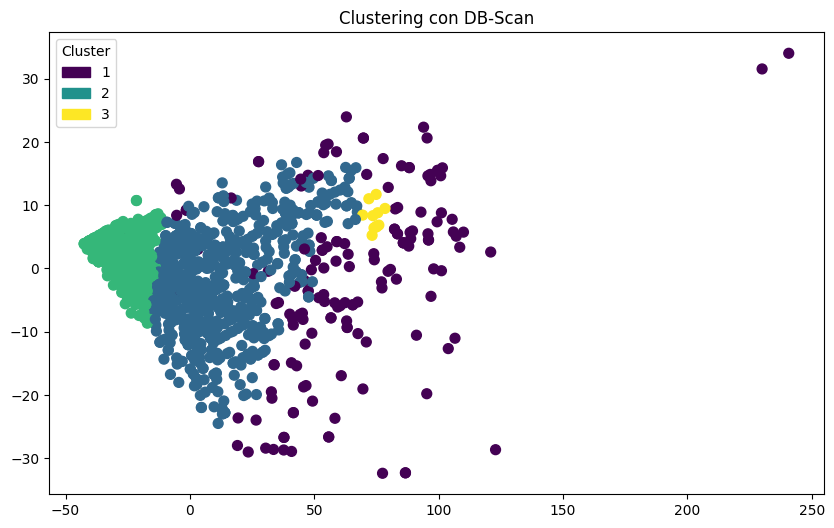

eps=5.500000
min=5.000000
Estimated number of clusters: 6
Estimated number of noise points: 58


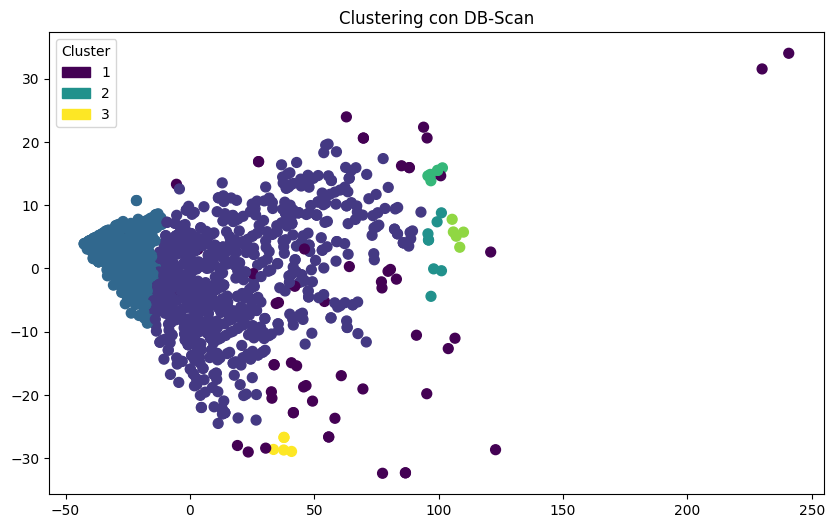

eps=5.500000
min=6.000000
Estimated number of clusters: 4
Estimated number of noise points: 78


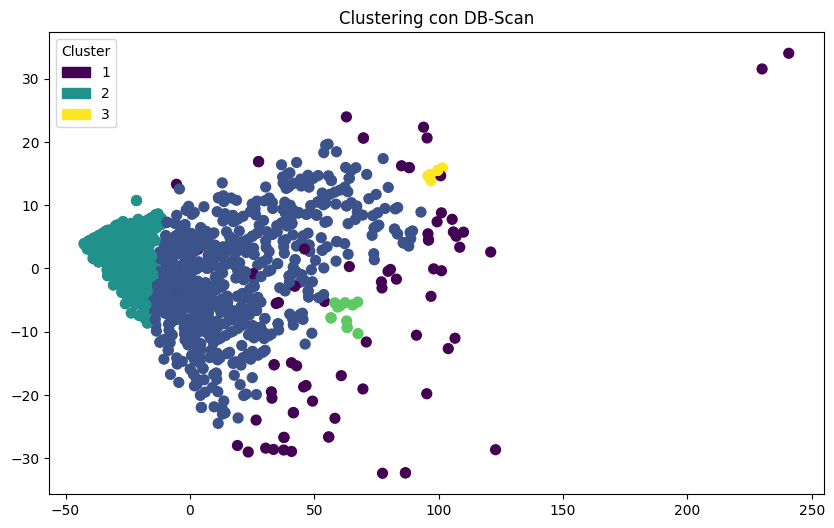

eps=5.500000
min=7.000000
Estimated number of clusters: 3
Estimated number of noise points: 88


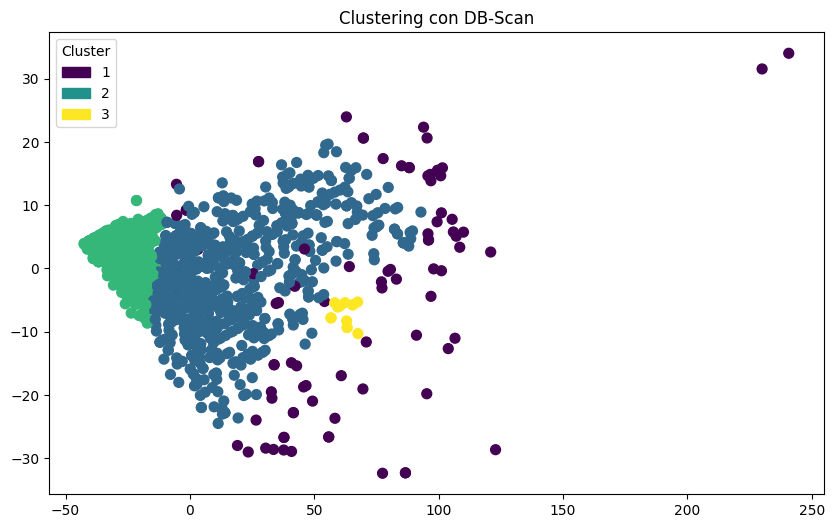

eps=5.500000
min=8.000000
Estimated number of clusters: 3
Estimated number of noise points: 91


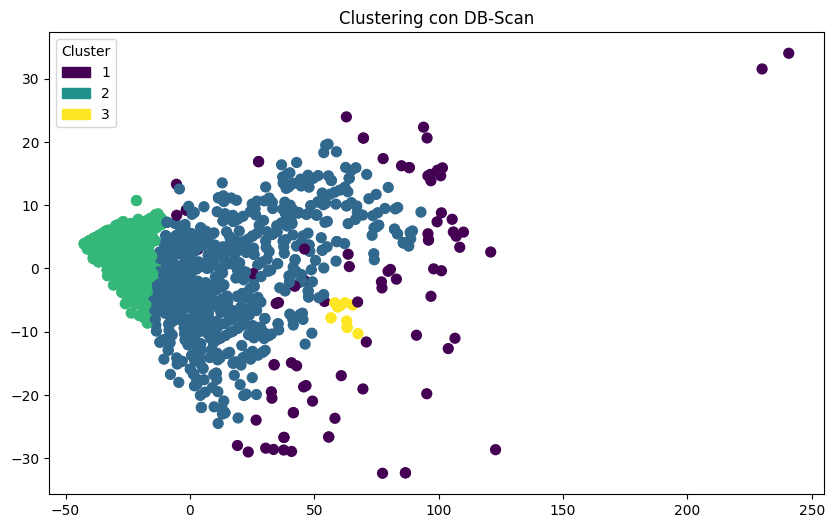

eps=5.500000
min=9.000000
Estimated number of clusters: 3
Estimated number of noise points: 105


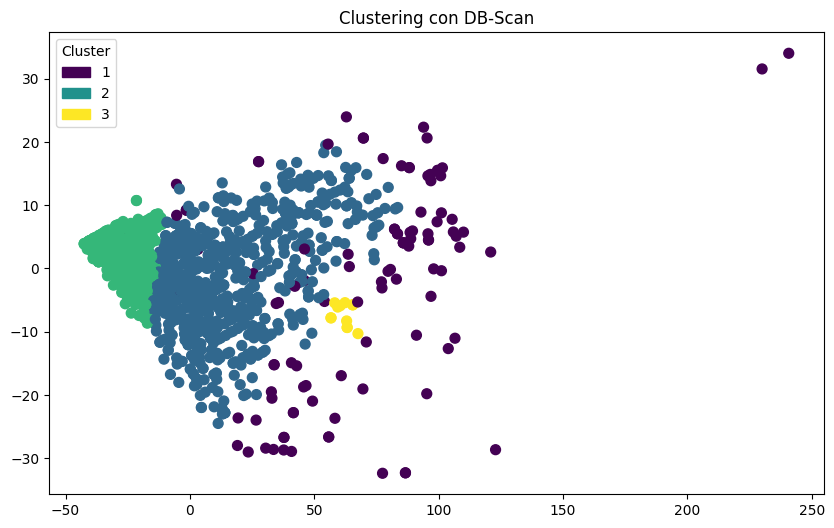

eps=5.500000
min=11.000000
Estimated number of clusters: 3
Estimated number of noise points: 129


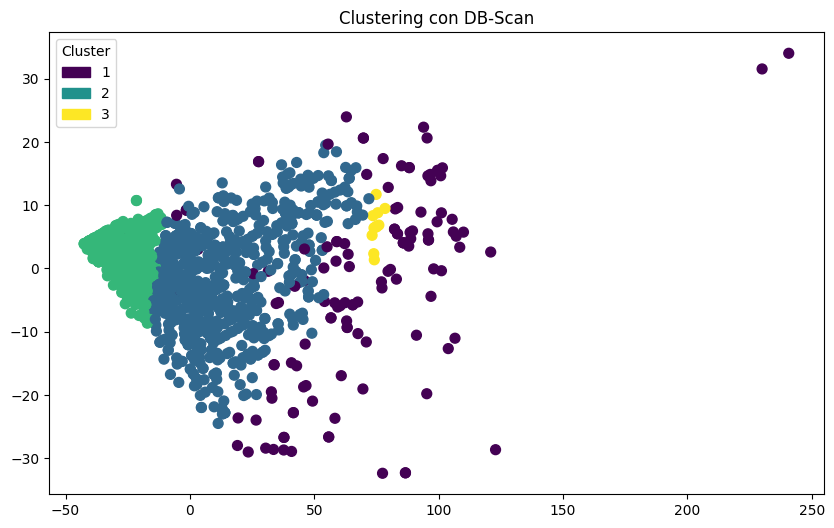

eps=5.500000
min=12.000000
Estimated number of clusters: 3
Estimated number of noise points: 134


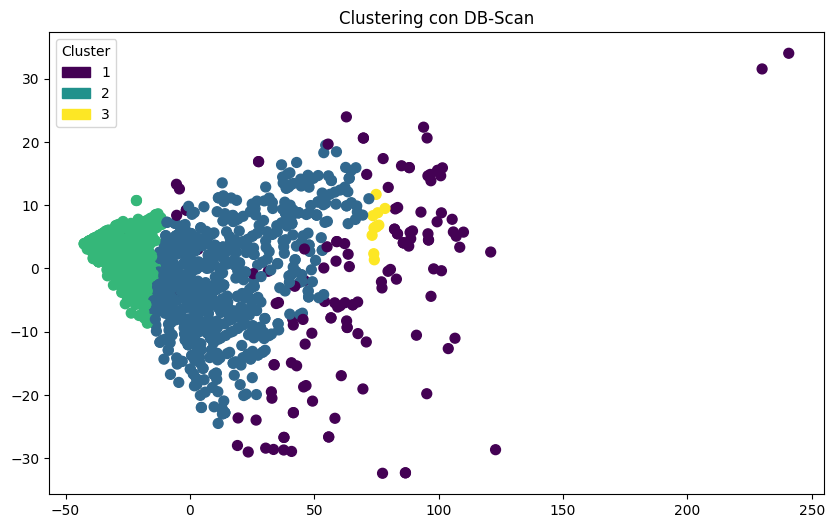

eps=5.500000
min=14.000000
Estimated number of clusters: 3
Estimated number of noise points: 155


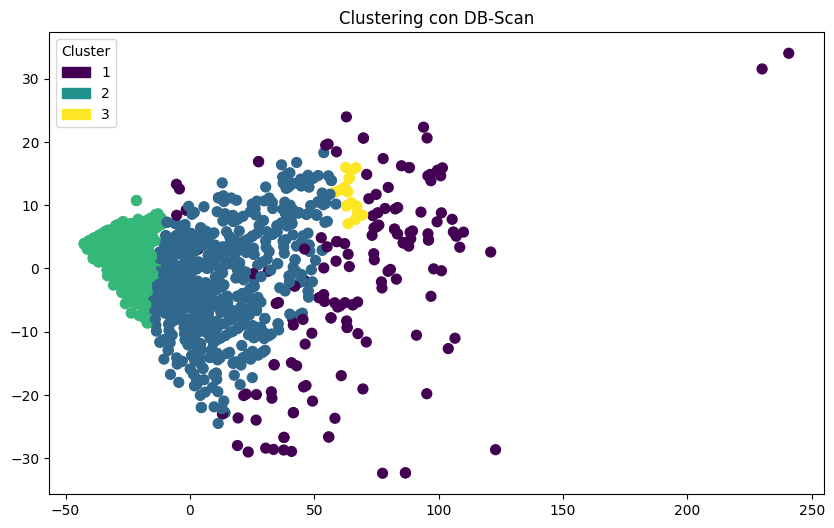

eps=5.500000
min=15.000000
Estimated number of clusters: 3
Estimated number of noise points: 160


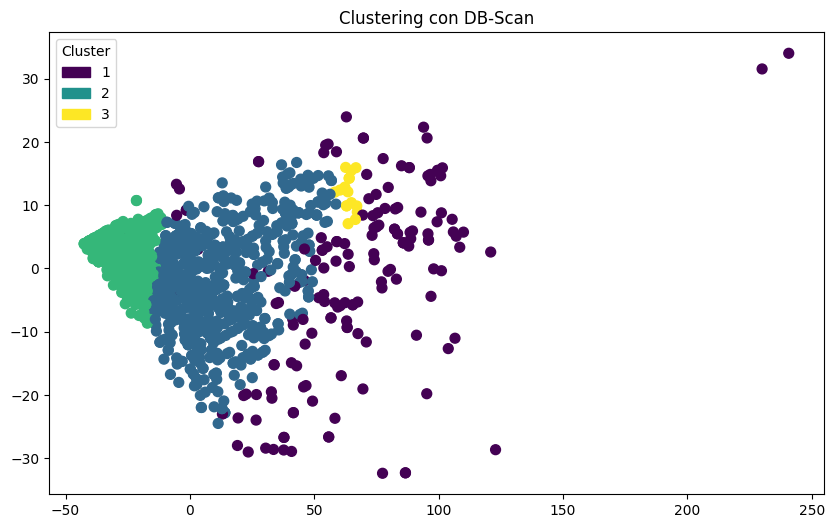

eps=6.000000
min=5.000000
Estimated number of clusters: 5
Estimated number of noise points: 51


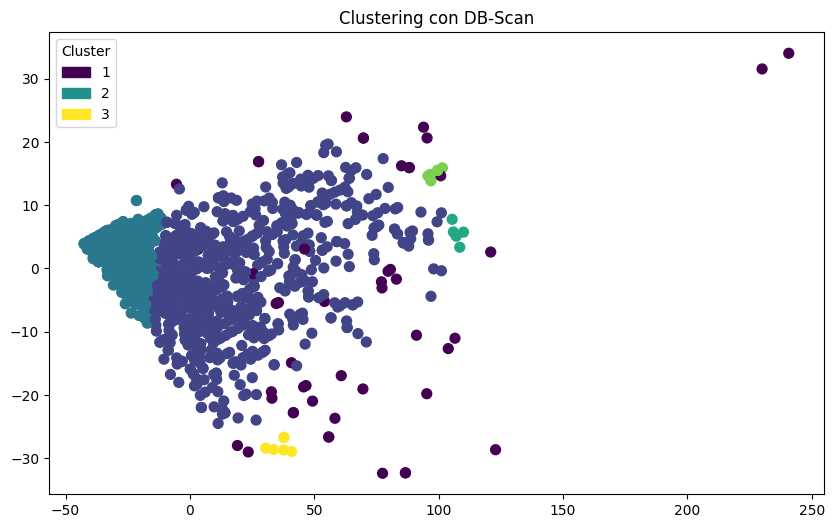

eps=6.000000
min=6.000000
Estimated number of clusters: 4
Estimated number of noise points: 61


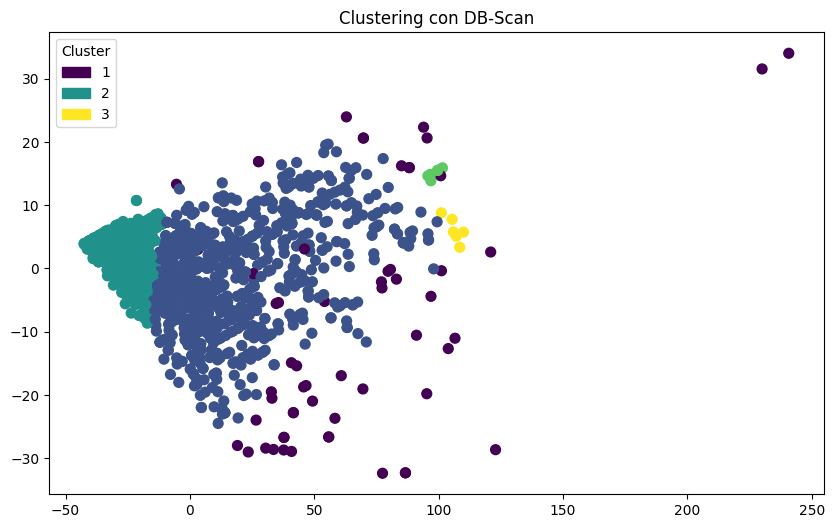

eps=6.000000
min=7.000000
Estimated number of clusters: 3
Estimated number of noise points: 79


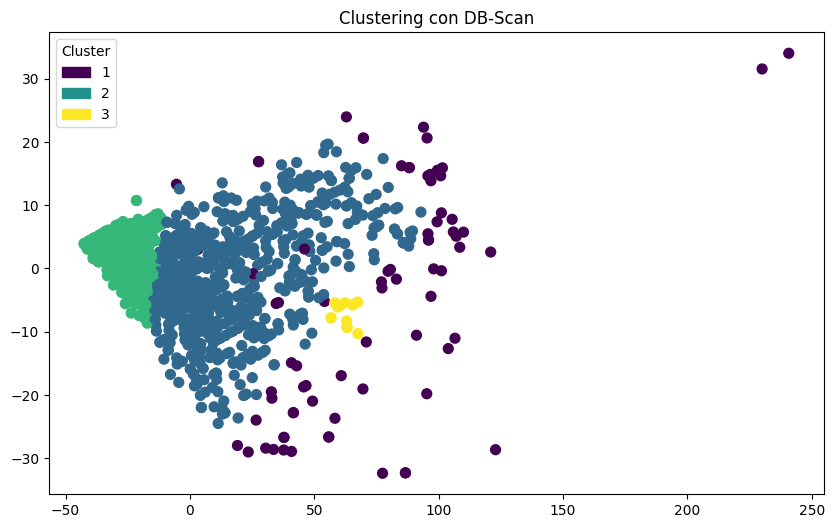

eps=6.000000
min=8.000000
Estimated number of clusters: 3
Estimated number of noise points: 81


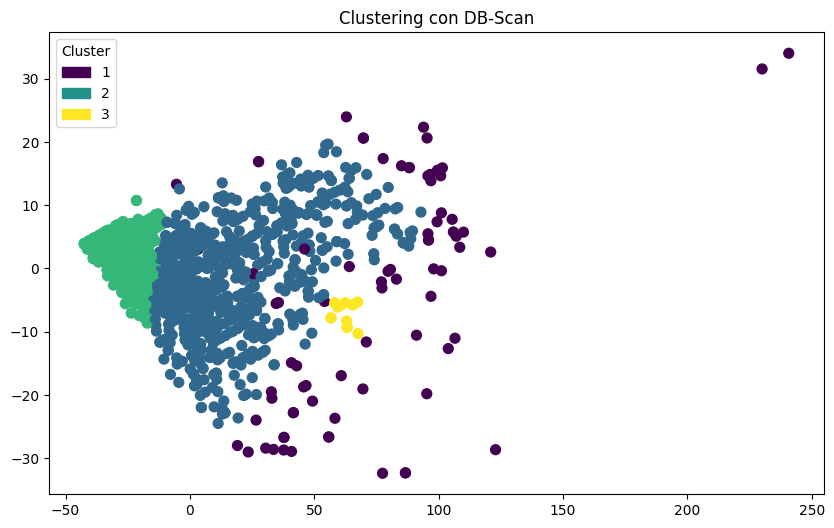

eps=6.000000
min=9.000000
Estimated number of clusters: 4
Estimated number of noise points: 82


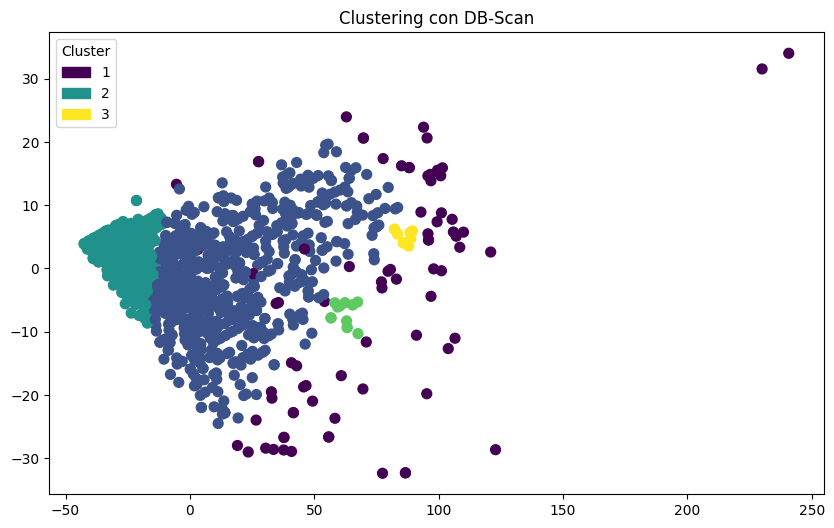

eps=6.000000
min=10.000000
Estimated number of clusters: 4
Estimated number of noise points: 84


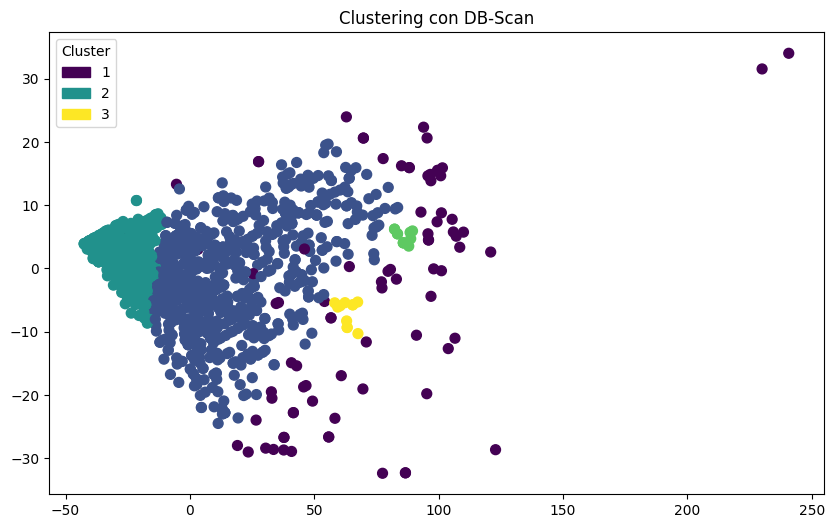

eps=6.000000
min=11.000000
Estimated number of clusters: 3
Estimated number of noise points: 95


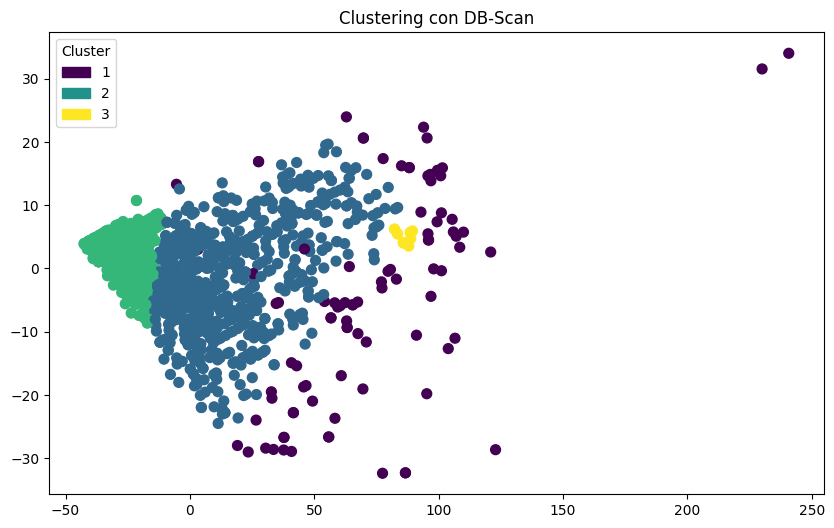

eps=6.000000
min=12.000000
Estimated number of clusters: 3
Estimated number of noise points: 112


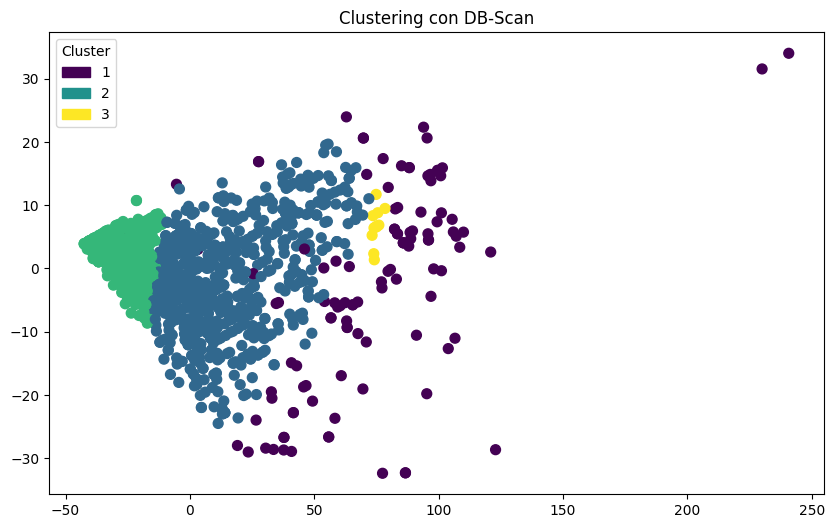

eps=6.000000
min=13.000000
Estimated number of clusters: 3
Estimated number of noise points: 120


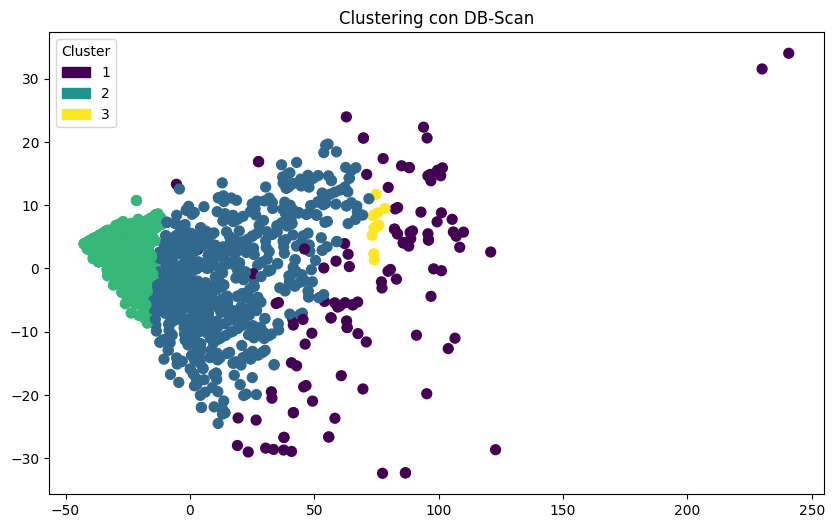

eps=6.500000
min=5.000000
Estimated number of clusters: 3
Estimated number of noise points: 38


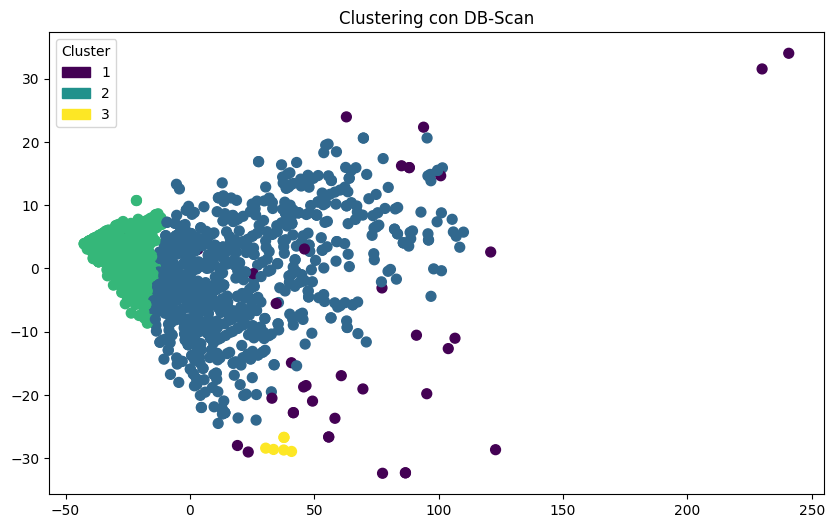

eps=6.500000
min=7.000000
Estimated number of clusters: 3
Estimated number of noise points: 52


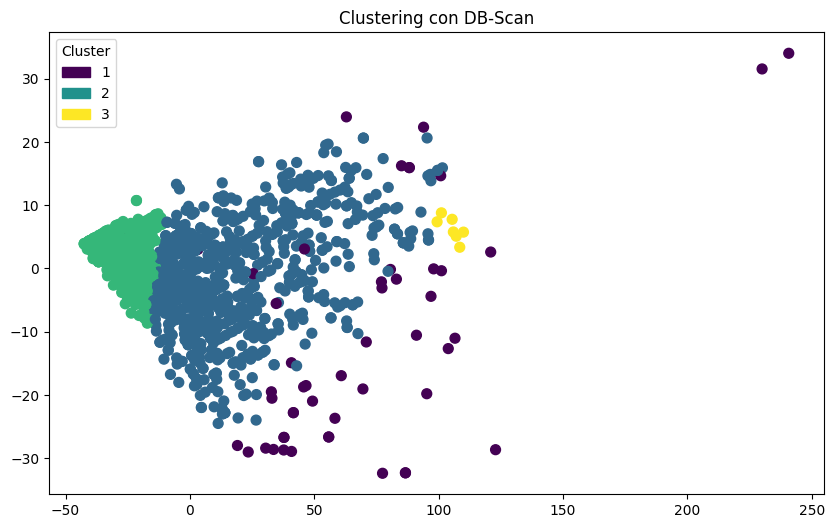

eps=6.500000
min=8.000000
Estimated number of clusters: 3
Estimated number of noise points: 72


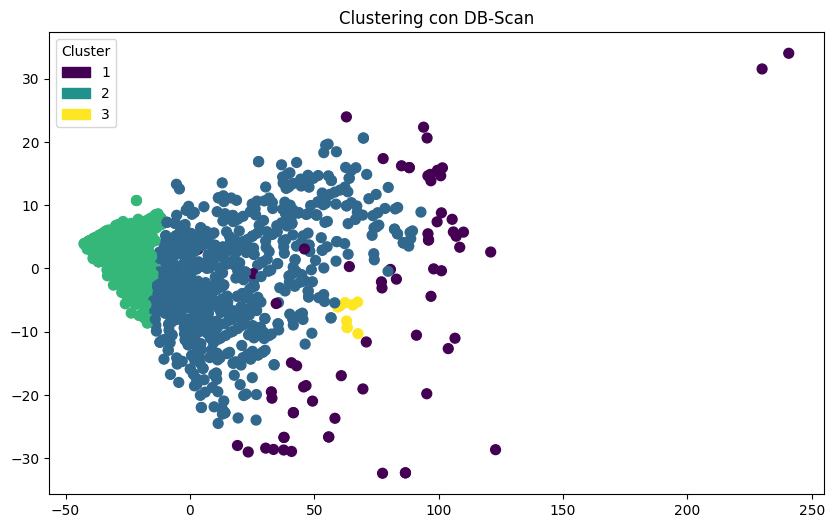

eps=6.500000
min=9.000000
Estimated number of clusters: 3
Estimated number of noise points: 73


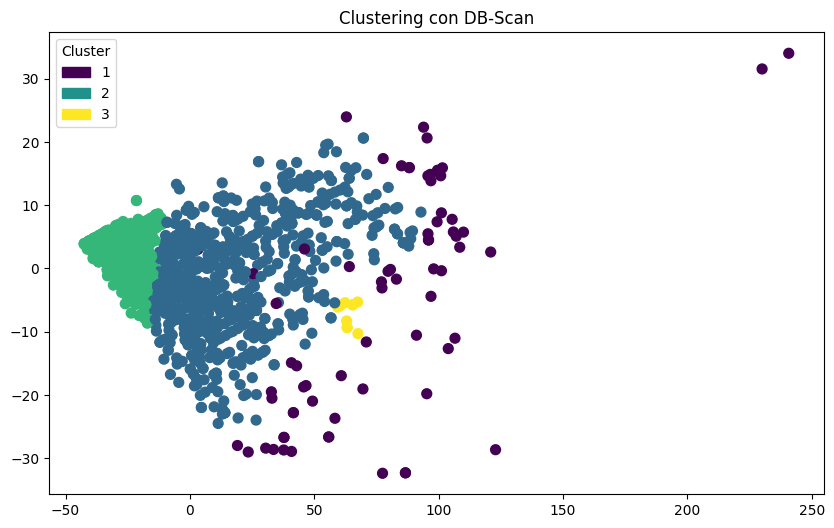

eps=6.500000
min=10.000000
Estimated number of clusters: 3
Estimated number of noise points: 74


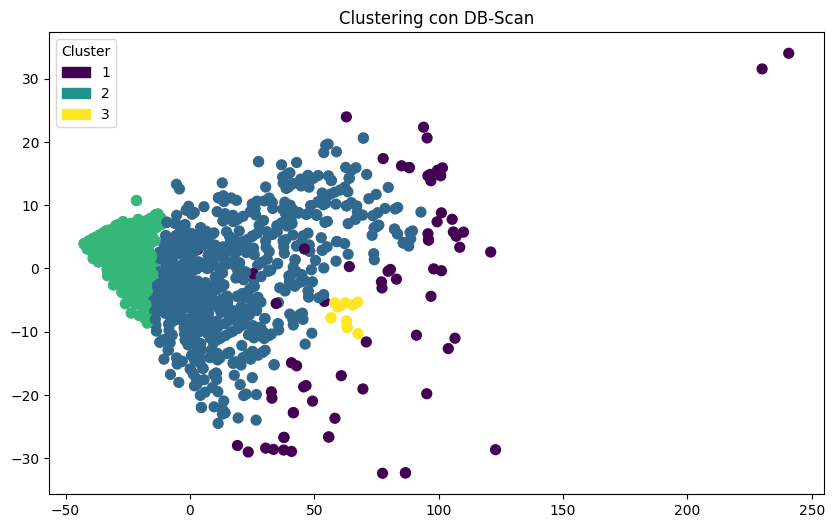

eps=6.500000
min=11.000000
Estimated number of clusters: 3
Estimated number of noise points: 78


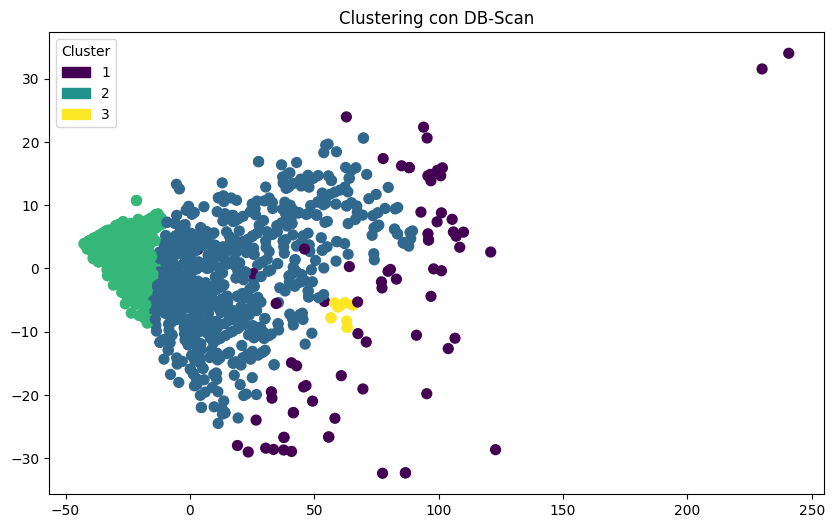

eps=6.500000
min=12.000000
Estimated number of clusters: 3
Estimated number of noise points: 89


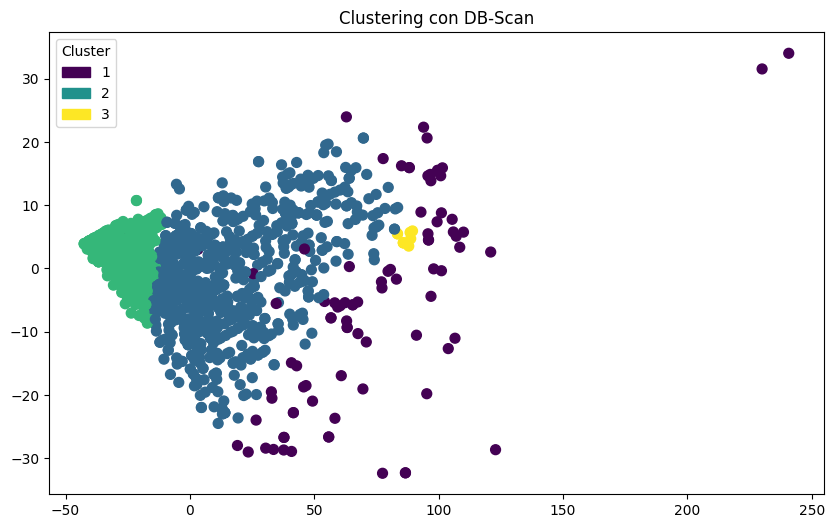

eps=6.500000
min=13.000000
Estimated number of clusters: 3
Estimated number of noise points: 92


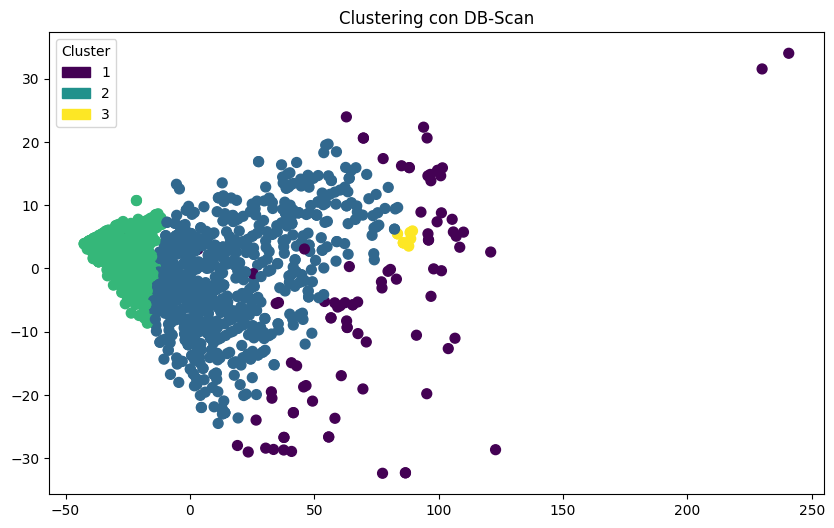

eps=7.000000
min=5.000000
Estimated number of clusters: 3
Estimated number of noise points: 31


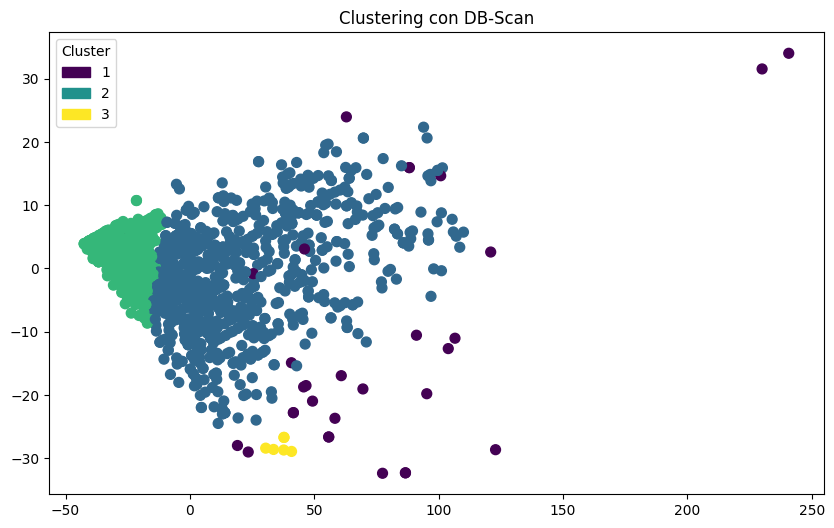

eps=7.000000
min=12.000000
Estimated number of clusters: 3
Estimated number of noise points: 64


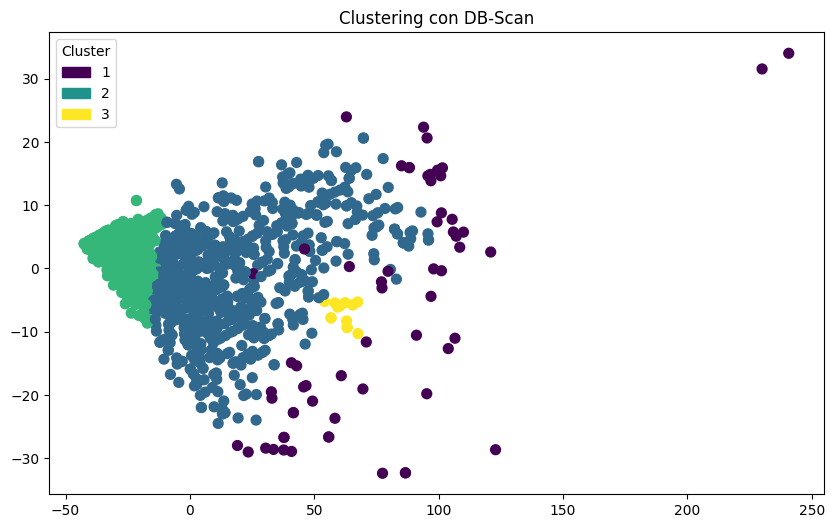

eps=7.000000
min=13.000000
Estimated number of clusters: 4
Estimated number of noise points: 66


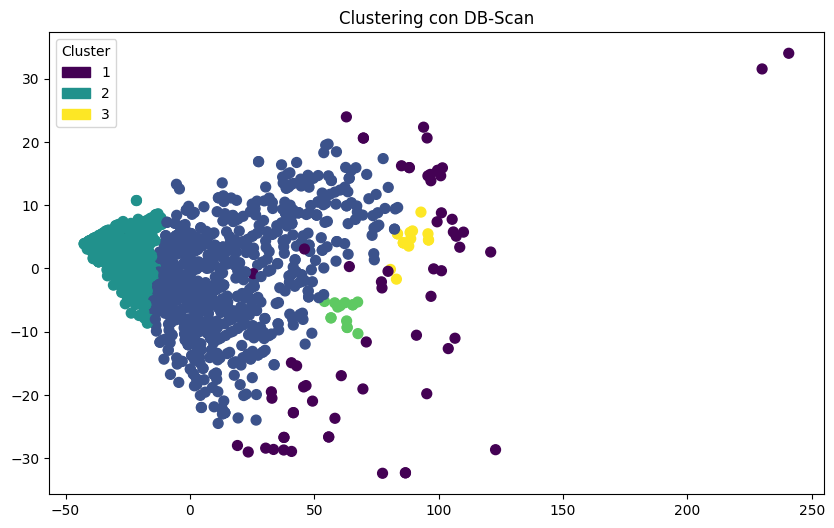

eps=7.000000
min=14.000000
Estimated number of clusters: 3
Estimated number of noise points: 86


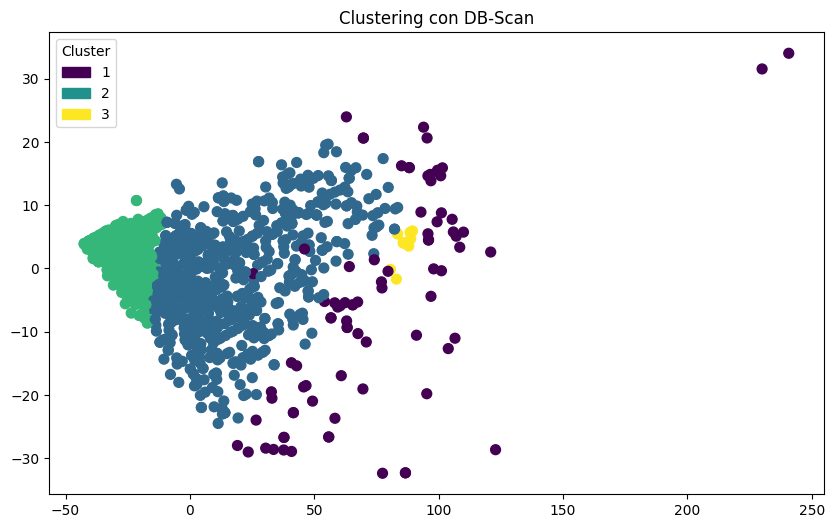

eps=7.000000
min=15.000000
Estimated number of clusters: 3
Estimated number of noise points: 88


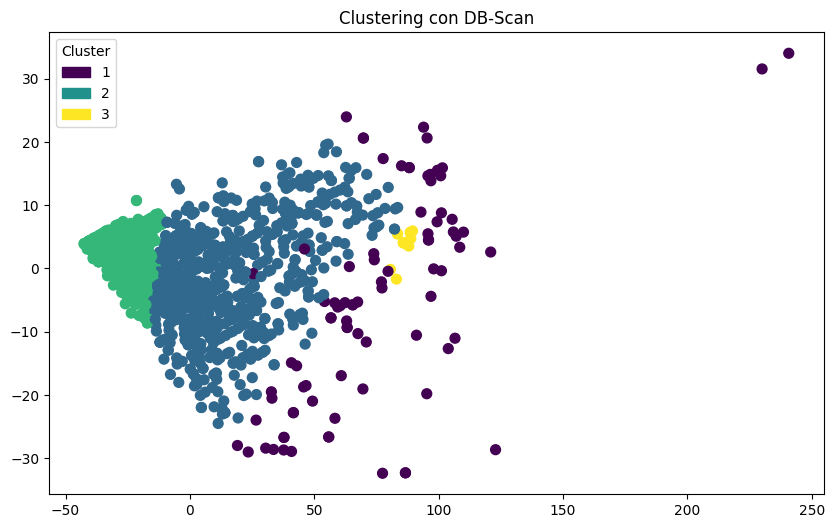

eps=7.000000
min=21.000000
Estimated number of clusters: 3
Estimated number of noise points: 127


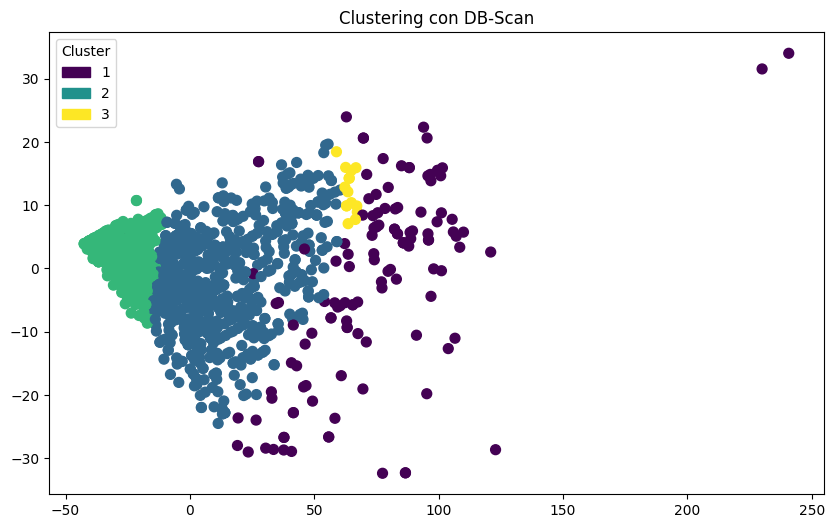

eps=7.500000
min=5.000000
Estimated number of clusters: 3
Estimated number of noise points: 27


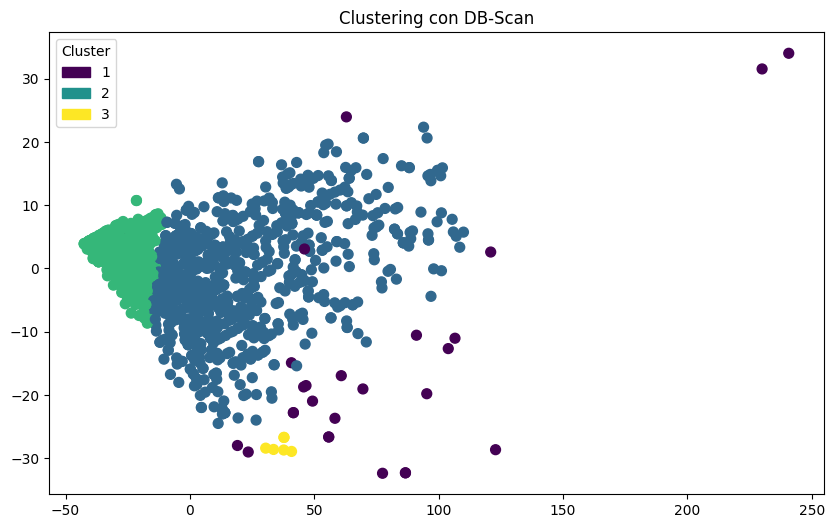

eps=7.500000
min=11.000000
Estimated number of clusters: 3
Estimated number of noise points: 47


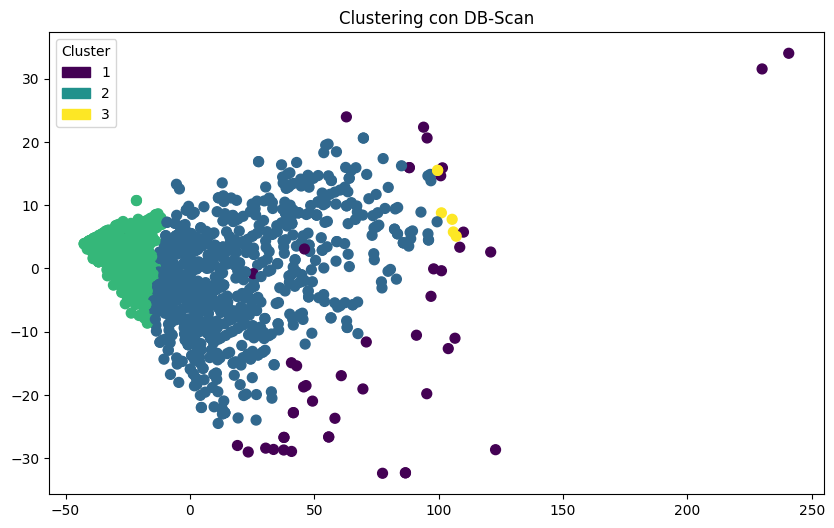

eps=8.000000
min=5.000000
Estimated number of clusters: 3
Estimated number of noise points: 26


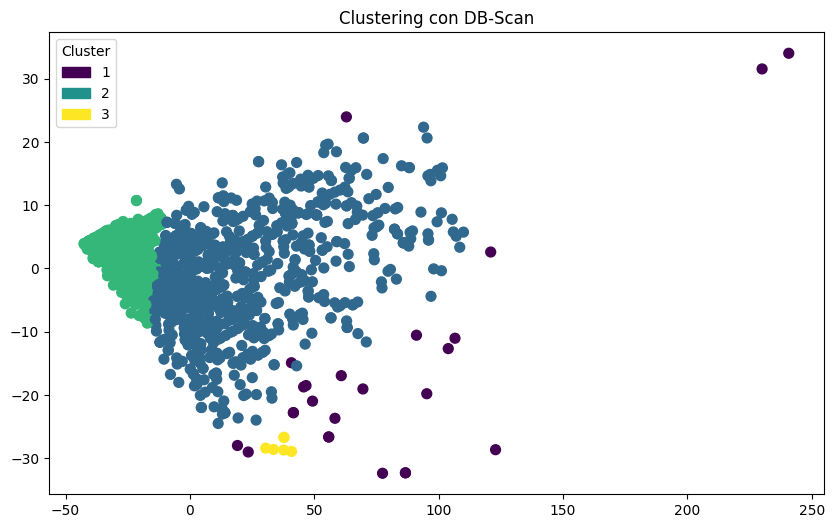

eps=8.000000
min=6.000000
Estimated number of clusters: 3
Estimated number of noise points: 26


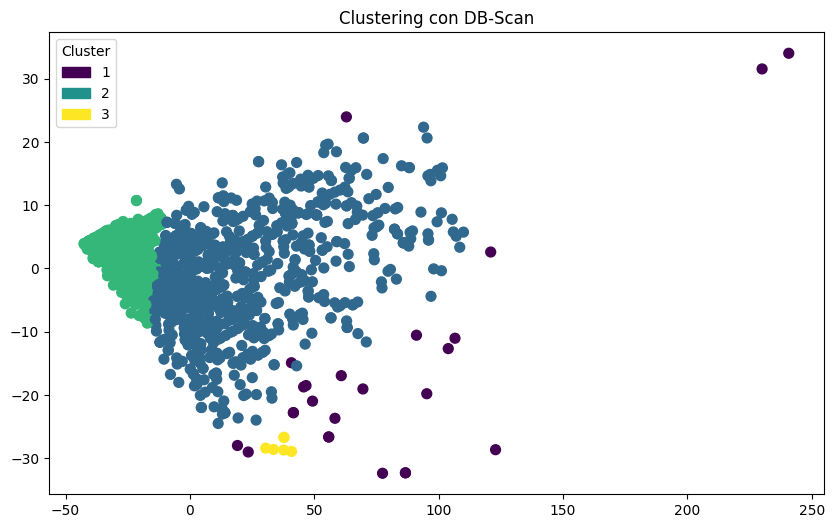

eps=8.000000
min=12.000000
Estimated number of clusters: 3
Estimated number of noise points: 46


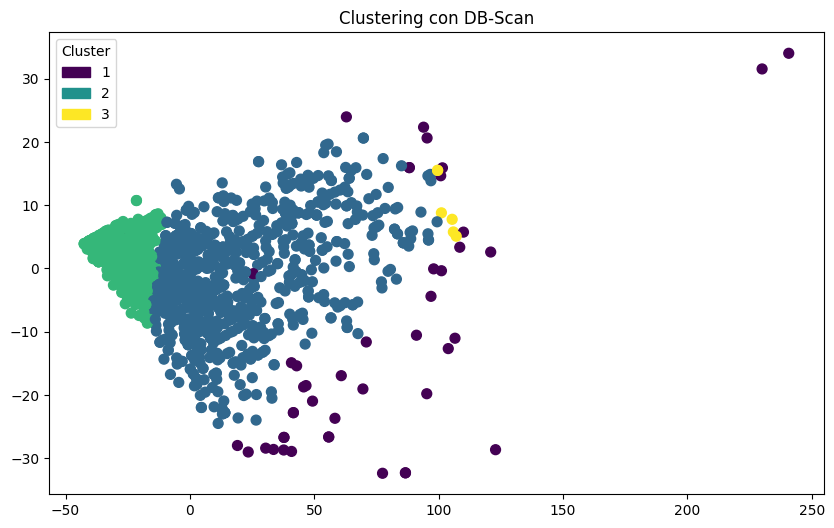

eps=8.000000
min=19.000000
Estimated number of clusters: 3
Estimated number of noise points: 85


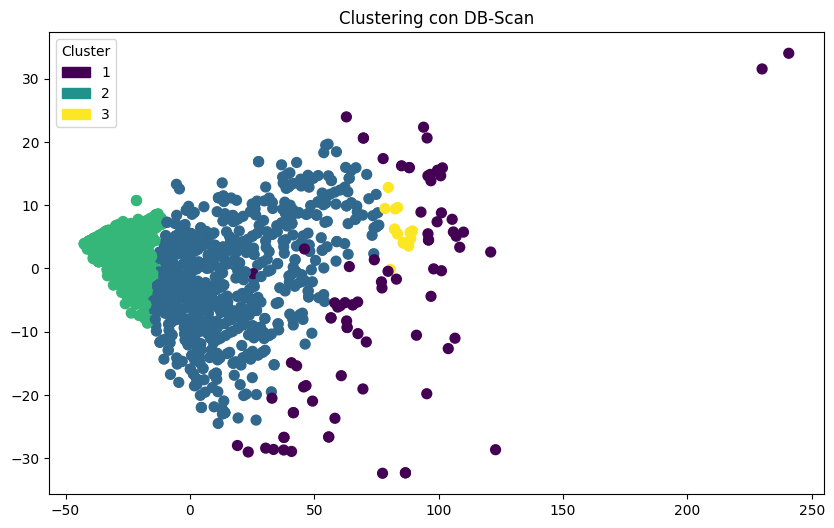

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN

eps_val=np.arange(0.5, 20.5, 0.5)
min_val=np.arange(5,50,1)

for myEps in eps_val:
  for myMin in min_val:
    db = DBSCAN(eps = myEps, min_samples = myMin, algorithm="auto").fit(X)
    labels = db.labels_

    X_with_labels = PCA(n_components=2).fit_transform(X)

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    if (n_clusters_ > 2 and n_clusters_ < 10 and n_noise_ < 161):
      print("eps=%f" % myEps)
      print("min=%f" % myMin)

      print("Estimated number of clusters: %d" % n_clusters_)
      print("Estimated number of noise points: %d" % n_noise_)

      plt.figure(figsize=(10,6))
      scatter = plt.scatter(x=X_with_labels[:, 0], y=X_with_labels[:, 1], c=labels, cmap='viridis', s=50)

      plt.title(f"Clustering con DB-Scan")

      plt.legend(handles=handles, title="Cluster")

      plt.show()


Una buona configurazione dei parametri `eps` e `min_samples` sembrerebbe essere `eps=5` e `min_samples=6`. Con tali valori si ottiene un numero di cluster non troppo dispersivo (ad es. nel nostro caso un numero di cluster > 10 potrebbe essere non significativo per l'analisi della qualità) e permette di non etichettare come noise point un numero eccessivo di sample (in queste esecuzioni si è voluto mantenere un numero massimo di noise point del 10%=160).  
L'esecuzione di DBScan con i valori dei parametri selezionati è:

Estimated number of clusters: 4
Estimated number of noise points: 91


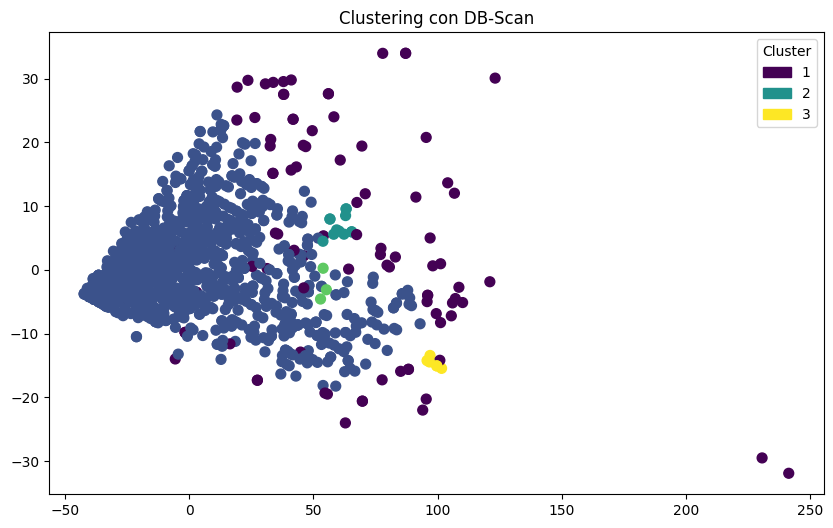

In [ ]:
db = DBSCAN(eps = 5, min_samples = 6, algorithm="auto").fit(X)
labels = db.labels_

X_with_labels = PCA(n_components=2).fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

plt.figure(figsize=(10,6))
scatter = plt.scatter(x=X_with_labels[:, 0], y=X_with_labels[:, 1], c=labels, cmap='viridis', s=50)

plt.title(f"Clustering con DB-Scan")

# Imposta la legenda con i valori interi dei cluster
plt.legend(handles=handles, title="Cluster")

# Rimuovi la barra dei colori predefinita
plt.colorbar().remove()

plt.show()

Dal plot si può notare un cluster dalle dimensioni decisamente maggiori rispetto agli altri, che invece contengono un numero di sample sicuramente più esiguo.  
Un metodo alternativo per valutare il valore di eps è con la regola dei _kth nearest neighbor_.


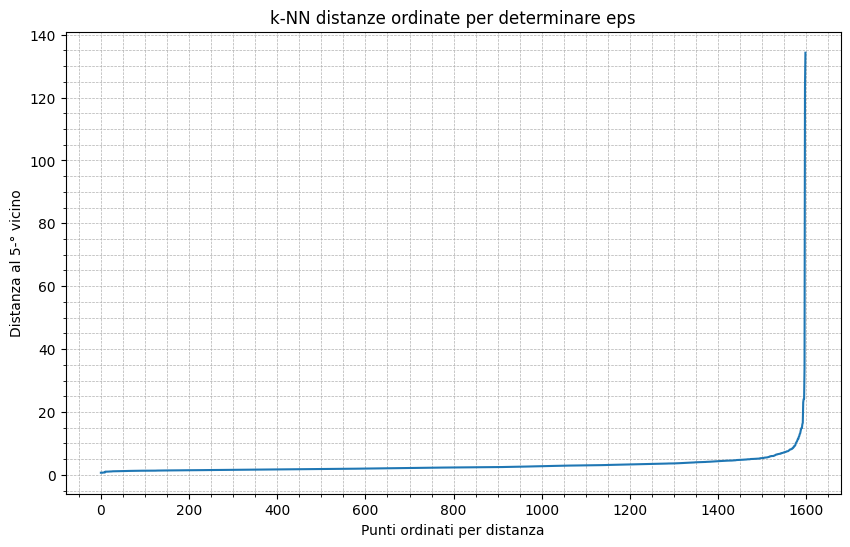

In [ ]:
from sklearn.neighbors import NearestNeighbors
k = 5

# Calcolo dei k-nearest neighbors
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordinamento delle distanze del k-esimo vicino
distances = np.sort(distances[:, k-1], axis=0)

# Grafico delle distanze ordinate
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-NN distanze ordinate per determinare eps')
plt.xlabel('Punti ordinati per distanza')
plt.ylabel('Distanza al {}-° vicino'.format(k))
plt.grid(True)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

Un valore adatto per eps secondo il plot è compreso tra 4 e 7, prima che inizi ad aumentrare notevolmente la pendenza della curva. Tale intervallo è in linea con il valore adottato nelle esecuzioni precedenti.  
Si noti, però, che DBScan non è l'algoritmo di clustering migliore con una distribuzione dei datapoint come la nostra. Infatti, nonostante le feature siano state ridotte a 2 significative, la densità dei punti varia notevolmente.

##Hierchical clustering

Il clustering gerarchico comprende metodi di raggruppamento dei dati mediante una gerarchia, in cui ogni cluster è ottenuto dalla fusione di 2 o più cluster più piccoli.  
Di seguito engono mostrate 3 implementazioni, che si riferiscono a 3 differenti metriche impiegate per valutare le distanze tra i cluster $u$ e i punti $v$:


*   `complete` = $d(u,v)=max(d(u[i],v[j]))$
*   `average` = $d(u,v)=\sum\limits_{i,j}\frac{d(u[i],v[j])}{|u|\cdot |v|}$
*   `single` = $d(u,v)=min(d(u[i],v[j])$



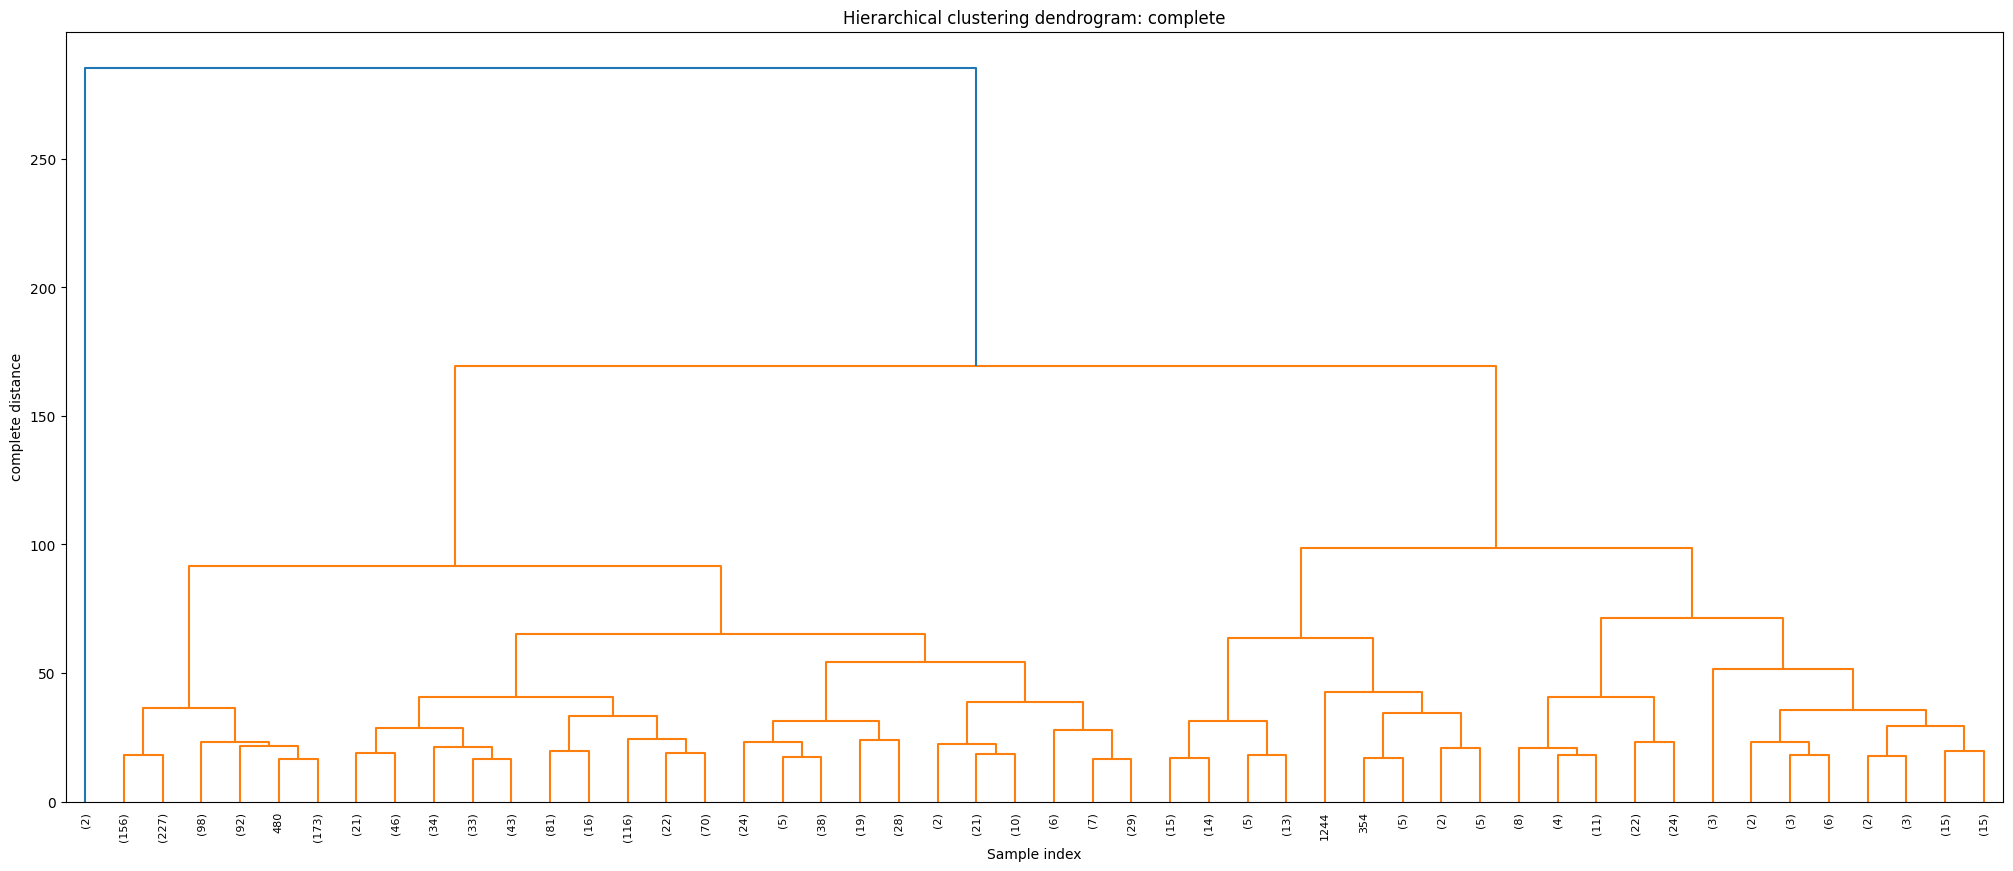

Silhouette Score for complete linkage: 0.509


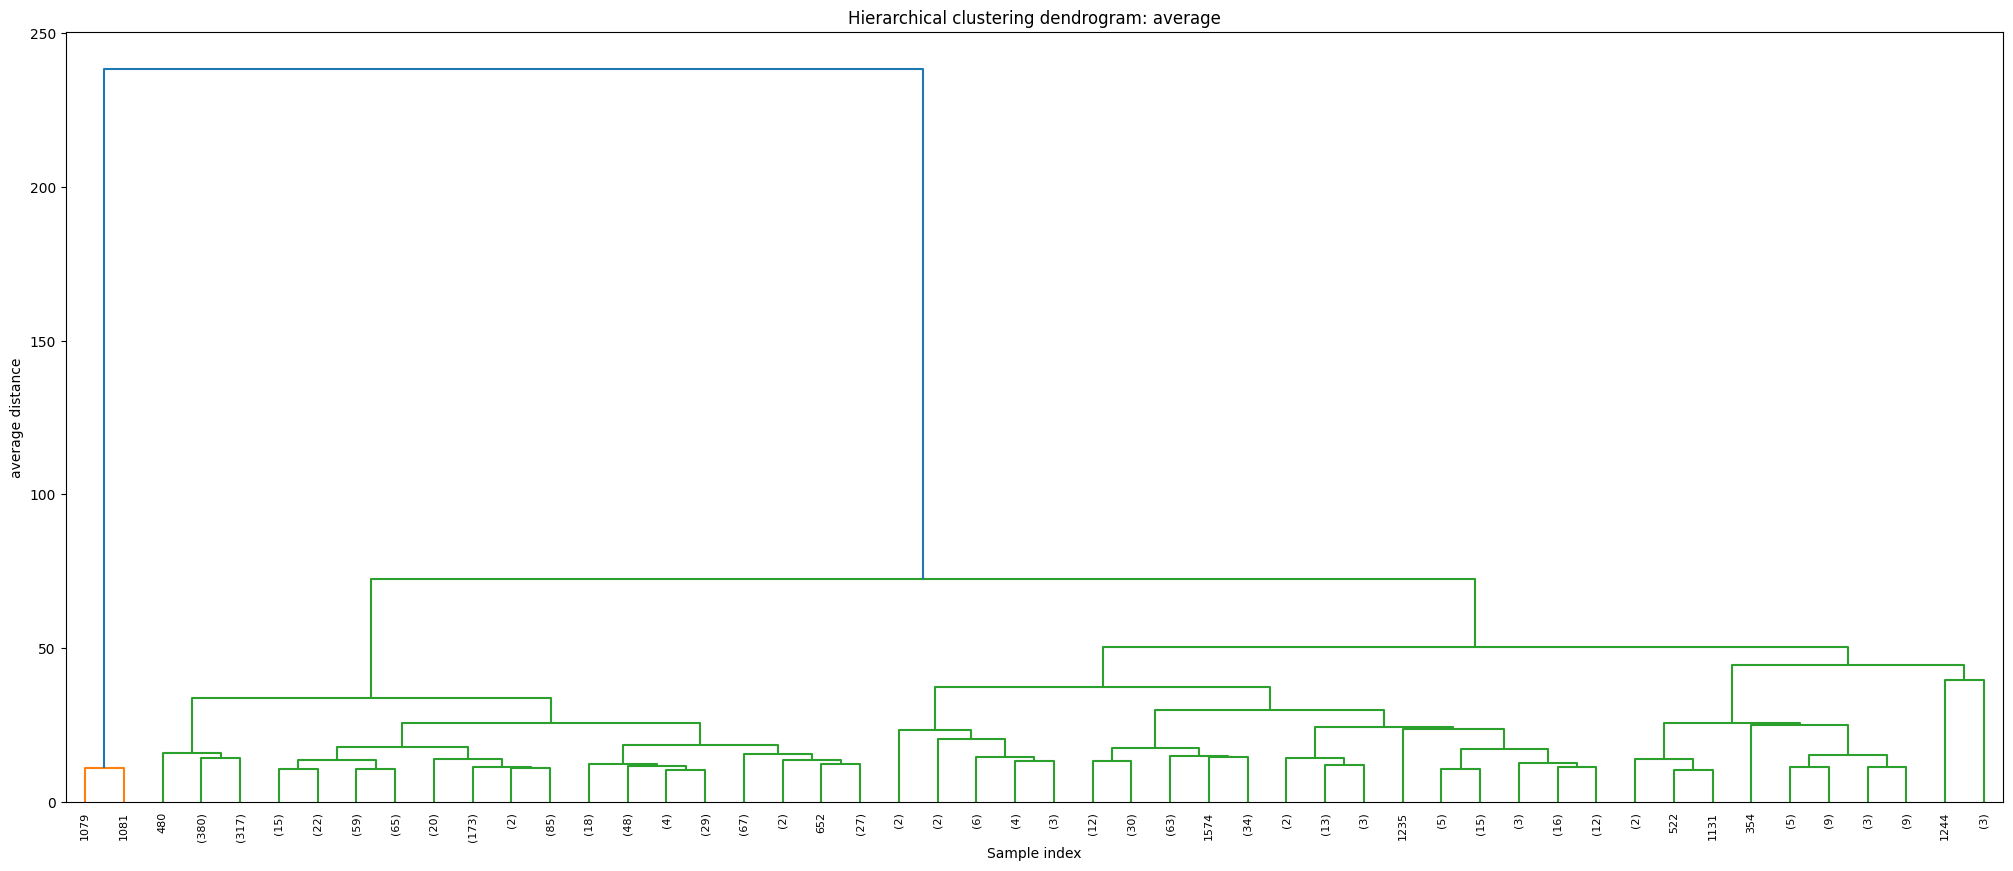

Silhouette Score for average linkage: 0.561


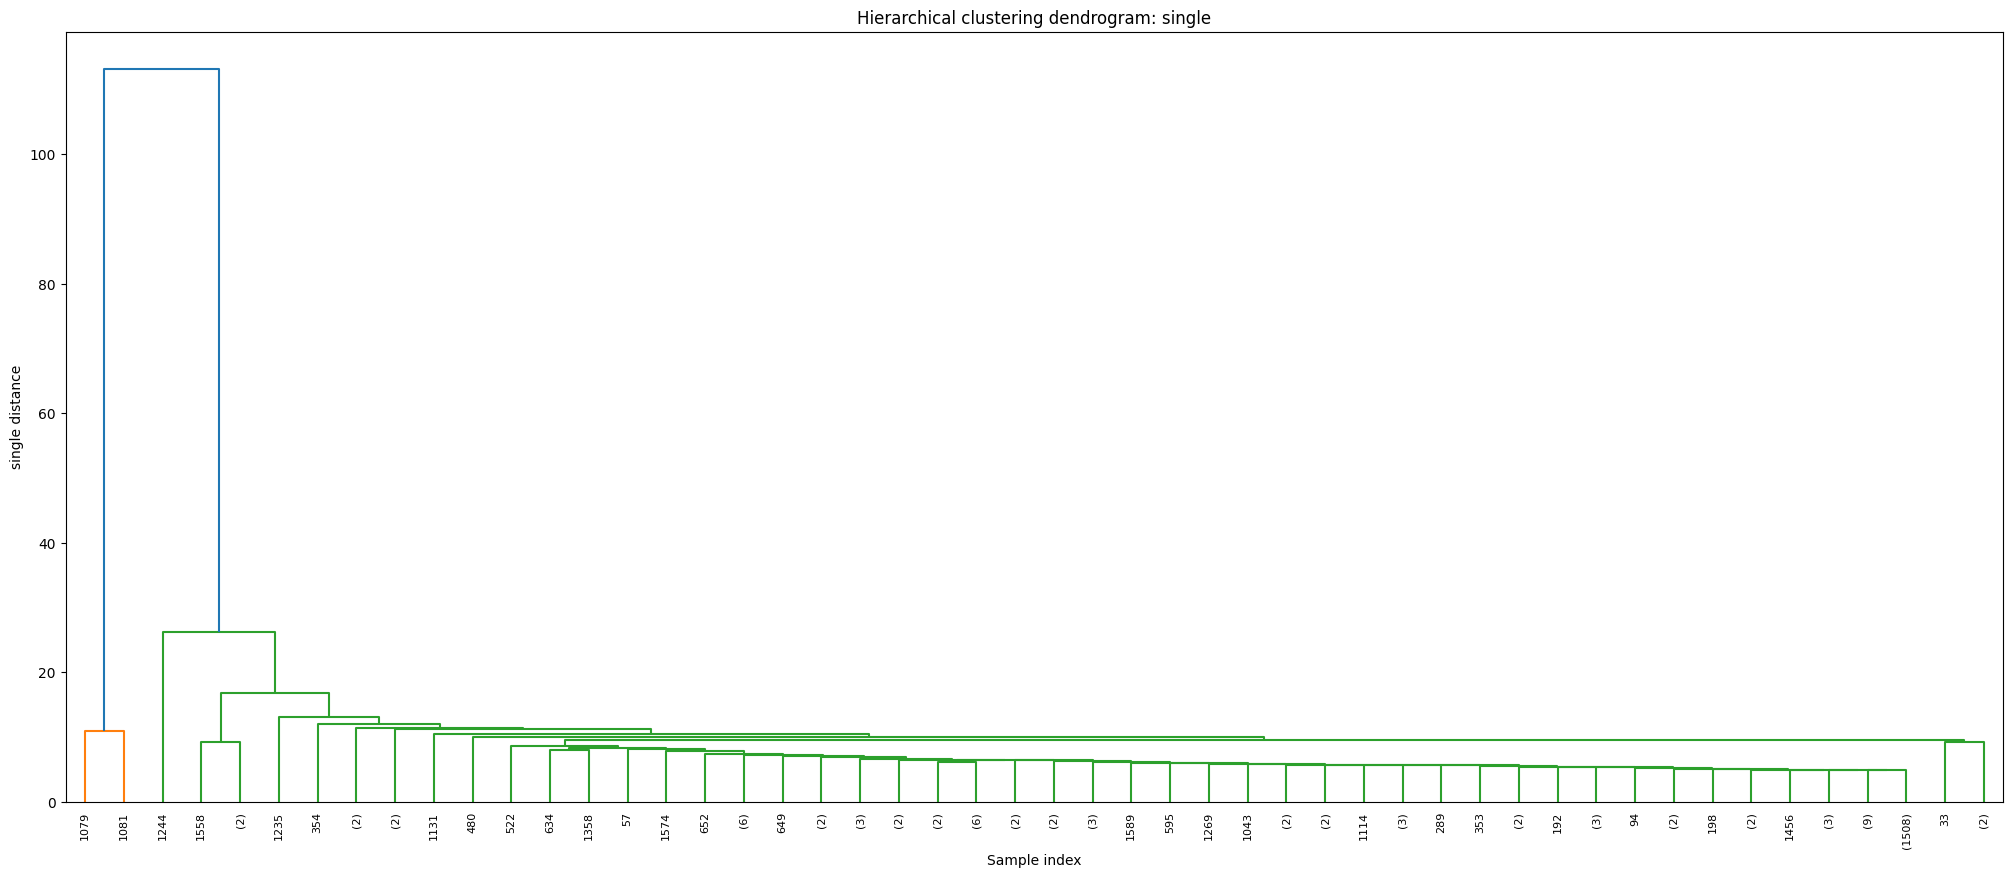

Silhouette Score for single linkage: 0.537


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

tree_levels_to_display = 50
distances=["complete", "average", "single"]

for distance in distances:
  hc = linkage(X, method=distance, metric="euclidean")
  plt.figure(figsize=(25, 10))
  plt.title('Hierarchical clustering dendrogram: ' + distance)
  plt.xlabel('Sample index')
  plt.ylabel(distance +' distance')
  dendrogram(
      hc,
      leaf_font_size=8,
       truncate_mode='lastp',
        p=tree_levels_to_display # depth level
  )
  plt.show()
  cluster_labels = fcluster(hc, t=4, criterion='maxclust')

  # Calcolare il Silhouette Score
  score = silhouette_score(X, cluster_labels)
  print(f"Silhouette Score for {distance} linkage: {score:.3f}")


Secondo i plot ottenuti, il metodo più adatto sembrerebbe essere `method=average`, che ottiene un silhouette score maggiore. Inoltre, conduce a una classificazione in cui il numero di elementi contenuto nei cluster è più ragionevole. Si noti, infatti, la presenza di un cluster con soli 2 elementi nel metodo `complete` e una divisione in tanti cluster allo stesso livello con il metodo `single`.

Si procede, di seguito, con la rappresentazione in forma di heatmap dei cluster individuati con il metodo `average`.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

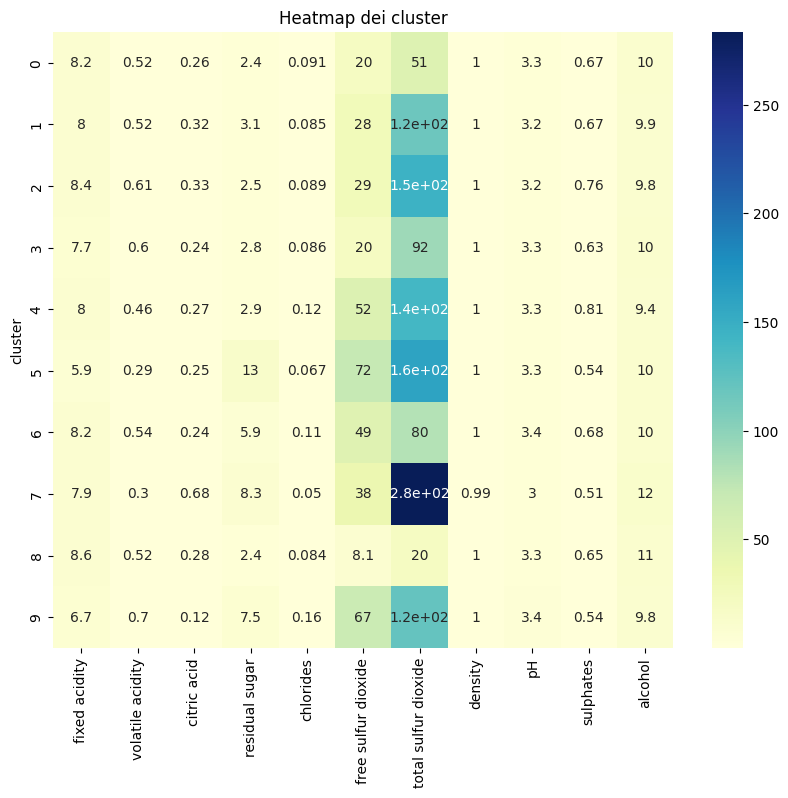

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, ward, linkage

num_cluster = 10

# Creazione del modello di clustering gerarchico agglomerativo e fit
model = AgglomerativeClustering(n_clusters=num_cluster, affinity='euclidean', linkage='average')
model.fit(X)

# Assegnazione dei cluster ai dati originali
X['cluster'] = model.labels_

print(df.head(10))

# Visualizzazione dei cluster tramite heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.groupby('cluster').mean(), annot=True, cmap='YlGnBu')
plt.title('Heatmap dei cluster')
plt.show()

Osservando i dendrogrammi computati, i cluster non sembrano essere distinguibili in maniera troppo evidente. La divisione in tanti cluster a uno stesso livello potrebbe essere indice di troppe variabili per il dataset, non permettendo al clustering gerarchico di essere una tecnica troppo efficace in questo csao specifico.  

Possiamo anche confrontare il comportamento degli algoritmi di clustering k-means e gerarchico, mediante una matrice di confusione.

In [ ]:
from scipy.cluster.hierarchy import cut_tree

cluster_number=4
hierarchical_avg = linkage(y = X, method="average", metric='euclidean')
hierarchical_avg_4 = cut_tree(hierarchical_avg, n_clusters =cluster_number)

pd.crosstab(index = X.index,
            columns = hierarchical_avg_4.T[0],
            rownames = [''],
            colnames = ['Cluster'])

kmean_4 = KMeans(n_clusters = cluster_number, init = 'k-means++', random_state = 42)
kmean_4.fit(X)
kmean_4.labels_

pd.crosstab(index = kmean_4.labels_,
            columns = hierarchical_avg_4.T[0],
            rownames = ['K-Means'],
            colnames = ['Hierarchical'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hierarchical    0    1   2  3
K-Means                      
0             705    0   0  0
1             103  166   0  0
2             527    1   0  0
3               0   60  35  2

La matrice risultante ha:


*   sulle righe i 4 cluster di K-means
*   sulle colonne i 4 cluster di clustering gerarchico
*   nelle celle il numero di record assegnati a quei cluster

Valori alti sulla diagonale rappresentano un comportamento simile tra i due algoritmi, dato che significherebbe che sia K-Means che hierarchical clustering hanno assegnato tanti record allo stesso cluster.  
Dalla matrice si può osservare come il cluster 0 abbia il valore più alto, potendo affermare che la classificazione è stata concorde.



# Confronto con codice promettente

Nel seguente capitolo abbiamo analizzato il codice che si può trovare al seguente link: https://github.com/aniruddhachoudhury/Red-Wine-Quality/blob/master/Wine%20ML%20model.ipynb, dove si affronta il problema della classificazione binaria.

L'autore ha svolto diverse grid search per diversi modelli, noi riporteremo solo i modelli con gli iperparametri già ottimizzati

Nel lavoro in analisi i dati sono stati manipolati in maniera differente rispetto quanto fatto da noi, portando a risultati migliori per ogni modello.
Di seguito abbiamo provato a replicare quanto fatto dall'autore del codice, confrontatndo i risultati da lui trovati con quelli degli stessi modelli allenati con i nostri dati, e con i nostri modelli.



**Manipolazione dei dati**  
La differenza principale tra i due lavori sta della definizione dell'etichetta riguardante la **qualità**: nel codice analizzato la divisione tra buona qualità (1) e cattiva qualità (0) è molto più sbilanciata verso la seconda rispetto al nostro lavoro. Infatti, se noi abbiamo scelto di considerare buono un vino con una qualità maggiore o superiore a 6, nel codice che stiamo confrontando un vino è considerato buono solo se ha una votazione maggiore o uguale a 6.5 (di fatto solo 7 o 8).

Questo porta ad ottenere risultati nettamente superiori ai nostri in termini di accuracy di test, anche se non totalmente paragonabili perchè basati su assunzioni differenti.

In [ ]:
y_git = df['quality'].apply(lambda y_value: 1 if y_value >= 6.5 else 0)

y_git.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
y_bin.value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import train_test_split

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.20, random_state=RS)

X_train_git, X_test_git, y_train_git, y_test_git = train_test_split(X, y_git, test_size = 0.20, random_state=RS)

scaler = StandardScaler()

X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

X_train_git = scaler.fit_transform(X_train_git)
X_test_git = scaler.transform(X_test_git)

Un passaggio non effettuato da noi è l'**analisi dei componenti principali** (PCA): il codice seguente esegue una PCA sul set di training per ridurlo a 4 dimensioni, trasforma i dati di test utilizzando la stessa riduzione e poi stampa la varianza spiegata da ciascuna delle 4 nuove componenti principali (ossia la misura della quantità di varianza totale nel dataset originale che viene catturata o spiegata da ciascuna componente principale dopo la trasformazione).

Noi effettiamo PCA prima del clustering, al fine di poter rappresentare i datapoint su un plot bidimensionale.


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train_git = pca.fit_transform(X_train_git)
X_test_git = pca.transform(X_test_git)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.280177
1  0.175640
2  0.139576
3  0.110818


In [ ]:
X_train_git

array([[ 0.26160217,  1.16823653,  0.35269731, -0.59553861],
       [-1.39055136,  1.20859955,  4.84004205, -0.3958088 ],
       [ 1.96812177, -1.22814975, -0.79754341,  0.49100698],
       ...,
       [-1.43457586,  1.46009549, -0.66166311, -0.27479794],
       [-0.19272488, -2.68831466,  1.51572001,  0.06011536],
       [-2.45387629, -3.53213273,  1.91135477, -0.14509207]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score

**Logistic Regression**  
La regressione logistica è un modello di classificazione che utilizza una funzione logistica per modellare la probabilità che una determinata istanza appartenga a una delle due classi.



**penalty = 'l2'**: indica che viene utilizzata la regolarizzazione L2, nota anche come regolarizzazione di Ridge. Questa tecnica aggiunge un termine di penalità proporzionale al quadrato dei coefficienti del modello, aiutando a prevenire l'overfitting dei dati.

In [ ]:
classifier = LogisticRegression(random_state = RS, penalty = 'l2')


classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)

acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)



                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.846875   0.464286  0.276596  0.346667


In [ ]:
classifier = LogisticRegression(random_state = RS, penalty = 'l2')


classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)

acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression    0.7375   0.781065  0.73743  0.758621


**SVM (Linear)**

In [ ]:
classifier = SVC(random_state = RS, kernel = 'linear')
classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

          Model  Accuracy  Precision  Recall  F1 Score
0  SVM (Linear)  0.853125        0.0     0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier = SVC(random_state = RS, kernel = 'linear')
classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

          Model  Accuracy  Precision    Recall  F1 Score
0  SVM (Linear)  0.728125   0.798701  0.687151  0.738739


**SVM (rbf)**

In [ ]:
classifier = SVC(random_state = RS, kernel = 'rbf')
classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

       Model  Accuracy  Precision    Recall  F1 Score
0  SVM (RBF)   0.85625   0.533333  0.170213  0.258065


In [ ]:
classifier = SVC(random_state = RS, kernel = 'rbf')
classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

       Model  Accuracy  Precision   Recall  F1 Score
0  SVM (RBF)  0.771875   0.811765  0.77095  0.790831


**Randomforest (Entropy)**

In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['Random Forest (Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                     Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Entropy)  0.896875       0.75  0.446809      0.56


In [ ]:
y_pred = classifier.predict(X_train_git)
acc = accuracy_score(y_train_git, y_pred)

results = pd.DataFrame([['Random Forest (Entropy)', acc]],
               columns = ['Model', 'Training Accuracy'])

print(results)

                     Model  Training Accuracy
0  Random Forest (Entropy)                1.0


In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['Random Forest (Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                     Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Entropy)   0.79375   0.822857  0.804469  0.813559


In [ ]:
y_pred = classifier.predict(X_train_bin)
acc = accuracy_score(y_train_bin, y_pred)

results = pd.DataFrame([['Random Forest (Entropy)', acc]],
               columns = ['Model', 'Training Accuracy'])

print(results)

                     Model  Training Accuracy
0  Random Forest (Entropy)                1.0


Questo modello con i nostri dati performa meglio rispetto al nostro modello con i nostri dati perché va in overfitting.  
Abbiamo, quindi, aggiunto il parametro `min_samples_split`, in modo da evitare l'overfitting: così facendo, l'accuracy di training non è più al 100%, pur restando comunque elevata.

In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'entropy', min_samples_split= 20)
classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['Random Forest (Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                     Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Entropy)     0.875       0.64  0.340426  0.444444


In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'entropy', min_samples_split= 20)
classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['Random Forest (Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                     Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Entropy)  0.771875    0.80814  0.776536  0.792023


**Random Forest (Gini)**

In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'gini', bootstrap = True,
                                    max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['Random Forest (Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Gini)  0.896875   0.733333  0.468085  0.571429


In [ ]:
y_pred = classifier.predict(X_train_git)
acc = accuracy_score(y_train_git, y_pred)

results = pd.DataFrame([['Random Forest (Gini)', acc]],
               columns = ['Model', 'Training Accuracy'])

print(results)

                  Model  Training Accuracy
0  Random Forest (Gini)                1.0


In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'gini', bootstrap = True,
                                    max_depth = None, min_samples_leaf = 1, min_samples_split = 2)
classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['Random Forest (Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Gini)  0.796875   0.827586  0.804469  0.815864


In [ ]:
y_pred = classifier.predict(X_train_bin)
acc = accuracy_score(y_train_bin, y_pred)

results = pd.DataFrame([['Random Forest (Gini)', acc]],
               columns = ['Model', 'Training Accuracy'])

print(results)

                  Model  Training Accuracy
0  Random Forest (Gini)                1.0


In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'gini', bootstrap = True,
                                    max_depth = None, min_samples_leaf = 1, min_samples_split = 20)
classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['Random Forest (Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Gini)    0.8625   0.565217  0.276596  0.371429


In [ ]:
classifier = RandomForestClassifier(random_state = RS, n_estimators = 100,
                                    criterion = 'gini', bootstrap = True,
                                    max_depth = None, min_samples_leaf = 1, min_samples_split = 20)
classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['Random Forest (Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

                  Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest (Gini)     0.775   0.812865  0.776536  0.794286


---

Di seguito si riporta il nostro metodo ExtraTrees, impiegato durante il report, con i dati della repository Github e con i dati usati finora.

In [ ]:
classifier = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features=None, min_samples_split= 20, random_state=RS)

classifier.fit(X_train_git, y_train_git)


y_pred = classifier.predict(X_test_git)
acc = accuracy_score(y_test_git, y_pred)
prec = precision_score(y_test_git, y_pred)
rec = recall_score(y_test_git, y_pred)
f1 = f1_score(y_test_git, y_pred)

results = pd.DataFrame([['Our Extra Trees', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

             Model  Accuracy  Precision    Recall  F1 Score
0  Our Extra Trees  0.865625        0.6  0.255319  0.358209


In [ ]:
classifier = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_features=None, min_samples_split= 20, random_state=RS)

classifier.fit(X_train_bin, y_train_bin)


y_pred = classifier.predict(X_test_bin)
acc = accuracy_score(y_test_bin, y_pred)
prec = precision_score(y_test_bin, y_pred)
rec = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)

results = pd.DataFrame([['Our Extra Trees', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)

             Model  Accuracy  Precision    Recall  F1 Score
0  Our Extra Trees  0.790625   0.821839  0.798883  0.810198


**Tabella riassuntiva: tecniche Github**  

| Tecnica                                                      | Accuracy | Precision | Recall   | F1 score |
|--------------------------------------------------------------|----------|-----------|----------|----------|
| LogisticRegression (dati Github)                             | 0.846875 | 0.464286  | 0.276596 | 0.346667 |
| LogisticRegression (dati nostri)                             | 0.7375   | 0.781065  | 0.73743  | 0.758621 |
| SVM linear (dati Github)                                     | 0.853125 | 0.0       | 0.0      | 0.0      |
| SVM linear (dati nostri)                                     | 0.73125  | 0.792453  | 0.703911 | 0.745562 |
| SVM rbf (dati Github)                                        | 0.85625  | 0.53333   | 0.170213 | 0.258065 |
| SVM rbf (dati nostri)                                        | 0.778125 | 0.813953  | 0.782123 | 0.797721 |
| Random forest entropy (dati Github)                           | 0.896875 | 0.75      | 0.446809 | 0.56     |
| Random forest entropy (dati nostri)                           | 0.79375  | 0.822857  | 0.804469 | 0.813559 |
| Random forest entropy (dati Github): `min_samples_split = 20` | 0.875    | 0.64      | 0.340426 | 0.444444 |
| Random forest entropy (dati nostri): `min_samples_split = 20` | 0.771875  | 0.821839  | 0.798883 | 0.810198 |
| Random forest Gini (dati Github)                              | 0.896875 | 0.733333  | 0.468085 | 0.571429 |
| Random forest Gini (dati nostri)                              | 0.796875 | 0.827586  | 0.804469 | 0.815864 |
| Random forest Gini (dati Github): `min_samples_split = 20`    | 0.8625   | 0.565217  | 0.276596 | 0.371429 |
| Random forest Gini (dati nostri): `min_samples_split = 20`    | 0.775 | 0.80814   | 0.776536 | 0.792023 |
| Extratrees nostro (dati Github)                                     | 0.865625 | 0.6       | 0.255319 | 0.358209 |
| Extratrees nostro (dati nostri)                                     | 0.790625 | 0.821839  | 0.798883 | 0.810198 |


**Tabella riassuntiva: tecniche nostre**  

| Tecnica      | Accuracy |
|--------------|----------|
| Randomforest | 0.775    |
| SVM linear   | 0.7625   |

Nei frammenti di codice sopra abbiamo eseguito il codice promettente della repository, sia con i dati trattati come fatto dall'autore (split tra label "0" e label "1" più sbilanciato e applicazione di una PCA), sia con i nostri dati (in riferimento alle label binarie).
Dalla tabella riassuntiva dei risultati si può vedere come le tecniche di Github performino sempre meglio sui loro dati, che sui nostri. Una nota interessante riguarda le Random forest (sia con entropy, che con Gini) che con il suo codice e i suoi dati risulta avere una training accuracy del 100%, indicando così che il modello sta overfittando.  
Per ovviare a questa situazione, abbiamo aggiunto il parametro `min_samples_split`.  
Nel caso di Extratree, la repository non presentava tale tecnica: abbiamo così adottato il nostro codice, applicandolo ai loro dati e ai nostri: nuovamente, i risultati migliori sono stati ottenuti con il loro dataset.  

Abbiamo riportato anche una tabella riassuntiva dei metodi analizzatida noi, comuni a quelli trovati nella repository.  
Le randomforest hanno le performance migliori con il codice trovato su Github e con i loro dati: tuttavia, la nostra tecnica ha una accuracy di poco inferiore usando i nostri dati, risultando poi migliore se si applica un min sample split di 20 al codice di GitHub.  

Per quanto riguanda le SVM il nostro modello ha una performance peggiore rispetto al modello della repository (rbf), anche quando si usano i dati manipolati a nostro modo, questo perchè noi facciamo uso di un valore del parametro di regolarizzazione C pari a 10, rispetto al valore di default di 1: un valore più basso di C consente al modello di avere un margine di separazione più ampio, anche se ciò comporta la classificazione errata di alcuni punti di training.  

Il motivo principale del perchè i modelli allenati e testati su dati elaborati come nella repository in analisi è la differenza nella creazione della label binaria di qualità spiegata sopra, aiutata anche da un' analisi dei componenti principali per ridurre a 4 la dimensionalità dello spazio delle features.

# Il dataset nella letteratura

Il dataset considerato nel presente report è stato oggetto di numerosi articoli di analisi di dati e machine learning. In questo capitolo si vogliono presentare interessanti risultati di alcuni di essi e proporre un confronto con quanto ottenuto dalle nostre esecuzioni.

Un interessante paper pubblicato su Open Journal of Statistics è _Prediction of Wine Quality Using Machine
Learning Algorithms_.
(Dahal, K.R., Dah-
al, J.N., Banjade, H. and Gaire, S. (2021), Open Journal of Statistics, 11, 278-289.
https://doi.org/10.4236/ojs.2021.112015).
Gli autori confrontano le performance di differenti tecniche di machine learning, tra cui alcune adottate anche da noi nel presente report.
Al fine di preparare il dataset in modo che possa essere impiegato nelle varie tecniche, gli autori applicano una standardizzazione per uniformare i dati, per evitare che data-point particolarmente distanti dominino sulle performance. Tale procedura è stata effettuata anche da noi, sia nel paragrafo sugli ensemble methods, che sulle SVM.
Per valutare le performance dei metodi discussi, gli autori valutano MSE (Mean Squared Error), MAPE (Mean Absolute Percentage  Error) e R (coefficiente di correlazione), per ciascuno di essi, distinguendo tra training e test set. Nel report, invece, noi valutiamo le performance in base all'accuracy. Quanto segue ha l'esigenza di essere un confronto qualitativo tra i risultati ottenuti da noi e dagli autori dell'articolo, non disponendo delle medesime metriche.
La prima tecnica comune adottata sia dagli autori che da noi sono le SVM.
Noi abbiamo impiegato sia una classificazione binaria che una discreta su tutti i livelli di qualità. Nell'articolo SVM risulta avere dei buoni risultati con il training set, con il test set leggermente inferiori.  
Riguardo, invece, i metodi di boosting, gli autori hanno adottato il Gradient Boosting Regressor, noi ADABoost.
L'ultima tecnica comune sono le reti neurali. Nel paper gli errori riportati per questo metodo sono abbastanza alti, rispetto agli altri casi. Nel caso del set di training, nel paper  viene riportato un coefficiente di correlazione di 0.66, 0.58 per il test set.
Le nostre ANN hanno ottenuto un'accuratezza di 0.578 e 0.744 rispettivamente per il caso di classificazione multiclass e binaria.
Comparando le SVM con le ANN noi siamo riusciti ad avere risultati migliori con le SVM, ed anche nel paper le ANN sono risultate essere la tecnica meno performante.

Alcune tecniche che abbiamo adottato sono presenti anche in un altro articolo:  _Red Wine Quality Prediction using machine learning techniques_ di Sunny Kumar, Kanika Agrawal, Nelshan Mandan (https://www.researchgate.net/publication/341812162_Red_Wine_Quality_Prediction_Using_Machine_Learning_Techniques).
  - Random forest

  gli autori hanno ottenuto un'accuracy di 0.6584 per il training set e 0.6547 per il test set.  
  I nostri risultati, invece, sono stati:
    - training set: 0.8233 (multiclass) e 0.9062 (binario);
    - test set: 0.6156 (multiclass) e 0.775 (binario).

    In entrambi i casi abbiamo ottenuto dei valori di accuracy notevolmente migliori.
  - SVM
  
  ottenendo un'accuracy di 0.6725 e 0.6864 rispettivamente per training e test set. Tali risultati sono inferiori da quanto ottenuto da noi nel caso binario, dove siamo riusciti a ottenere un'accuratezza di 0.762, mentre di 0.625 e 0.616 rispettivamente per OVA e OVO.


# print

In [ ]:
'''
%%capture
from google.colab import drive
drive.mount('/content/drive')
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc inkscape
!pip install pypandoc
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Red Wine Quality.ipynb"
'''